In [9]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import validation_curve
from sklearn.model_selection import train_test_split

from sklearn.datasets import fetch_openml
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb

from sklearn.metrics import f1_score

import warnings
warnings.filterwarnings(action='ignore')


In [10]:
# load data
X, y = fetch_openml("titanic", version=1, as_frame=True, return_X_y=True)
cat_cols = [col for col in X.columns if X[col].dtypes=='object']
for col in cat_cols:
    X[col] = X[col].astype('category')

In [11]:
# prepare train, valid, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_train, X_valid, y_train, y_valid= train_test_split(X_train, y_train, test_size=0.3, random_state=42, stratify=y_train)

# encode label 
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_valid = le.transform(y_valid)
y_test = le.transform(y_test)

In [12]:
# get the indices with categorical variables
cat_indices = [i for i, col in enumerate(X) if X[col].dtypes=='category']

# train an lgbm model (without early stopping)
lgbm = lgb.LGBMClassifier(random_state=42, n_estimators=1000)
lgbm.fit(X_train, y_train,
         eval_metric='binary_logloss', 
         categorical_feature = cat_indices)

# generate predictions
y_pred = lgbm.predict(X_test)

# get the f1-score
f1 = f1_score(y_test, y_pred, average='binary')
print(f'F1-score: {f1}')

F1-score: 0.8532423208191126


In [13]:
%%timeit
# get the indices with categorical variables
cat_indices = [i for i, col in enumerate(X) if X[col].dtypes=='category']

# train lgb model
lgbm = lgb.LGBMClassifier(random_state=42, n_estimators=1000)
lgbm.fit(X_train, 
         y_train, 
         categorical_feature = cat_indices,
         eval_metric='binary_logloss', 
         verbose=False)

# generate predictions
y_pred = lgbm.predict(X_test)

# get f1-score
f1 = f1_score(y_test, y_pred, average='binary')
print(f'F1-score: {f1}')

F1-score: 0.8532423208191126
F1-score: 0.8532423208191126
F1-score: 0.8532423208191126
F1-score: 0.8532423208191126
F1-score: 0.8532423208191126
F1-score: 0.8532423208191126
F1-score: 0.8532423208191126
F1-score: 0.8532423208191126
473 ms ± 21 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


[1]	valid_0's binary_logloss: 0.632572
[1]	valid_0's binary_logloss: 0.632572
[2]	valid_0's binary_logloss: 0.604611
[3]	valid_0's binary_logloss: 0.556958
[4]	valid_0's binary_logloss: 0.519084
[5]	valid_0's binary_logloss: 0.483416
[6]	valid_0's binary_logloss: 0.469992
[7]	valid_0's binary_logloss: 0.443554
[8]	valid_0's binary_logloss: 0.420443
[9]	valid_0's binary_logloss: 0.399394
[10]	valid_0's binary_logloss: 0.380975
[11]	valid_0's binary_logloss: 0.366697
[1]	valid_0's binary_logloss: 0.632572
[2]	valid_0's binary_logloss: 0.604611
[3]	valid_0's binary_logloss: 0.556958
[4]	valid_0's binary_logloss: 0.519084
[5]	valid_0's binary_logloss: 0.483416
[6]	valid_0's binary_logloss: 0.469992
[7]	valid_0's binary_logloss: 0.443554
[8]	valid_0's binary_logloss: 0.420443
[9]	valid_0's binary_logloss: 0.399394
[10]	valid_0's binary_logloss: 0.380975
[11]	valid_0's binary_logloss: 0.366697
[12]	valid_0's binary_logloss: 0.354403
[13]	valid_0's binary_logloss: 0.344353
[14]	valid_0's bina

[2]	valid_0's binary_logloss: 0.604611
[3]	valid_0's binary_logloss: 0.556958
[4]	valid_0's binary_logloss: 0.519084
[5]	valid_0's binary_logloss: 0.483416
[6]	valid_0's binary_logloss: 0.469992
[7]	valid_0's binary_logloss: 0.443554
[8]	valid_0's binary_logloss: 0.420443
[9]	valid_0's binary_logloss: 0.399394
[10]	valid_0's binary_logloss: 0.380975
[11]	valid_0's binary_logloss: 0.366697
[12]	valid_0's binary_logloss: 0.354403
[13]	valid_0's binary_logloss: 0.344353
[14]	valid_0's binary_logloss: 0.331937
[15]	valid_0's binary_logloss: 0.3233
[16]	valid_0's binary_logloss: 0.314131
[17]	valid_0's binary_logloss: 0.304087
[18]	valid_0's binary_logloss: 0.297063
[19]	valid_0's binary_logloss: 0.289132
[20]	valid_0's binary_logloss: 0.282939
[21]	valid_0's binary_logloss: 0.274367
[22]	valid_0's binary_logloss: 0.269355
[23]	valid_0's binary_logloss: 0.263602
[24]	valid_0's binary_logloss: 0.256871
[25]	valid_0's binary_logloss: 0.252176
[26]	valid_0's binary_logloss: 0.2463
[27]	valid_0

[77]	valid_0's binary_logloss: 0.14981
[78]	valid_0's binary_logloss: 0.149587
[79]	valid_0's binary_logloss: 0.149882
[80]	valid_0's binary_logloss: 0.150965
[81]	valid_0's binary_logloss: 0.152065
[82]	valid_0's binary_logloss: 0.152741
[83]	valid_0's binary_logloss: 0.152619
[84]	valid_0's binary_logloss: 0.153007
[85]	valid_0's binary_logloss: 0.153392
[86]	valid_0's binary_logloss: 0.153828
[87]	valid_0's binary_logloss: 0.154099
[88]	valid_0's binary_logloss: 0.155251
[89]	valid_0's binary_logloss: 0.154767
[90]	valid_0's binary_logloss: 0.15382
[91]	valid_0's binary_logloss: 0.153616
[92]	valid_0's binary_logloss: 0.154057
[93]	valid_0's binary_logloss: 0.153486
[94]	valid_0's binary_logloss: 0.154289
[95]	valid_0's binary_logloss: 0.155246
[96]	valid_0's binary_logloss: 0.155223
[97]	valid_0's binary_logloss: 0.156282
[98]	valid_0's binary_logloss: 0.15754
[99]	valid_0's binary_logloss: 0.158292
[100]	valid_0's binary_logloss: 0.159019
[101]	valid_0's binary_logloss: 0.160331
[

[95]	valid_0's binary_logloss: 0.155246
[96]	valid_0's binary_logloss: 0.155223
[97]	valid_0's binary_logloss: 0.156282
[98]	valid_0's binary_logloss: 0.15754
[99]	valid_0's binary_logloss: 0.158292
[100]	valid_0's binary_logloss: 0.159019
[101]	valid_0's binary_logloss: 0.160331
[102]	valid_0's binary_logloss: 0.160695
[103]	valid_0's binary_logloss: 0.161259
[104]	valid_0's binary_logloss: 0.162185
[105]	valid_0's binary_logloss: 0.162195
[106]	valid_0's binary_logloss: 0.162276
[107]	valid_0's binary_logloss: 0.163277
[108]	valid_0's binary_logloss: 0.164469
[109]	valid_0's binary_logloss: 0.164758
[110]	valid_0's binary_logloss: 0.165331
[111]	valid_0's binary_logloss: 0.165646
[112]	valid_0's binary_logloss: 0.16512
[113]	valid_0's binary_logloss: 0.164889
[114]	valid_0's binary_logloss: 0.165062
[115]	valid_0's binary_logloss: 0.164338
[116]	valid_0's binary_logloss: 0.164299
[117]	valid_0's binary_logloss: 0.163874
[118]	valid_0's binary_logloss: 0.164449
[119]	valid_0's binary_

[83]	valid_0's binary_logloss: 0.152619
[84]	valid_0's binary_logloss: 0.153007
[85]	valid_0's binary_logloss: 0.153392
[86]	valid_0's binary_logloss: 0.153828
[87]	valid_0's binary_logloss: 0.154099
[88]	valid_0's binary_logloss: 0.155251
[89]	valid_0's binary_logloss: 0.154767
[90]	valid_0's binary_logloss: 0.15382
[91]	valid_0's binary_logloss: 0.153616
[92]	valid_0's binary_logloss: 0.154057
[93]	valid_0's binary_logloss: 0.153486
[94]	valid_0's binary_logloss: 0.154289
[95]	valid_0's binary_logloss: 0.155246
[96]	valid_0's binary_logloss: 0.155223
[97]	valid_0's binary_logloss: 0.156282
[98]	valid_0's binary_logloss: 0.15754
[99]	valid_0's binary_logloss: 0.158292
[100]	valid_0's binary_logloss: 0.159019
[101]	valid_0's binary_logloss: 0.160331
[102]	valid_0's binary_logloss: 0.160695
[103]	valid_0's binary_logloss: 0.161259
[104]	valid_0's binary_logloss: 0.162185
[105]	valid_0's binary_logloss: 0.162195
[106]	valid_0's binary_logloss: 0.162276
[107]	valid_0's binary_logloss: 0.1

[124]	valid_0's binary_logloss: 0.169703
[125]	valid_0's binary_logloss: 0.170302
[126]	valid_0's binary_logloss: 0.171455
[127]	valid_0's binary_logloss: 0.171831
[128]	valid_0's binary_logloss: 0.171797
[129]	valid_0's binary_logloss: 0.172154
[130]	valid_0's binary_logloss: 0.172574
[131]	valid_0's binary_logloss: 0.172362
[132]	valid_0's binary_logloss: 0.172669
[133]	valid_0's binary_logloss: 0.173258
[134]	valid_0's binary_logloss: 0.173857
[135]	valid_0's binary_logloss: 0.173875
[136]	valid_0's binary_logloss: 0.174677
[137]	valid_0's binary_logloss: 0.175919
[138]	valid_0's binary_logloss: 0.176119
[139]	valid_0's binary_logloss: 0.176732
[140]	valid_0's binary_logloss: 0.177227
[141]	valid_0's binary_logloss: 0.178083
[142]	valid_0's binary_logloss: 0.178835
[143]	valid_0's binary_logloss: 0.17877
[144]	valid_0's binary_logloss: 0.179381
[145]	valid_0's binary_logloss: 0.180062
[146]	valid_0's binary_logloss: 0.180871
[147]	valid_0's binary_logloss: 0.181381
[148]	valid_0's b

[140]	valid_0's binary_logloss: 0.177227
[141]	valid_0's binary_logloss: 0.178083
[142]	valid_0's binary_logloss: 0.178835
[143]	valid_0's binary_logloss: 0.17877
[144]	valid_0's binary_logloss: 0.179381
[145]	valid_0's binary_logloss: 0.180062
[146]	valid_0's binary_logloss: 0.180871
[147]	valid_0's binary_logloss: 0.181381
[148]	valid_0's binary_logloss: 0.182341
[149]	valid_0's binary_logloss: 0.181966
[150]	valid_0's binary_logloss: 0.182022
[151]	valid_0's binary_logloss: 0.182259
[152]	valid_0's binary_logloss: 0.182826
[153]	valid_0's binary_logloss: 0.182937
[154]	valid_0's binary_logloss: 0.18334
[155]	valid_0's binary_logloss: 0.184039
[156]	valid_0's binary_logloss: 0.183579
[157]	valid_0's binary_logloss: 0.184211
[158]	valid_0's binary_logloss: 0.184273
[159]	valid_0's binary_logloss: 0.184104
[160]	valid_0's binary_logloss: 0.18418
[161]	valid_0's binary_logloss: 0.183703
[162]	valid_0's binary_logloss: 0.182385
[163]	valid_0's binary_logloss: 0.183175
[164]	valid_0's bin

[175]	valid_0's binary_logloss: 0.189413
[176]	valid_0's binary_logloss: 0.189532
[177]	valid_0's binary_logloss: 0.189569
[178]	valid_0's binary_logloss: 0.190716
[179]	valid_0's binary_logloss: 0.191299
[180]	valid_0's binary_logloss: 0.191816
[181]	valid_0's binary_logloss: 0.192276
[182]	valid_0's binary_logloss: 0.193587
[183]	valid_0's binary_logloss: 0.194527
[184]	valid_0's binary_logloss: 0.195453
[185]	valid_0's binary_logloss: 0.195974
[186]	valid_0's binary_logloss: 0.195666
[187]	valid_0's binary_logloss: 0.19649
[188]	valid_0's binary_logloss: 0.196104
[189]	valid_0's binary_logloss: 0.197218
[190]	valid_0's binary_logloss: 0.197844
[191]	valid_0's binary_logloss: 0.198743
[192]	valid_0's binary_logloss: 0.199198
[193]	valid_0's binary_logloss: 0.19975
[194]	valid_0's binary_logloss: 0.199901
[195]	valid_0's binary_logloss: 0.200172
[196]	valid_0's binary_logloss: 0.200344
[197]	valid_0's binary_logloss: 0.201238
[198]	valid_0's binary_logloss: 0.201461
[199]	valid_0's bi

[100]	valid_0's binary_logloss: 0.159019
[101]	valid_0's binary_logloss: 0.160331
[102]	valid_0's binary_logloss: 0.160695
[103]	valid_0's binary_logloss: 0.161259
[104]	valid_0's binary_logloss: 0.162185
[105]	valid_0's binary_logloss: 0.162195
[106]	valid_0's binary_logloss: 0.162276
[107]	valid_0's binary_logloss: 0.163277
[108]	valid_0's binary_logloss: 0.164469
[109]	valid_0's binary_logloss: 0.164758
[110]	valid_0's binary_logloss: 0.165331
[111]	valid_0's binary_logloss: 0.165646
[112]	valid_0's binary_logloss: 0.16512
[113]	valid_0's binary_logloss: 0.164889
[114]	valid_0's binary_logloss: 0.165062
[115]	valid_0's binary_logloss: 0.164338
[116]	valid_0's binary_logloss: 0.164299
[117]	valid_0's binary_logloss: 0.163874
[118]	valid_0's binary_logloss: 0.164449
[119]	valid_0's binary_logloss: 0.165017
[120]	valid_0's binary_logloss: 0.165855
[121]	valid_0's binary_logloss: 0.166681
[122]	valid_0's binary_logloss: 0.167748
[123]	valid_0's binary_logloss: 0.169027
[124]	valid_0's b

[2]	valid_0's binary_logloss: 0.604611
[3]	valid_0's binary_logloss: 0.556958
[4]	valid_0's binary_logloss: 0.519084
[5]	valid_0's binary_logloss: 0.483416
[6]	valid_0's binary_logloss: 0.469992
[7]	valid_0's binary_logloss: 0.443554
[8]	valid_0's binary_logloss: 0.420443
[9]	valid_0's binary_logloss: 0.399394
[10]	valid_0's binary_logloss: 0.380975
[11]	valid_0's binary_logloss: 0.366697
[12]	valid_0's binary_logloss: 0.354403
[13]	valid_0's binary_logloss: 0.344353
[14]	valid_0's binary_logloss: 0.331937
[15]	valid_0's binary_logloss: 0.3233
[16]	valid_0's binary_logloss: 0.314131
[17]	valid_0's binary_logloss: 0.304087
[18]	valid_0's binary_logloss: 0.297063
[19]	valid_0's binary_logloss: 0.289132
[20]	valid_0's binary_logloss: 0.282939
[21]	valid_0's binary_logloss: 0.274367
[22]	valid_0's binary_logloss: 0.269355
[23]	valid_0's binary_logloss: 0.263602
[24]	valid_0's binary_logloss: 0.256871
[25]	valid_0's binary_logloss: 0.252176
[26]	valid_0's binary_logloss: 0.2463
[27]	valid_0

[1]	valid_0's binary_logloss: 0.632572
[2]	valid_0's binary_logloss: 0.604611
[3]	valid_0's binary_logloss: 0.556958
[4]	valid_0's binary_logloss: 0.519084
[5]	valid_0's binary_logloss: 0.483416
[6]	valid_0's binary_logloss: 0.469992
[7]	valid_0's binary_logloss: 0.443554
[8]	valid_0's binary_logloss: 0.420443
[9]	valid_0's binary_logloss: 0.399394
[10]	valid_0's binary_logloss: 0.380975
[11]	valid_0's binary_logloss: 0.366697
[12]	valid_0's binary_logloss: 0.354403
[13]	valid_0's binary_logloss: 0.344353
[14]	valid_0's binary_logloss: 0.331937
[15]	valid_0's binary_logloss: 0.3233
[16]	valid_0's binary_logloss: 0.314131
[17]	valid_0's binary_logloss: 0.304087
[18]	valid_0's binary_logloss: 0.297063
[19]	valid_0's binary_logloss: 0.289132
[20]	valid_0's binary_logloss: 0.282939
[21]	valid_0's binary_logloss: 0.274367
[22]	valid_0's binary_logloss: 0.269355
[23]	valid_0's binary_logloss: 0.263602
[24]	valid_0's binary_logloss: 0.256871
[25]	valid_0's binary_logloss: 0.252176
[26]	valid_

[1]	valid_0's binary_logloss: 0.632572
[2]	valid_0's binary_logloss: 0.604611
[3]	valid_0's binary_logloss: 0.556958
[4]	valid_0's binary_logloss: 0.519084
[5]	valid_0's binary_logloss: 0.483416
[6]	valid_0's binary_logloss: 0.469992
[7]	valid_0's binary_logloss: 0.443554
[8]	valid_0's binary_logloss: 0.420443
[9]	valid_0's binary_logloss: 0.399394
[10]	valid_0's binary_logloss: 0.380975
[11]	valid_0's binary_logloss: 0.366697
[12]	valid_0's binary_logloss: 0.354403
[13]	valid_0's binary_logloss: 0.344353
[14]	valid_0's binary_logloss: 0.331937
[15]	valid_0's binary_logloss: 0.3233
[16]	valid_0's binary_logloss: 0.314131
[17]	valid_0's binary_logloss: 0.304087
[18]	valid_0's binary_logloss: 0.297063
[19]	valid_0's binary_logloss: 0.289132
[20]	valid_0's binary_logloss: 0.282939
[21]	valid_0's binary_logloss: 0.274367
[22]	valid_0's binary_logloss: 0.269355
[23]	valid_0's binary_logloss: 0.263602
[24]	valid_0's binary_logloss: 0.256871
[25]	valid_0's binary_logloss: 0.252176
[26]	valid_

[271]	valid_0's binary_logloss: 0.228758
[1]	valid_0's binary_logloss: 0.632572
[2]	valid_0's binary_logloss: 0.604611
[3]	valid_0's binary_logloss: 0.556958
[4]	valid_0's binary_logloss: 0.519084
[5]	valid_0's binary_logloss: 0.483416
[6]	valid_0's binary_logloss: 0.469992
[7]	valid_0's binary_logloss: 0.443554
[8]	valid_0's binary_logloss: 0.420443
[9]	valid_0's binary_logloss: 0.399394
[10]	valid_0's binary_logloss: 0.380975
[11]	valid_0's binary_logloss: 0.366697
[12]	valid_0's binary_logloss: 0.354403
[13]	valid_0's binary_logloss: 0.344353
[14]	valid_0's binary_logloss: 0.331937
[15]	valid_0's binary_logloss: 0.3233
[16]	valid_0's binary_logloss: 0.314131
[17]	valid_0's binary_logloss: 0.304087
[18]	valid_0's binary_logloss: 0.297063
[19]	valid_0's binary_logloss: 0.289132
[20]	valid_0's binary_logloss: 0.282939
[21]	valid_0's binary_logloss: 0.274367
[22]	valid_0's binary_logloss: 0.269355
[23]	valid_0's binary_logloss: 0.263602
[24]	valid_0's binary_logloss: 0.256871
[25]	valid

[74]	valid_0's binary_logloss: 0.148273
[75]	valid_0's binary_logloss: 0.148548
[76]	valid_0's binary_logloss: 0.149161
[77]	valid_0's binary_logloss: 0.14981
[78]	valid_0's binary_logloss: 0.149587
[79]	valid_0's binary_logloss: 0.149882
[80]	valid_0's binary_logloss: 0.150965
[81]	valid_0's binary_logloss: 0.152065
[82]	valid_0's binary_logloss: 0.152741
[83]	valid_0's binary_logloss: 0.152619
[84]	valid_0's binary_logloss: 0.153007
[85]	valid_0's binary_logloss: 0.153392
[86]	valid_0's binary_logloss: 0.153828
[87]	valid_0's binary_logloss: 0.154099
[88]	valid_0's binary_logloss: 0.155251
[89]	valid_0's binary_logloss: 0.154767
[90]	valid_0's binary_logloss: 0.15382
[91]	valid_0's binary_logloss: 0.153616
[92]	valid_0's binary_logloss: 0.154057
[93]	valid_0's binary_logloss: 0.153486
[94]	valid_0's binary_logloss: 0.154289
[95]	valid_0's binary_logloss: 0.155246
[96]	valid_0's binary_logloss: 0.155223
[97]	valid_0's binary_logloss: 0.156282
[98]	valid_0's binary_logloss: 0.15754
[99

[2]	valid_0's binary_logloss: 0.604611
[3]	valid_0's binary_logloss: 0.556958
[4]	valid_0's binary_logloss: 0.519084
[5]	valid_0's binary_logloss: 0.483416
[6]	valid_0's binary_logloss: 0.469992
[7]	valid_0's binary_logloss: 0.443554
[8]	valid_0's binary_logloss: 0.420443
[9]	valid_0's binary_logloss: 0.399394
[10]	valid_0's binary_logloss: 0.380975
[11]	valid_0's binary_logloss: 0.366697
[12]	valid_0's binary_logloss: 0.354403
[13]	valid_0's binary_logloss: 0.344353
[14]	valid_0's binary_logloss: 0.331937
[15]	valid_0's binary_logloss: 0.3233
[16]	valid_0's binary_logloss: 0.314131
[17]	valid_0's binary_logloss: 0.304087
[18]	valid_0's binary_logloss: 0.297063
[19]	valid_0's binary_logloss: 0.289132
[20]	valid_0's binary_logloss: 0.282939
[21]	valid_0's binary_logloss: 0.274367
[22]	valid_0's binary_logloss: 0.269355
[23]	valid_0's binary_logloss: 0.263602
[24]	valid_0's binary_logloss: 0.256871
[25]	valid_0's binary_logloss: 0.252176
[26]	valid_0's binary_logloss: 0.2463
[27]	valid_0

[283]	valid_0's binary_logloss: 0.233102
[284]	valid_0's binary_logloss: 0.233782
[285]	valid_0's binary_logloss: 0.233642
[286]	valid_0's binary_logloss: 0.233912
[287]	valid_0's binary_logloss: 0.234109
[288]	valid_0's binary_logloss: 0.233829
[289]	valid_0's binary_logloss: 0.234552
[290]	valid_0's binary_logloss: 0.235198
[291]	valid_0's binary_logloss: 0.235618
[292]	valid_0's binary_logloss: 0.235777
[293]	valid_0's binary_logloss: 0.235564
[294]	valid_0's binary_logloss: 0.235318
[295]	valid_0's binary_logloss: 0.235367
[296]	valid_0's binary_logloss: 0.235025
[297]	valid_0's binary_logloss: 0.235759
[298]	valid_0's binary_logloss: 0.23616
[299]	valid_0's binary_logloss: 0.23659
[300]	valid_0's binary_logloss: 0.236888
[301]	valid_0's binary_logloss: 0.236991
[1]	valid_0's binary_logloss: 0.632572
[2]	valid_0's binary_logloss: 0.604611
[3]	valid_0's binary_logloss: 0.556958
[4]	valid_0's binary_logloss: 0.519084
[5]	valid_0's binary_logloss: 0.483416
[6]	valid_0's binary_logloss

[105]	valid_0's binary_logloss: 0.162195
[106]	valid_0's binary_logloss: 0.162276
[107]	valid_0's binary_logloss: 0.163277
[108]	valid_0's binary_logloss: 0.164469
[109]	valid_0's binary_logloss: 0.164758
[110]	valid_0's binary_logloss: 0.165331
[111]	valid_0's binary_logloss: 0.165646
[112]	valid_0's binary_logloss: 0.16512
[113]	valid_0's binary_logloss: 0.164889
[114]	valid_0's binary_logloss: 0.165062
[115]	valid_0's binary_logloss: 0.164338
[116]	valid_0's binary_logloss: 0.164299
[117]	valid_0's binary_logloss: 0.163874
[118]	valid_0's binary_logloss: 0.164449
[119]	valid_0's binary_logloss: 0.165017
[120]	valid_0's binary_logloss: 0.165855
[121]	valid_0's binary_logloss: 0.166681
[122]	valid_0's binary_logloss: 0.167748
[123]	valid_0's binary_logloss: 0.169027
[124]	valid_0's binary_logloss: 0.169703
[125]	valid_0's binary_logloss: 0.170302
[126]	valid_0's binary_logloss: 0.171455
[127]	valid_0's binary_logloss: 0.171831
[128]	valid_0's binary_logloss: 0.171797
[129]	valid_0's b

[1]	valid_0's binary_logloss: 0.632572
[2]	valid_0's binary_logloss: 0.604611
[3]	valid_0's binary_logloss: 0.556958
[4]	valid_0's binary_logloss: 0.519084
[5]	valid_0's binary_logloss: 0.483416
[6]	valid_0's binary_logloss: 0.469992
[7]	valid_0's binary_logloss: 0.443554
[8]	valid_0's binary_logloss: 0.420443
[9]	valid_0's binary_logloss: 0.399394
[10]	valid_0's binary_logloss: 0.380975
[11]	valid_0's binary_logloss: 0.366697
[12]	valid_0's binary_logloss: 0.354403
[13]	valid_0's binary_logloss: 0.344353
[14]	valid_0's binary_logloss: 0.331937
[15]	valid_0's binary_logloss: 0.3233
[16]	valid_0's binary_logloss: 0.314131
[17]	valid_0's binary_logloss: 0.304087
[18]	valid_0's binary_logloss: 0.297063
[19]	valid_0's binary_logloss: 0.289132
[20]	valid_0's binary_logloss: 0.282939
[21]	valid_0's binary_logloss: 0.274367
[22]	valid_0's binary_logloss: 0.269355
[23]	valid_0's binary_logloss: 0.263602
[24]	valid_0's binary_logloss: 0.256871
[25]	valid_0's binary_logloss: 0.252176
[26]	valid_

[264]	valid_0's binary_logloss: 0.226025
[265]	valid_0's binary_logloss: 0.22576
[266]	valid_0's binary_logloss: 0.225896
[267]	valid_0's binary_logloss: 0.227075
[268]	valid_0's binary_logloss: 0.227065
[269]	valid_0's binary_logloss: 0.228029
[270]	valid_0's binary_logloss: 0.227808
[271]	valid_0's binary_logloss: 0.228758
[272]	valid_0's binary_logloss: 0.228687
[273]	valid_0's binary_logloss: 0.22873
[274]	valid_0's binary_logloss: 0.229102
[275]	valid_0's binary_logloss: 0.2293
[276]	valid_0's binary_logloss: 0.229471
[277]	valid_0's binary_logloss: 0.230198
[278]	valid_0's binary_logloss: 0.230331
[279]	valid_0's binary_logloss: 0.231243
[280]	valid_0's binary_logloss: 0.231673
[281]	valid_0's binary_logloss: 0.232434
[282]	valid_0's binary_logloss: 0.233309
[283]	valid_0's binary_logloss: 0.233102
[284]	valid_0's binary_logloss: 0.233782
[285]	valid_0's binary_logloss: 0.233642
[286]	valid_0's binary_logloss: 0.233912
[287]	valid_0's binary_logloss: 0.234109
[288]	valid_0's bina

[141]	valid_0's binary_logloss: 0.178083
[142]	valid_0's binary_logloss: 0.178835
[143]	valid_0's binary_logloss: 0.17877
[144]	valid_0's binary_logloss: 0.179381
[145]	valid_0's binary_logloss: 0.180062
[146]	valid_0's binary_logloss: 0.180871
[147]	valid_0's binary_logloss: 0.181381
[148]	valid_0's binary_logloss: 0.182341
[149]	valid_0's binary_logloss: 0.181966
[150]	valid_0's binary_logloss: 0.182022
[151]	valid_0's binary_logloss: 0.182259
[152]	valid_0's binary_logloss: 0.182826
[153]	valid_0's binary_logloss: 0.182937
[154]	valid_0's binary_logloss: 0.18334
[155]	valid_0's binary_logloss: 0.184039
[156]	valid_0's binary_logloss: 0.183579
[157]	valid_0's binary_logloss: 0.184211
[158]	valid_0's binary_logloss: 0.184273
[159]	valid_0's binary_logloss: 0.184104
[160]	valid_0's binary_logloss: 0.18418
[161]	valid_0's binary_logloss: 0.183703
[162]	valid_0's binary_logloss: 0.182385
[163]	valid_0's binary_logloss: 0.183175
[164]	valid_0's binary_logloss: 0.183216
[165]	valid_0's bin

[2]	valid_0's binary_logloss: 0.604611
[3]	valid_0's binary_logloss: 0.556958
[4]	valid_0's binary_logloss: 0.519084
[5]	valid_0's binary_logloss: 0.483416
[6]	valid_0's binary_logloss: 0.469992
[7]	valid_0's binary_logloss: 0.443554
[8]	valid_0's binary_logloss: 0.420443
[9]	valid_0's binary_logloss: 0.399394
[10]	valid_0's binary_logloss: 0.380975
[11]	valid_0's binary_logloss: 0.366697
[12]	valid_0's binary_logloss: 0.354403
[13]	valid_0's binary_logloss: 0.344353
[14]	valid_0's binary_logloss: 0.331937
[15]	valid_0's binary_logloss: 0.3233
[16]	valid_0's binary_logloss: 0.314131
[17]	valid_0's binary_logloss: 0.304087
[18]	valid_0's binary_logloss: 0.297063
[19]	valid_0's binary_logloss: 0.289132
[20]	valid_0's binary_logloss: 0.282939
[21]	valid_0's binary_logloss: 0.274367
[22]	valid_0's binary_logloss: 0.269355
[23]	valid_0's binary_logloss: 0.263602
[24]	valid_0's binary_logloss: 0.256871
[25]	valid_0's binary_logloss: 0.252176
[26]	valid_0's binary_logloss: 0.2463
[27]	valid_0

[241]	valid_0's binary_logloss: 0.218627
[242]	valid_0's binary_logloss: 0.218855
[243]	valid_0's binary_logloss: 0.219338
[244]	valid_0's binary_logloss: 0.219575
[245]	valid_0's binary_logloss: 0.219668
[246]	valid_0's binary_logloss: 0.219949
[247]	valid_0's binary_logloss: 0.220254
[248]	valid_0's binary_logloss: 0.220711
[249]	valid_0's binary_logloss: 0.221563
[250]	valid_0's binary_logloss: 0.221992
[251]	valid_0's binary_logloss: 0.22228
[252]	valid_0's binary_logloss: 0.222368
[253]	valid_0's binary_logloss: 0.222392
[254]	valid_0's binary_logloss: 0.222733
[255]	valid_0's binary_logloss: 0.223229
[256]	valid_0's binary_logloss: 0.22364
[257]	valid_0's binary_logloss: 0.224123
[258]	valid_0's binary_logloss: 0.223913
[259]	valid_0's binary_logloss: 0.224104
[260]	valid_0's binary_logloss: 0.22498
[261]	valid_0's binary_logloss: 0.225931
[262]	valid_0's binary_logloss: 0.22588
[263]	valid_0's binary_logloss: 0.225964
[264]	valid_0's binary_logloss: 0.226025
[265]	valid_0's bina

[354]	valid_0's binary_logloss: 0.254491
[355]	valid_0's binary_logloss: 0.255435
[356]	valid_0's binary_logloss: 0.256141
[357]	valid_0's binary_logloss: 0.256204
[358]	valid_0's binary_logloss: 0.25607
[359]	valid_0's binary_logloss: 0.256797
[360]	valid_0's binary_logloss: 0.257265
[361]	valid_0's binary_logloss: 0.258
[1]	valid_0's binary_logloss: 0.632572
[2]	valid_0's binary_logloss: 0.604611
[3]	valid_0's binary_logloss: 0.556958
[4]	valid_0's binary_logloss: 0.519084
[5]	valid_0's binary_logloss: 0.483416
[6]	valid_0's binary_logloss: 0.469992
[7]	valid_0's binary_logloss: 0.443554
[8]	valid_0's binary_logloss: 0.420443
[9]	valid_0's binary_logloss: 0.399394
[10]	valid_0's binary_logloss: 0.380975
[11]	valid_0's binary_logloss: 0.366697
[12]	valid_0's binary_logloss: 0.354403
[13]	valid_0's binary_logloss: 0.344353
[14]	valid_0's binary_logloss: 0.331937
[15]	valid_0's binary_logloss: 0.3233
[16]	valid_0's binary_logloss: 0.314131
[17]	valid_0's binary_logloss: 0.304087
[18]	va

[2]	valid_0's binary_logloss: 0.604611
[3]	valid_0's binary_logloss: 0.556958
[4]	valid_0's binary_logloss: 0.519084
[5]	valid_0's binary_logloss: 0.483416
[6]	valid_0's binary_logloss: 0.469992
[7]	valid_0's binary_logloss: 0.443554
[8]	valid_0's binary_logloss: 0.420443
[9]	valid_0's binary_logloss: 0.399394
[10]	valid_0's binary_logloss: 0.380975
[11]	valid_0's binary_logloss: 0.366697
[12]	valid_0's binary_logloss: 0.354403
[13]	valid_0's binary_logloss: 0.344353
[14]	valid_0's binary_logloss: 0.331937
[15]	valid_0's binary_logloss: 0.3233
[16]	valid_0's binary_logloss: 0.314131
[17]	valid_0's binary_logloss: 0.304087
[18]	valid_0's binary_logloss: 0.297063
[19]	valid_0's binary_logloss: 0.289132
[20]	valid_0's binary_logloss: 0.282939
[21]	valid_0's binary_logloss: 0.274367
[22]	valid_0's binary_logloss: 0.269355
[23]	valid_0's binary_logloss: 0.263602
[24]	valid_0's binary_logloss: 0.256871
[25]	valid_0's binary_logloss: 0.252176
[26]	valid_0's binary_logloss: 0.2463
[27]	valid_0

[257]	valid_0's binary_logloss: 0.224123
[258]	valid_0's binary_logloss: 0.223913
[259]	valid_0's binary_logloss: 0.224104
[260]	valid_0's binary_logloss: 0.22498
[261]	valid_0's binary_logloss: 0.225931
[262]	valid_0's binary_logloss: 0.22588
[263]	valid_0's binary_logloss: 0.225964
[264]	valid_0's binary_logloss: 0.226025
[265]	valid_0's binary_logloss: 0.22576
[266]	valid_0's binary_logloss: 0.225896
[267]	valid_0's binary_logloss: 0.227075
[268]	valid_0's binary_logloss: 0.227065
[269]	valid_0's binary_logloss: 0.228029
[270]	valid_0's binary_logloss: 0.227808
[271]	valid_0's binary_logloss: 0.228758
[272]	valid_0's binary_logloss: 0.228687
[273]	valid_0's binary_logloss: 0.22873
[274]	valid_0's binary_logloss: 0.229102
[275]	valid_0's binary_logloss: 0.2293
[276]	valid_0's binary_logloss: 0.229471
[277]	valid_0's binary_logloss: 0.230198
[278]	valid_0's binary_logloss: 0.230331
[279]	valid_0's binary_logloss: 0.231243
[280]	valid_0's binary_logloss: 0.231673
[281]	valid_0's binary

[241]	valid_0's binary_logloss: 0.218627
[242]	valid_0's binary_logloss: 0.218855
[243]	valid_0's binary_logloss: 0.219338
[244]	valid_0's binary_logloss: 0.219575
[245]	valid_0's binary_logloss: 0.219668
[246]	valid_0's binary_logloss: 0.219949
[247]	valid_0's binary_logloss: 0.220254
[248]	valid_0's binary_logloss: 0.220711
[249]	valid_0's binary_logloss: 0.221563
[250]	valid_0's binary_logloss: 0.221992
[251]	valid_0's binary_logloss: 0.22228
[252]	valid_0's binary_logloss: 0.222368
[253]	valid_0's binary_logloss: 0.222392
[254]	valid_0's binary_logloss: 0.222733
[255]	valid_0's binary_logloss: 0.223229
[256]	valid_0's binary_logloss: 0.22364
[257]	valid_0's binary_logloss: 0.224123
[258]	valid_0's binary_logloss: 0.223913
[259]	valid_0's binary_logloss: 0.224104
[260]	valid_0's binary_logloss: 0.22498
[261]	valid_0's binary_logloss: 0.225931
[262]	valid_0's binary_logloss: 0.22588
[263]	valid_0's binary_logloss: 0.225964
[264]	valid_0's binary_logloss: 0.226025
[265]	valid_0's bina

[256]	valid_0's binary_logloss: 0.22364
[257]	valid_0's binary_logloss: 0.224123
[258]	valid_0's binary_logloss: 0.223913
[259]	valid_0's binary_logloss: 0.224104
[260]	valid_0's binary_logloss: 0.22498
[261]	valid_0's binary_logloss: 0.225931
[262]	valid_0's binary_logloss: 0.22588
[263]	valid_0's binary_logloss: 0.225964
[264]	valid_0's binary_logloss: 0.226025
[265]	valid_0's binary_logloss: 0.22576
[266]	valid_0's binary_logloss: 0.225896
[267]	valid_0's binary_logloss: 0.227075
[268]	valid_0's binary_logloss: 0.227065
[269]	valid_0's binary_logloss: 0.228029
[270]	valid_0's binary_logloss: 0.227808
[271]	valid_0's binary_logloss: 0.228758
[272]	valid_0's binary_logloss: 0.228687
[273]	valid_0's binary_logloss: 0.22873
[274]	valid_0's binary_logloss: 0.229102
[275]	valid_0's binary_logloss: 0.2293
[276]	valid_0's binary_logloss: 0.229471
[277]	valid_0's binary_logloss: 0.230198
[278]	valid_0's binary_logloss: 0.230331
[279]	valid_0's binary_logloss: 0.231243
[280]	valid_0's binary_

[276]	valid_0's binary_logloss: 0.229471
[277]	valid_0's binary_logloss: 0.230198
[278]	valid_0's binary_logloss: 0.230331
[279]	valid_0's binary_logloss: 0.231243
[280]	valid_0's binary_logloss: 0.231673
[281]	valid_0's binary_logloss: 0.232434
[282]	valid_0's binary_logloss: 0.233309
[283]	valid_0's binary_logloss: 0.233102
[284]	valid_0's binary_logloss: 0.233782
[285]	valid_0's binary_logloss: 0.233642
[286]	valid_0's binary_logloss: 0.233912
[287]	valid_0's binary_logloss: 0.234109
[288]	valid_0's binary_logloss: 0.233829
[289]	valid_0's binary_logloss: 0.234552
[290]	valid_0's binary_logloss: 0.235198
[291]	valid_0's binary_logloss: 0.235618
[292]	valid_0's binary_logloss: 0.235777
[293]	valid_0's binary_logloss: 0.235564
[294]	valid_0's binary_logloss: 0.235318
[295]	valid_0's binary_logloss: 0.235367
[296]	valid_0's binary_logloss: 0.235025
[297]	valid_0's binary_logloss: 0.235759
[298]	valid_0's binary_logloss: 0.23616
[299]	valid_0's binary_logloss: 0.23659
[300]	valid_0's bi

[328]	valid_0's binary_logloss: 0.246026
[329]	valid_0's binary_logloss: 0.246314
[330]	valid_0's binary_logloss: 0.246691
[331]	valid_0's binary_logloss: 0.247158
[332]	valid_0's binary_logloss: 0.247854
[333]	valid_0's binary_logloss: 0.248249
[334]	valid_0's binary_logloss: 0.248829
[335]	valid_0's binary_logloss: 0.249058
[336]	valid_0's binary_logloss: 0.249611
[337]	valid_0's binary_logloss: 0.250206
[338]	valid_0's binary_logloss: 0.250764
[339]	valid_0's binary_logloss: 0.250667
[340]	valid_0's binary_logloss: 0.250892
[341]	valid_0's binary_logloss: 0.250994
[342]	valid_0's binary_logloss: 0.251335
[343]	valid_0's binary_logloss: 0.251514
[344]	valid_0's binary_logloss: 0.252041
[345]	valid_0's binary_logloss: 0.251794
[346]	valid_0's binary_logloss: 0.252409
[347]	valid_0's binary_logloss: 0.252103
[348]	valid_0's binary_logloss: 0.252299
[349]	valid_0's binary_logloss: 0.252468
[350]	valid_0's binary_logloss: 0.252878
[351]	valid_0's binary_logloss: 0.252929
[352]	valid_0's 

[334]	valid_0's binary_logloss: 0.248829
[335]	valid_0's binary_logloss: 0.249058
[336]	valid_0's binary_logloss: 0.249611
[337]	valid_0's binary_logloss: 0.250206
[338]	valid_0's binary_logloss: 0.250764
[339]	valid_0's binary_logloss: 0.250667
[340]	valid_0's binary_logloss: 0.250892
[341]	valid_0's binary_logloss: 0.250994
[342]	valid_0's binary_logloss: 0.251335
[343]	valid_0's binary_logloss: 0.251514
[344]	valid_0's binary_logloss: 0.252041
[345]	valid_0's binary_logloss: 0.251794
[346]	valid_0's binary_logloss: 0.252409
[347]	valid_0's binary_logloss: 0.252103
[348]	valid_0's binary_logloss: 0.252299
[349]	valid_0's binary_logloss: 0.252468
[350]	valid_0's binary_logloss: 0.252878
[351]	valid_0's binary_logloss: 0.252929
[352]	valid_0's binary_logloss: 0.2534
[353]	valid_0's binary_logloss: 0.253796
[354]	valid_0's binary_logloss: 0.254491
[355]	valid_0's binary_logloss: 0.255435
[356]	valid_0's binary_logloss: 0.256141
[357]	valid_0's binary_logloss: 0.256204
[358]	valid_0's bi

[372]	valid_0's binary_logloss: 0.261957
[373]	valid_0's binary_logloss: 0.262088
[374]	valid_0's binary_logloss: 0.262955
[375]	valid_0's binary_logloss: 0.263375
[376]	valid_0's binary_logloss: 0.264422
[377]	valid_0's binary_logloss: 0.264446
[378]	valid_0's binary_logloss: 0.265369
[379]	valid_0's binary_logloss: 0.266034
[380]	valid_0's binary_logloss: 0.266209
[381]	valid_0's binary_logloss: 0.266006
[382]	valid_0's binary_logloss: 0.266638
[383]	valid_0's binary_logloss: 0.267195
[384]	valid_0's binary_logloss: 0.267794
[385]	valid_0's binary_logloss: 0.267877
[386]	valid_0's binary_logloss: 0.26766
[387]	valid_0's binary_logloss: 0.267851
[388]	valid_0's binary_logloss: 0.267938
[389]	valid_0's binary_logloss: 0.268197
[390]	valid_0's binary_logloss: 0.268462
[391]	valid_0's binary_logloss: 0.269636
[392]	valid_0's binary_logloss: 0.270172
[393]	valid_0's binary_logloss: 0.270122
[394]	valid_0's binary_logloss: 0.270117
[395]	valid_0's binary_logloss: 0.270631
[396]	valid_0's b

[346]	valid_0's binary_logloss: 0.252409
[347]	valid_0's binary_logloss: 0.252103
[348]	valid_0's binary_logloss: 0.252299
[349]	valid_0's binary_logloss: 0.252468
[350]	valid_0's binary_logloss: 0.252878
[351]	valid_0's binary_logloss: 0.252929
[352]	valid_0's binary_logloss: 0.2534
[353]	valid_0's binary_logloss: 0.253796
[354]	valid_0's binary_logloss: 0.254491
[355]	valid_0's binary_logloss: 0.255435
[356]	valid_0's binary_logloss: 0.256141
[357]	valid_0's binary_logloss: 0.256204
[358]	valid_0's binary_logloss: 0.25607
[359]	valid_0's binary_logloss: 0.256797
[360]	valid_0's binary_logloss: 0.257265
[361]	valid_0's binary_logloss: 0.258
[362]	valid_0's binary_logloss: 0.258321
[363]	valid_0's binary_logloss: 0.258315
[364]	valid_0's binary_logloss: 0.259117
[365]	valid_0's binary_logloss: 0.259208
[366]	valid_0's binary_logloss: 0.259707
[367]	valid_0's binary_logloss: 0.259753
[368]	valid_0's binary_logloss: 0.259834
[369]	valid_0's binary_logloss: 0.260583
[370]	valid_0's binary

[367]	valid_0's binary_logloss: 0.259753
[368]	valid_0's binary_logloss: 0.259834
[369]	valid_0's binary_logloss: 0.260583
[370]	valid_0's binary_logloss: 0.261251
[371]	valid_0's binary_logloss: 0.261432
[372]	valid_0's binary_logloss: 0.261957
[373]	valid_0's binary_logloss: 0.262088
[374]	valid_0's binary_logloss: 0.262955
[375]	valid_0's binary_logloss: 0.263375
[376]	valid_0's binary_logloss: 0.264422
[377]	valid_0's binary_logloss: 0.264446
[378]	valid_0's binary_logloss: 0.265369
[379]	valid_0's binary_logloss: 0.266034
[380]	valid_0's binary_logloss: 0.266209
[381]	valid_0's binary_logloss: 0.266006
[382]	valid_0's binary_logloss: 0.266638
[383]	valid_0's binary_logloss: 0.267195
[384]	valid_0's binary_logloss: 0.267794
[385]	valid_0's binary_logloss: 0.267877
[386]	valid_0's binary_logloss: 0.26766
[387]	valid_0's binary_logloss: 0.267851
[388]	valid_0's binary_logloss: 0.267938
[389]	valid_0's binary_logloss: 0.268197
[390]	valid_0's binary_logloss: 0.268462
[391]	valid_0's b

[363]	valid_0's binary_logloss: 0.258315
[364]	valid_0's binary_logloss: 0.259117
[365]	valid_0's binary_logloss: 0.259208
[366]	valid_0's binary_logloss: 0.259707
[367]	valid_0's binary_logloss: 0.259753
[368]	valid_0's binary_logloss: 0.259834
[369]	valid_0's binary_logloss: 0.260583
[370]	valid_0's binary_logloss: 0.261251
[371]	valid_0's binary_logloss: 0.261432
[372]	valid_0's binary_logloss: 0.261957
[373]	valid_0's binary_logloss: 0.262088
[374]	valid_0's binary_logloss: 0.262955
[375]	valid_0's binary_logloss: 0.263375
[376]	valid_0's binary_logloss: 0.264422
[377]	valid_0's binary_logloss: 0.264446
[378]	valid_0's binary_logloss: 0.265369
[379]	valid_0's binary_logloss: 0.266034
[380]	valid_0's binary_logloss: 0.266209
[381]	valid_0's binary_logloss: 0.266006
[382]	valid_0's binary_logloss: 0.266638
[383]	valid_0's binary_logloss: 0.267195
[384]	valid_0's binary_logloss: 0.267794
[385]	valid_0's binary_logloss: 0.267877
[386]	valid_0's binary_logloss: 0.26766
[387]	valid_0's b

[329]	valid_0's binary_logloss: 0.246314
[330]	valid_0's binary_logloss: 0.246691
[331]	valid_0's binary_logloss: 0.247158
[332]	valid_0's binary_logloss: 0.247854
[333]	valid_0's binary_logloss: 0.248249
[334]	valid_0's binary_logloss: 0.248829
[335]	valid_0's binary_logloss: 0.249058
[336]	valid_0's binary_logloss: 0.249611
[337]	valid_0's binary_logloss: 0.250206
[338]	valid_0's binary_logloss: 0.250764
[339]	valid_0's binary_logloss: 0.250667
[340]	valid_0's binary_logloss: 0.250892
[341]	valid_0's binary_logloss: 0.250994
[342]	valid_0's binary_logloss: 0.251335
[343]	valid_0's binary_logloss: 0.251514
[344]	valid_0's binary_logloss: 0.252041
[345]	valid_0's binary_logloss: 0.251794
[346]	valid_0's binary_logloss: 0.252409
[347]	valid_0's binary_logloss: 0.252103
[348]	valid_0's binary_logloss: 0.252299
[349]	valid_0's binary_logloss: 0.252468
[350]	valid_0's binary_logloss: 0.252878
[351]	valid_0's binary_logloss: 0.252929
[352]	valid_0's binary_logloss: 0.2534
[353]	valid_0's bi

[248]	valid_0's binary_logloss: 0.220711
[249]	valid_0's binary_logloss: 0.221563
[250]	valid_0's binary_logloss: 0.221992
[251]	valid_0's binary_logloss: 0.22228
[252]	valid_0's binary_logloss: 0.222368
[253]	valid_0's binary_logloss: 0.222392
[254]	valid_0's binary_logloss: 0.222733
[255]	valid_0's binary_logloss: 0.223229
[256]	valid_0's binary_logloss: 0.22364
[257]	valid_0's binary_logloss: 0.224123
[258]	valid_0's binary_logloss: 0.223913
[259]	valid_0's binary_logloss: 0.224104
[260]	valid_0's binary_logloss: 0.22498
[261]	valid_0's binary_logloss: 0.225931
[262]	valid_0's binary_logloss: 0.22588
[263]	valid_0's binary_logloss: 0.225964
[264]	valid_0's binary_logloss: 0.226025
[265]	valid_0's binary_logloss: 0.22576
[266]	valid_0's binary_logloss: 0.225896
[267]	valid_0's binary_logloss: 0.227075
[268]	valid_0's binary_logloss: 0.227065
[269]	valid_0's binary_logloss: 0.228029
[270]	valid_0's binary_logloss: 0.227808
[271]	valid_0's binary_logloss: 0.228758
[272]	valid_0's binar

[1]	valid_0's binary_logloss: 0.632572
[2]	valid_0's binary_logloss: 0.604611
[3]	valid_0's binary_logloss: 0.556958
[4]	valid_0's binary_logloss: 0.519084
[5]	valid_0's binary_logloss: 0.483416
[6]	valid_0's binary_logloss: 0.469992
[7]	valid_0's binary_logloss: 0.443554
[8]	valid_0's binary_logloss: 0.420443
[9]	valid_0's binary_logloss: 0.399394
[10]	valid_0's binary_logloss: 0.380975
[11]	valid_0's binary_logloss: 0.366697
[12]	valid_0's binary_logloss: 0.354403
[13]	valid_0's binary_logloss: 0.344353
[14]	valid_0's binary_logloss: 0.331937
[15]	valid_0's binary_logloss: 0.3233
[16]	valid_0's binary_logloss: 0.314131
[17]	valid_0's binary_logloss: 0.304087
[18]	valid_0's binary_logloss: 0.297063
[19]	valid_0's binary_logloss: 0.289132
[20]	valid_0's binary_logloss: 0.282939
[21]	valid_0's binary_logloss: 0.274367
[22]	valid_0's binary_logloss: 0.269355
[23]	valid_0's binary_logloss: 0.263602
[24]	valid_0's binary_logloss: 0.256871
[25]	valid_0's binary_logloss: 0.252176
[26]	valid_

[242]	valid_0's binary_logloss: 0.218855
[243]	valid_0's binary_logloss: 0.219338
[244]	valid_0's binary_logloss: 0.219575
[245]	valid_0's binary_logloss: 0.219668
[246]	valid_0's binary_logloss: 0.219949
[247]	valid_0's binary_logloss: 0.220254
[248]	valid_0's binary_logloss: 0.220711
[249]	valid_0's binary_logloss: 0.221563
[250]	valid_0's binary_logloss: 0.221992
[251]	valid_0's binary_logloss: 0.22228
[252]	valid_0's binary_logloss: 0.222368
[253]	valid_0's binary_logloss: 0.222392
[254]	valid_0's binary_logloss: 0.222733
[255]	valid_0's binary_logloss: 0.223229
[256]	valid_0's binary_logloss: 0.22364
[257]	valid_0's binary_logloss: 0.224123
[258]	valid_0's binary_logloss: 0.223913
[259]	valid_0's binary_logloss: 0.224104
[260]	valid_0's binary_logloss: 0.22498
[261]	valid_0's binary_logloss: 0.225931
[262]	valid_0's binary_logloss: 0.22588
[263]	valid_0's binary_logloss: 0.225964
[264]	valid_0's binary_logloss: 0.226025
[265]	valid_0's binary_logloss: 0.22576
[266]	valid_0's binar

[492]	valid_0's binary_logloss: 0.307552
[493]	valid_0's binary_logloss: 0.307974
[494]	valid_0's binary_logloss: 0.308608
[495]	valid_0's binary_logloss: 0.309088
[496]	valid_0's binary_logloss: 0.309162
[497]	valid_0's binary_logloss: 0.309563
[498]	valid_0's binary_logloss: 0.30902
[499]	valid_0's binary_logloss: 0.308877
[500]	valid_0's binary_logloss: 0.308888
[501]	valid_0's binary_logloss: 0.309366
[1]	valid_0's binary_logloss: 0.632572
[2]	valid_0's binary_logloss: 0.604611
[3]	valid_0's binary_logloss: 0.556958
[4]	valid_0's binary_logloss: 0.519084
[5]	valid_0's binary_logloss: 0.483416
[6]	valid_0's binary_logloss: 0.469992
[7]	valid_0's binary_logloss: 0.443554
[8]	valid_0's binary_logloss: 0.420443
[9]	valid_0's binary_logloss: 0.399394
[10]	valid_0's binary_logloss: 0.380975
[11]	valid_0's binary_logloss: 0.366697
[12]	valid_0's binary_logloss: 0.354403
[13]	valid_0's binary_logloss: 0.344353
[14]	valid_0's binary_logloss: 0.331937
[15]	valid_0's binary_logloss: 0.3233
[1

[430]	valid_0's binary_logloss: 0.285021
[431]	valid_0's binary_logloss: 0.2858
[432]	valid_0's binary_logloss: 0.286061
[433]	valid_0's binary_logloss: 0.286377
[434]	valid_0's binary_logloss: 0.287193
[435]	valid_0's binary_logloss: 0.288138
[436]	valid_0's binary_logloss: 0.288532
[437]	valid_0's binary_logloss: 0.288851
[438]	valid_0's binary_logloss: 0.288696
[439]	valid_0's binary_logloss: 0.288424
[440]	valid_0's binary_logloss: 0.288601
[441]	valid_0's binary_logloss: 0.288483
[442]	valid_0's binary_logloss: 0.288613
[443]	valid_0's binary_logloss: 0.289199
[444]	valid_0's binary_logloss: 0.289457
[445]	valid_0's binary_logloss: 0.289908
[446]	valid_0's binary_logloss: 0.290381
[447]	valid_0's binary_logloss: 0.290633
[448]	valid_0's binary_logloss: 0.290951
[449]	valid_0's binary_logloss: 0.29124
[450]	valid_0's binary_logloss: 0.291883
[451]	valid_0's binary_logloss: 0.292355
[452]	valid_0's binary_logloss: 0.292857
[453]	valid_0's binary_logloss: 0.293595
[454]	valid_0's bin

[379]	valid_0's binary_logloss: 0.266034
[380]	valid_0's binary_logloss: 0.266209
[381]	valid_0's binary_logloss: 0.266006
[382]	valid_0's binary_logloss: 0.266638
[383]	valid_0's binary_logloss: 0.267195
[384]	valid_0's binary_logloss: 0.267794
[385]	valid_0's binary_logloss: 0.267877
[386]	valid_0's binary_logloss: 0.26766
[387]	valid_0's binary_logloss: 0.267851
[388]	valid_0's binary_logloss: 0.267938
[389]	valid_0's binary_logloss: 0.268197
[390]	valid_0's binary_logloss: 0.268462
[391]	valid_0's binary_logloss: 0.269636
[392]	valid_0's binary_logloss: 0.270172
[393]	valid_0's binary_logloss: 0.270122
[394]	valid_0's binary_logloss: 0.270117
[395]	valid_0's binary_logloss: 0.270631
[396]	valid_0's binary_logloss: 0.271629
[397]	valid_0's binary_logloss: 0.271821
[398]	valid_0's binary_logloss: 0.272271
[399]	valid_0's binary_logloss: 0.272331
[400]	valid_0's binary_logloss: 0.272778
[401]	valid_0's binary_logloss: 0.272902
[402]	valid_0's binary_logloss: 0.273704
[403]	valid_0's b

[206]	valid_0's binary_logloss: 0.203184
[207]	valid_0's binary_logloss: 0.203143
[208]	valid_0's binary_logloss: 0.203675
[209]	valid_0's binary_logloss: 0.203912
[210]	valid_0's binary_logloss: 0.204493
[211]	valid_0's binary_logloss: 0.204746
[212]	valid_0's binary_logloss: 0.205477
[213]	valid_0's binary_logloss: 0.205916
[214]	valid_0's binary_logloss: 0.206175
[215]	valid_0's binary_logloss: 0.206719
[216]	valid_0's binary_logloss: 0.20647
[217]	valid_0's binary_logloss: 0.207398
[218]	valid_0's binary_logloss: 0.208054
[219]	valid_0's binary_logloss: 0.208411
[220]	valid_0's binary_logloss: 0.208758
[221]	valid_0's binary_logloss: 0.208664
[222]	valid_0's binary_logloss: 0.208935
[223]	valid_0's binary_logloss: 0.209482
[224]	valid_0's binary_logloss: 0.210018
[225]	valid_0's binary_logloss: 0.210872
[226]	valid_0's binary_logloss: 0.211685
[227]	valid_0's binary_logloss: 0.212317
[228]	valid_0's binary_logloss: 0.212771
[229]	valid_0's binary_logloss: 0.213583
[230]	valid_0's b

[472]	valid_0's binary_logloss: 0.299895
[473]	valid_0's binary_logloss: 0.300802
[474]	valid_0's binary_logloss: 0.301839
[475]	valid_0's binary_logloss: 0.301789
[476]	valid_0's binary_logloss: 0.302255
[477]	valid_0's binary_logloss: 0.301668
[478]	valid_0's binary_logloss: 0.302614
[479]	valid_0's binary_logloss: 0.303003
[480]	valid_0's binary_logloss: 0.303419
[481]	valid_0's binary_logloss: 0.304465
[482]	valid_0's binary_logloss: 0.304676
[483]	valid_0's binary_logloss: 0.305244
[484]	valid_0's binary_logloss: 0.305239
[485]	valid_0's binary_logloss: 0.305632
[486]	valid_0's binary_logloss: 0.305893
[487]	valid_0's binary_logloss: 0.306981
[488]	valid_0's binary_logloss: 0.306989
[489]	valid_0's binary_logloss: 0.3072
[490]	valid_0's binary_logloss: 0.307285
[491]	valid_0's binary_logloss: 0.307467
[492]	valid_0's binary_logloss: 0.307552
[493]	valid_0's binary_logloss: 0.307974
[494]	valid_0's binary_logloss: 0.308608
[495]	valid_0's binary_logloss: 0.309088
[496]	valid_0's bi

[359]	valid_0's binary_logloss: 0.256797
[360]	valid_0's binary_logloss: 0.257265
[361]	valid_0's binary_logloss: 0.258
[362]	valid_0's binary_logloss: 0.258321
[363]	valid_0's binary_logloss: 0.258315
[364]	valid_0's binary_logloss: 0.259117
[365]	valid_0's binary_logloss: 0.259208
[366]	valid_0's binary_logloss: 0.259707
[367]	valid_0's binary_logloss: 0.259753
[368]	valid_0's binary_logloss: 0.259834
[369]	valid_0's binary_logloss: 0.260583
[370]	valid_0's binary_logloss: 0.261251
[371]	valid_0's binary_logloss: 0.261432
[372]	valid_0's binary_logloss: 0.261957
[373]	valid_0's binary_logloss: 0.262088
[374]	valid_0's binary_logloss: 0.262955
[375]	valid_0's binary_logloss: 0.263375
[376]	valid_0's binary_logloss: 0.264422
[377]	valid_0's binary_logloss: 0.264446
[378]	valid_0's binary_logloss: 0.265369
[379]	valid_0's binary_logloss: 0.266034
[380]	valid_0's binary_logloss: 0.266209
[381]	valid_0's binary_logloss: 0.266006
[382]	valid_0's binary_logloss: 0.266638
[383]	valid_0's bin

[238]	valid_0's binary_logloss: 0.217931
[239]	valid_0's binary_logloss: 0.218178
[240]	valid_0's binary_logloss: 0.218585
[241]	valid_0's binary_logloss: 0.218627
[242]	valid_0's binary_logloss: 0.218855
[243]	valid_0's binary_logloss: 0.219338
[244]	valid_0's binary_logloss: 0.219575
[245]	valid_0's binary_logloss: 0.219668
[246]	valid_0's binary_logloss: 0.219949
[247]	valid_0's binary_logloss: 0.220254
[248]	valid_0's binary_logloss: 0.220711
[249]	valid_0's binary_logloss: 0.221563
[250]	valid_0's binary_logloss: 0.221992
[251]	valid_0's binary_logloss: 0.22228
[252]	valid_0's binary_logloss: 0.222368
[253]	valid_0's binary_logloss: 0.222392
[254]	valid_0's binary_logloss: 0.222733
[255]	valid_0's binary_logloss: 0.223229
[256]	valid_0's binary_logloss: 0.22364
[257]	valid_0's binary_logloss: 0.224123
[258]	valid_0's binary_logloss: 0.223913
[259]	valid_0's binary_logloss: 0.224104
[260]	valid_0's binary_logloss: 0.22498
[261]	valid_0's binary_logloss: 0.225931
[262]	valid_0's bin

[458]	valid_0's binary_logloss: 0.294635
[459]	valid_0's binary_logloss: 0.295108
[460]	valid_0's binary_logloss: 0.295922
[461]	valid_0's binary_logloss: 0.295957
[462]	valid_0's binary_logloss: 0.296684
[463]	valid_0's binary_logloss: 0.296768
[464]	valid_0's binary_logloss: 0.296805
[465]	valid_0's binary_logloss: 0.297465
[466]	valid_0's binary_logloss: 0.29792
[467]	valid_0's binary_logloss: 0.298774
[468]	valid_0's binary_logloss: 0.298761
[469]	valid_0's binary_logloss: 0.29887
[470]	valid_0's binary_logloss: 0.298968
[471]	valid_0's binary_logloss: 0.299538
[472]	valid_0's binary_logloss: 0.299895
[473]	valid_0's binary_logloss: 0.300802
[474]	valid_0's binary_logloss: 0.301839
[475]	valid_0's binary_logloss: 0.301789
[476]	valid_0's binary_logloss: 0.302255
[477]	valid_0's binary_logloss: 0.301668
[478]	valid_0's binary_logloss: 0.302614
[479]	valid_0's binary_logloss: 0.303003
[480]	valid_0's binary_logloss: 0.303419
[481]	valid_0's binary_logloss: 0.304465
[482]	valid_0's bi

[343]	valid_0's binary_logloss: 0.251514
[344]	valid_0's binary_logloss: 0.252041
[345]	valid_0's binary_logloss: 0.251794
[346]	valid_0's binary_logloss: 0.252409
[347]	valid_0's binary_logloss: 0.252103
[348]	valid_0's binary_logloss: 0.252299
[349]	valid_0's binary_logloss: 0.252468
[350]	valid_0's binary_logloss: 0.252878
[351]	valid_0's binary_logloss: 0.252929
[352]	valid_0's binary_logloss: 0.2534
[353]	valid_0's binary_logloss: 0.253796
[354]	valid_0's binary_logloss: 0.254491
[355]	valid_0's binary_logloss: 0.255435
[356]	valid_0's binary_logloss: 0.256141
[357]	valid_0's binary_logloss: 0.256204
[358]	valid_0's binary_logloss: 0.25607
[359]	valid_0's binary_logloss: 0.256797
[360]	valid_0's binary_logloss: 0.257265
[361]	valid_0's binary_logloss: 0.258
[362]	valid_0's binary_logloss: 0.258321
[363]	valid_0's binary_logloss: 0.258315
[364]	valid_0's binary_logloss: 0.259117
[365]	valid_0's binary_logloss: 0.259208
[366]	valid_0's binary_logloss: 0.259707
[367]	valid_0's binary

[2]	valid_0's binary_logloss: 0.604611
[3]	valid_0's binary_logloss: 0.556958
[4]	valid_0's binary_logloss: 0.519084
[5]	valid_0's binary_logloss: 0.483416
[6]	valid_0's binary_logloss: 0.469992
[7]	valid_0's binary_logloss: 0.443554
[8]	valid_0's binary_logloss: 0.420443
[9]	valid_0's binary_logloss: 0.399394
[10]	valid_0's binary_logloss: 0.380975
[11]	valid_0's binary_logloss: 0.366697
[12]	valid_0's binary_logloss: 0.354403
[13]	valid_0's binary_logloss: 0.344353
[14]	valid_0's binary_logloss: 0.331937
[15]	valid_0's binary_logloss: 0.3233
[16]	valid_0's binary_logloss: 0.314131
[17]	valid_0's binary_logloss: 0.304087
[18]	valid_0's binary_logloss: 0.297063
[19]	valid_0's binary_logloss: 0.289132
[20]	valid_0's binary_logloss: 0.282939
[21]	valid_0's binary_logloss: 0.274367
[22]	valid_0's binary_logloss: 0.269355
[23]	valid_0's binary_logloss: 0.263602
[24]	valid_0's binary_logloss: 0.256871
[25]	valid_0's binary_logloss: 0.252176
[26]	valid_0's binary_logloss: 0.2463
[27]	valid_0

[205]	valid_0's binary_logloss: 0.203297
[206]	valid_0's binary_logloss: 0.203184
[207]	valid_0's binary_logloss: 0.203143
[208]	valid_0's binary_logloss: 0.203675
[209]	valid_0's binary_logloss: 0.203912
[210]	valid_0's binary_logloss: 0.204493
[211]	valid_0's binary_logloss: 0.204746
[212]	valid_0's binary_logloss: 0.205477
[213]	valid_0's binary_logloss: 0.205916
[214]	valid_0's binary_logloss: 0.206175
[215]	valid_0's binary_logloss: 0.206719
[216]	valid_0's binary_logloss: 0.20647
[217]	valid_0's binary_logloss: 0.207398
[218]	valid_0's binary_logloss: 0.208054
[219]	valid_0's binary_logloss: 0.208411
[220]	valid_0's binary_logloss: 0.208758
[221]	valid_0's binary_logloss: 0.208664
[222]	valid_0's binary_logloss: 0.208935
[223]	valid_0's binary_logloss: 0.209482
[224]	valid_0's binary_logloss: 0.210018
[225]	valid_0's binary_logloss: 0.210872
[226]	valid_0's binary_logloss: 0.211685
[227]	valid_0's binary_logloss: 0.212317
[228]	valid_0's binary_logloss: 0.212771
[229]	valid_0's b

[446]	valid_0's binary_logloss: 0.290381
[447]	valid_0's binary_logloss: 0.290633
[448]	valid_0's binary_logloss: 0.290951
[449]	valid_0's binary_logloss: 0.29124
[450]	valid_0's binary_logloss: 0.291883
[451]	valid_0's binary_logloss: 0.292355
[452]	valid_0's binary_logloss: 0.292857
[453]	valid_0's binary_logloss: 0.293595
[454]	valid_0's binary_logloss: 0.293398
[455]	valid_0's binary_logloss: 0.2931
[456]	valid_0's binary_logloss: 0.293469
[457]	valid_0's binary_logloss: 0.293877
[458]	valid_0's binary_logloss: 0.294635
[459]	valid_0's binary_logloss: 0.295108
[460]	valid_0's binary_logloss: 0.295922
[461]	valid_0's binary_logloss: 0.295957
[462]	valid_0's binary_logloss: 0.296684
[463]	valid_0's binary_logloss: 0.296768
[464]	valid_0's binary_logloss: 0.296805
[465]	valid_0's binary_logloss: 0.297465
[466]	valid_0's binary_logloss: 0.29792
[467]	valid_0's binary_logloss: 0.298774
[468]	valid_0's binary_logloss: 0.298761
[469]	valid_0's binary_logloss: 0.29887
[470]	valid_0's binar

[320]	valid_0's binary_logloss: 0.242922
[321]	valid_0's binary_logloss: 0.243398
[322]	valid_0's binary_logloss: 0.244067
[323]	valid_0's binary_logloss: 0.24415
[324]	valid_0's binary_logloss: 0.243948
[325]	valid_0's binary_logloss: 0.244228
[326]	valid_0's binary_logloss: 0.244637
[327]	valid_0's binary_logloss: 0.245236
[328]	valid_0's binary_logloss: 0.246026
[329]	valid_0's binary_logloss: 0.246314
[330]	valid_0's binary_logloss: 0.246691
[331]	valid_0's binary_logloss: 0.247158
[332]	valid_0's binary_logloss: 0.247854
[333]	valid_0's binary_logloss: 0.248249
[334]	valid_0's binary_logloss: 0.248829
[335]	valid_0's binary_logloss: 0.249058
[336]	valid_0's binary_logloss: 0.249611
[337]	valid_0's binary_logloss: 0.250206
[338]	valid_0's binary_logloss: 0.250764
[339]	valid_0's binary_logloss: 0.250667
[340]	valid_0's binary_logloss: 0.250892
[341]	valid_0's binary_logloss: 0.250994
[342]	valid_0's binary_logloss: 0.251335
[343]	valid_0's binary_logloss: 0.251514
[344]	valid_0's b

[539]	valid_0's binary_logloss: 0.321575
[540]	valid_0's binary_logloss: 0.322251
[541]	valid_0's binary_logloss: 0.323097
[542]	valid_0's binary_logloss: 0.323229
[543]	valid_0's binary_logloss: 0.323146
[544]	valid_0's binary_logloss: 0.323672
[545]	valid_0's binary_logloss: 0.32396
[546]	valid_0's binary_logloss: 0.325455
[547]	valid_0's binary_logloss: 0.325759
[548]	valid_0's binary_logloss: 0.326932
[549]	valid_0's binary_logloss: 0.327557
[550]	valid_0's binary_logloss: 0.327594
[551]	valid_0's binary_logloss: 0.327222
[552]	valid_0's binary_logloss: 0.327223
[553]	valid_0's binary_logloss: 0.327455
[554]	valid_0's binary_logloss: 0.327502
[555]	valid_0's binary_logloss: 0.328306
[556]	valid_0's binary_logloss: 0.328406
[557]	valid_0's binary_logloss: 0.328487
[558]	valid_0's binary_logloss: 0.328526
[559]	valid_0's binary_logloss: 0.329062
[560]	valid_0's binary_logloss: 0.328815
[561]	valid_0's binary_logloss: 0.329047
[562]	valid_0's binary_logloss: 0.329606
[563]	valid_0's b

[356]	valid_0's binary_logloss: 0.256141
[357]	valid_0's binary_logloss: 0.256204
[358]	valid_0's binary_logloss: 0.25607
[359]	valid_0's binary_logloss: 0.256797
[360]	valid_0's binary_logloss: 0.257265
[361]	valid_0's binary_logloss: 0.258
[362]	valid_0's binary_logloss: 0.258321
[363]	valid_0's binary_logloss: 0.258315
[364]	valid_0's binary_logloss: 0.259117
[365]	valid_0's binary_logloss: 0.259208
[366]	valid_0's binary_logloss: 0.259707
[367]	valid_0's binary_logloss: 0.259753
[368]	valid_0's binary_logloss: 0.259834
[369]	valid_0's binary_logloss: 0.260583
[370]	valid_0's binary_logloss: 0.261251
[371]	valid_0's binary_logloss: 0.261432
[372]	valid_0's binary_logloss: 0.261957
[373]	valid_0's binary_logloss: 0.262088
[374]	valid_0's binary_logloss: 0.262955
[375]	valid_0's binary_logloss: 0.263375
[376]	valid_0's binary_logloss: 0.264422
[377]	valid_0's binary_logloss: 0.264446
[378]	valid_0's binary_logloss: 0.265369
[379]	valid_0's binary_logloss: 0.266034
[380]	valid_0's bina

[1]	valid_0's binary_logloss: 0.632572
[2]	valid_0's binary_logloss: 0.604611
[3]	valid_0's binary_logloss: 0.556958
[4]	valid_0's binary_logloss: 0.519084
[5]	valid_0's binary_logloss: 0.483416
[6]	valid_0's binary_logloss: 0.469992
[7]	valid_0's binary_logloss: 0.443554
[8]	valid_0's binary_logloss: 0.420443
[9]	valid_0's binary_logloss: 0.399394
[10]	valid_0's binary_logloss: 0.380975
[11]	valid_0's binary_logloss: 0.366697
[12]	valid_0's binary_logloss: 0.354403
[13]	valid_0's binary_logloss: 0.344353
[14]	valid_0's binary_logloss: 0.331937
[15]	valid_0's binary_logloss: 0.3233
[16]	valid_0's binary_logloss: 0.314131
[17]	valid_0's binary_logloss: 0.304087
[18]	valid_0's binary_logloss: 0.297063
[19]	valid_0's binary_logloss: 0.289132
[20]	valid_0's binary_logloss: 0.282939
[21]	valid_0's binary_logloss: 0.274367
[22]	valid_0's binary_logloss: 0.269355
[23]	valid_0's binary_logloss: 0.263602
[24]	valid_0's binary_logloss: 0.256871
[25]	valid_0's binary_logloss: 0.252176
[26]	valid_

[216]	valid_0's binary_logloss: 0.20647
[217]	valid_0's binary_logloss: 0.207398
[218]	valid_0's binary_logloss: 0.208054
[219]	valid_0's binary_logloss: 0.208411
[220]	valid_0's binary_logloss: 0.208758
[221]	valid_0's binary_logloss: 0.208664
[222]	valid_0's binary_logloss: 0.208935
[223]	valid_0's binary_logloss: 0.209482
[224]	valid_0's binary_logloss: 0.210018
[225]	valid_0's binary_logloss: 0.210872
[226]	valid_0's binary_logloss: 0.211685
[227]	valid_0's binary_logloss: 0.212317
[228]	valid_0's binary_logloss: 0.212771
[229]	valid_0's binary_logloss: 0.213583
[230]	valid_0's binary_logloss: 0.213515
[231]	valid_0's binary_logloss: 0.213965
[232]	valid_0's binary_logloss: 0.214831
[233]	valid_0's binary_logloss: 0.215646
[234]	valid_0's binary_logloss: 0.216352
[235]	valid_0's binary_logloss: 0.216863
[236]	valid_0's binary_logloss: 0.217205
[237]	valid_0's binary_logloss: 0.217692
[238]	valid_0's binary_logloss: 0.217931
[239]	valid_0's binary_logloss: 0.218178
[240]	valid_0's b

[450]	valid_0's binary_logloss: 0.291883
[451]	valid_0's binary_logloss: 0.292355
[452]	valid_0's binary_logloss: 0.292857
[453]	valid_0's binary_logloss: 0.293595
[454]	valid_0's binary_logloss: 0.293398
[455]	valid_0's binary_logloss: 0.2931
[456]	valid_0's binary_logloss: 0.293469
[457]	valid_0's binary_logloss: 0.293877
[458]	valid_0's binary_logloss: 0.294635
[459]	valid_0's binary_logloss: 0.295108
[460]	valid_0's binary_logloss: 0.295922
[461]	valid_0's binary_logloss: 0.295957
[462]	valid_0's binary_logloss: 0.296684
[463]	valid_0's binary_logloss: 0.296768
[464]	valid_0's binary_logloss: 0.296805
[465]	valid_0's binary_logloss: 0.297465
[466]	valid_0's binary_logloss: 0.29792
[467]	valid_0's binary_logloss: 0.298774
[468]	valid_0's binary_logloss: 0.298761
[469]	valid_0's binary_logloss: 0.29887
[470]	valid_0's binary_logloss: 0.298968
[471]	valid_0's binary_logloss: 0.299538
[472]	valid_0's binary_logloss: 0.299895
[473]	valid_0's binary_logloss: 0.300802
[474]	valid_0's bina

[280]	valid_0's binary_logloss: 0.231673
[281]	valid_0's binary_logloss: 0.232434
[282]	valid_0's binary_logloss: 0.233309
[283]	valid_0's binary_logloss: 0.233102
[284]	valid_0's binary_logloss: 0.233782
[285]	valid_0's binary_logloss: 0.233642
[286]	valid_0's binary_logloss: 0.233912
[287]	valid_0's binary_logloss: 0.234109
[288]	valid_0's binary_logloss: 0.233829
[289]	valid_0's binary_logloss: 0.234552
[290]	valid_0's binary_logloss: 0.235198
[291]	valid_0's binary_logloss: 0.235618
[292]	valid_0's binary_logloss: 0.235777
[293]	valid_0's binary_logloss: 0.235564
[294]	valid_0's binary_logloss: 0.235318
[295]	valid_0's binary_logloss: 0.235367
[296]	valid_0's binary_logloss: 0.235025
[297]	valid_0's binary_logloss: 0.235759
[298]	valid_0's binary_logloss: 0.23616
[299]	valid_0's binary_logloss: 0.23659
[300]	valid_0's binary_logloss: 0.236888
[301]	valid_0's binary_logloss: 0.236991
[302]	valid_0's binary_logloss: 0.237174
[303]	valid_0's binary_logloss: 0.238288
[304]	valid_0's bi

[584]	valid_0's binary_logloss: 0.33769
[585]	valid_0's binary_logloss: 0.338042
[586]	valid_0's binary_logloss: 0.338603
[587]	valid_0's binary_logloss: 0.338847
[588]	valid_0's binary_logloss: 0.338985
[589]	valid_0's binary_logloss: 0.339224
[590]	valid_0's binary_logloss: 0.339214
[591]	valid_0's binary_logloss: 0.33951
[592]	valid_0's binary_logloss: 0.339663
[593]	valid_0's binary_logloss: 0.339926
[594]	valid_0's binary_logloss: 0.339847
[595]	valid_0's binary_logloss: 0.340154
[596]	valid_0's binary_logloss: 0.340397
[597]	valid_0's binary_logloss: 0.340687
[598]	valid_0's binary_logloss: 0.340764
[599]	valid_0's binary_logloss: 0.340199
[600]	valid_0's binary_logloss: 0.340413
[601]	valid_0's binary_logloss: 0.340488
[602]	valid_0's binary_logloss: 0.340487
[603]	valid_0's binary_logloss: 0.34055
[604]	valid_0's binary_logloss: 0.340666
[605]	valid_0's binary_logloss: 0.340917
[606]	valid_0's binary_logloss: 0.342241
[607]	valid_0's binary_logloss: 0.34283
[608]	valid_0's bina

[298]	valid_0's binary_logloss: 0.23616
[299]	valid_0's binary_logloss: 0.23659
[300]	valid_0's binary_logloss: 0.236888
[301]	valid_0's binary_logloss: 0.236991
[302]	valid_0's binary_logloss: 0.237174
[303]	valid_0's binary_logloss: 0.238288
[304]	valid_0's binary_logloss: 0.238985
[305]	valid_0's binary_logloss: 0.239376
[306]	valid_0's binary_logloss: 0.239948
[307]	valid_0's binary_logloss: 0.24048
[308]	valid_0's binary_logloss: 0.24064
[309]	valid_0's binary_logloss: 0.240345
[310]	valid_0's binary_logloss: 0.241126
[311]	valid_0's binary_logloss: 0.241163
[312]	valid_0's binary_logloss: 0.240605
[313]	valid_0's binary_logloss: 0.24079
[314]	valid_0's binary_logloss: 0.240735
[315]	valid_0's binary_logloss: 0.241102
[316]	valid_0's binary_logloss: 0.241192
[317]	valid_0's binary_logloss: 0.241646
[318]	valid_0's binary_logloss: 0.242293
[319]	valid_0's binary_logloss: 0.242543
[320]	valid_0's binary_logloss: 0.242922
[321]	valid_0's binary_logloss: 0.243398
[322]	valid_0's binar

[547]	valid_0's binary_logloss: 0.325759
[548]	valid_0's binary_logloss: 0.326932
[549]	valid_0's binary_logloss: 0.327557
[550]	valid_0's binary_logloss: 0.327594
[551]	valid_0's binary_logloss: 0.327222
[552]	valid_0's binary_logloss: 0.327223
[553]	valid_0's binary_logloss: 0.327455
[554]	valid_0's binary_logloss: 0.327502
[555]	valid_0's binary_logloss: 0.328306
[556]	valid_0's binary_logloss: 0.328406
[557]	valid_0's binary_logloss: 0.328487
[558]	valid_0's binary_logloss: 0.328526
[559]	valid_0's binary_logloss: 0.329062
[560]	valid_0's binary_logloss: 0.328815
[561]	valid_0's binary_logloss: 0.329047
[562]	valid_0's binary_logloss: 0.329606
[563]	valid_0's binary_logloss: 0.330137
[564]	valid_0's binary_logloss: 0.330391
[565]	valid_0's binary_logloss: 0.330498
[566]	valid_0's binary_logloss: 0.331336
[567]	valid_0's binary_logloss: 0.331564
[568]	valid_0's binary_logloss: 0.33164
[569]	valid_0's binary_logloss: 0.332519
[570]	valid_0's binary_logloss: 0.333165
[571]	valid_0's b

[334]	valid_0's binary_logloss: 0.248829
[335]	valid_0's binary_logloss: 0.249058
[336]	valid_0's binary_logloss: 0.249611
[337]	valid_0's binary_logloss: 0.250206
[338]	valid_0's binary_logloss: 0.250764
[339]	valid_0's binary_logloss: 0.250667
[340]	valid_0's binary_logloss: 0.250892
[341]	valid_0's binary_logloss: 0.250994
[342]	valid_0's binary_logloss: 0.251335
[343]	valid_0's binary_logloss: 0.251514
[344]	valid_0's binary_logloss: 0.252041
[345]	valid_0's binary_logloss: 0.251794
[346]	valid_0's binary_logloss: 0.252409
[347]	valid_0's binary_logloss: 0.252103
[348]	valid_0's binary_logloss: 0.252299
[349]	valid_0's binary_logloss: 0.252468
[350]	valid_0's binary_logloss: 0.252878
[351]	valid_0's binary_logloss: 0.252929
[352]	valid_0's binary_logloss: 0.2534
[353]	valid_0's binary_logloss: 0.253796
[354]	valid_0's binary_logloss: 0.254491
[355]	valid_0's binary_logloss: 0.255435
[356]	valid_0's binary_logloss: 0.256141
[357]	valid_0's binary_logloss: 0.256204
[358]	valid_0's bi

[1]	valid_0's binary_logloss: 0.632572
[2]	valid_0's binary_logloss: 0.604611
[3]	valid_0's binary_logloss: 0.556958
[4]	valid_0's binary_logloss: 0.519084
[5]	valid_0's binary_logloss: 0.483416
[6]	valid_0's binary_logloss: 0.469992
[7]	valid_0's binary_logloss: 0.443554
[8]	valid_0's binary_logloss: 0.420443
[9]	valid_0's binary_logloss: 0.399394
[10]	valid_0's binary_logloss: 0.380975
[11]	valid_0's binary_logloss: 0.366697
[12]	valid_0's binary_logloss: 0.354403
[13]	valid_0's binary_logloss: 0.344353
[14]	valid_0's binary_logloss: 0.331937
[15]	valid_0's binary_logloss: 0.3233
[16]	valid_0's binary_logloss: 0.314131
[17]	valid_0's binary_logloss: 0.304087
[18]	valid_0's binary_logloss: 0.297063
[19]	valid_0's binary_logloss: 0.289132
[20]	valid_0's binary_logloss: 0.282939
[21]	valid_0's binary_logloss: 0.274367
[22]	valid_0's binary_logloss: 0.269355
[23]	valid_0's binary_logloss: 0.263602
[24]	valid_0's binary_logloss: 0.256871
[25]	valid_0's binary_logloss: 0.252176
[26]	valid_

[220]	valid_0's binary_logloss: 0.208758
[221]	valid_0's binary_logloss: 0.208664
[222]	valid_0's binary_logloss: 0.208935
[223]	valid_0's binary_logloss: 0.209482
[224]	valid_0's binary_logloss: 0.210018
[225]	valid_0's binary_logloss: 0.210872
[226]	valid_0's binary_logloss: 0.211685
[227]	valid_0's binary_logloss: 0.212317
[228]	valid_0's binary_logloss: 0.212771
[229]	valid_0's binary_logloss: 0.213583
[230]	valid_0's binary_logloss: 0.213515
[231]	valid_0's binary_logloss: 0.213965
[232]	valid_0's binary_logloss: 0.214831
[233]	valid_0's binary_logloss: 0.215646
[234]	valid_0's binary_logloss: 0.216352
[235]	valid_0's binary_logloss: 0.216863
[236]	valid_0's binary_logloss: 0.217205
[237]	valid_0's binary_logloss: 0.217692
[238]	valid_0's binary_logloss: 0.217931
[239]	valid_0's binary_logloss: 0.218178
[240]	valid_0's binary_logloss: 0.218585
[241]	valid_0's binary_logloss: 0.218627
[242]	valid_0's binary_logloss: 0.218855
[243]	valid_0's binary_logloss: 0.219338
[244]	valid_0's 

[430]	valid_0's binary_logloss: 0.285021
[431]	valid_0's binary_logloss: 0.2858
[432]	valid_0's binary_logloss: 0.286061
[433]	valid_0's binary_logloss: 0.286377
[434]	valid_0's binary_logloss: 0.287193
[435]	valid_0's binary_logloss: 0.288138
[436]	valid_0's binary_logloss: 0.288532
[437]	valid_0's binary_logloss: 0.288851
[438]	valid_0's binary_logloss: 0.288696
[439]	valid_0's binary_logloss: 0.288424
[440]	valid_0's binary_logloss: 0.288601
[441]	valid_0's binary_logloss: 0.288483
[442]	valid_0's binary_logloss: 0.288613
[443]	valid_0's binary_logloss: 0.289199
[444]	valid_0's binary_logloss: 0.289457
[445]	valid_0's binary_logloss: 0.289908
[446]	valid_0's binary_logloss: 0.290381
[447]	valid_0's binary_logloss: 0.290633
[448]	valid_0's binary_logloss: 0.290951
[449]	valid_0's binary_logloss: 0.29124
[450]	valid_0's binary_logloss: 0.291883
[451]	valid_0's binary_logloss: 0.292355
[452]	valid_0's binary_logloss: 0.292857
[453]	valid_0's binary_logloss: 0.293595
[454]	valid_0's bin

[1]	valid_0's binary_logloss: 0.632572
[2]	valid_0's binary_logloss: 0.604611
[3]	valid_0's binary_logloss: 0.556958
[4]	valid_0's binary_logloss: 0.519084
[5]	valid_0's binary_logloss: 0.483416
[6]	valid_0's binary_logloss: 0.469992
[7]	valid_0's binary_logloss: 0.443554
[8]	valid_0's binary_logloss: 0.420443
[9]	valid_0's binary_logloss: 0.399394
[10]	valid_0's binary_logloss: 0.380975
[11]	valid_0's binary_logloss: 0.366697
[12]	valid_0's binary_logloss: 0.354403
[13]	valid_0's binary_logloss: 0.344353
[14]	valid_0's binary_logloss: 0.331937
[15]	valid_0's binary_logloss: 0.3233
[16]	valid_0's binary_logloss: 0.314131
[17]	valid_0's binary_logloss: 0.304087
[18]	valid_0's binary_logloss: 0.297063
[19]	valid_0's binary_logloss: 0.289132
[20]	valid_0's binary_logloss: 0.282939
[21]	valid_0's binary_logloss: 0.274367
[22]	valid_0's binary_logloss: 0.269355
[23]	valid_0's binary_logloss: 0.263602
[24]	valid_0's binary_logloss: 0.256871
[25]	valid_0's binary_logloss: 0.252176
[26]	valid_

[251]	valid_0's binary_logloss: 0.22228
[252]	valid_0's binary_logloss: 0.222368
[253]	valid_0's binary_logloss: 0.222392
[254]	valid_0's binary_logloss: 0.222733
[255]	valid_0's binary_logloss: 0.223229
[256]	valid_0's binary_logloss: 0.22364
[257]	valid_0's binary_logloss: 0.224123
[258]	valid_0's binary_logloss: 0.223913
[259]	valid_0's binary_logloss: 0.224104
[260]	valid_0's binary_logloss: 0.22498
[261]	valid_0's binary_logloss: 0.225931
[262]	valid_0's binary_logloss: 0.22588
[263]	valid_0's binary_logloss: 0.225964
[264]	valid_0's binary_logloss: 0.226025
[265]	valid_0's binary_logloss: 0.22576
[266]	valid_0's binary_logloss: 0.225896
[267]	valid_0's binary_logloss: 0.227075
[268]	valid_0's binary_logloss: 0.227065
[269]	valid_0's binary_logloss: 0.228029
[270]	valid_0's binary_logloss: 0.227808
[271]	valid_0's binary_logloss: 0.228758
[272]	valid_0's binary_logloss: 0.228687
[273]	valid_0's binary_logloss: 0.22873
[274]	valid_0's binary_logloss: 0.229102
[275]	valid_0's binary

[556]	valid_0's binary_logloss: 0.328406
[557]	valid_0's binary_logloss: 0.328487
[558]	valid_0's binary_logloss: 0.328526
[559]	valid_0's binary_logloss: 0.329062
[560]	valid_0's binary_logloss: 0.328815
[561]	valid_0's binary_logloss: 0.329047
[562]	valid_0's binary_logloss: 0.329606
[563]	valid_0's binary_logloss: 0.330137
[564]	valid_0's binary_logloss: 0.330391
[565]	valid_0's binary_logloss: 0.330498
[566]	valid_0's binary_logloss: 0.331336
[567]	valid_0's binary_logloss: 0.331564
[568]	valid_0's binary_logloss: 0.33164
[569]	valid_0's binary_logloss: 0.332519
[570]	valid_0's binary_logloss: 0.333165
[571]	valid_0's binary_logloss: 0.333572
[572]	valid_0's binary_logloss: 0.333968
[573]	valid_0's binary_logloss: 0.334206
[574]	valid_0's binary_logloss: 0.334514
[575]	valid_0's binary_logloss: 0.334991
[576]	valid_0's binary_logloss: 0.335236
[577]	valid_0's binary_logloss: 0.335533
[578]	valid_0's binary_logloss: 0.33576
[579]	valid_0's binary_logloss: 0.336254
[580]	valid_0's bi

[273]	valid_0's binary_logloss: 0.22873
[274]	valid_0's binary_logloss: 0.229102
[275]	valid_0's binary_logloss: 0.2293
[276]	valid_0's binary_logloss: 0.229471
[277]	valid_0's binary_logloss: 0.230198
[278]	valid_0's binary_logloss: 0.230331
[279]	valid_0's binary_logloss: 0.231243
[280]	valid_0's binary_logloss: 0.231673
[281]	valid_0's binary_logloss: 0.232434
[282]	valid_0's binary_logloss: 0.233309
[283]	valid_0's binary_logloss: 0.233102
[284]	valid_0's binary_logloss: 0.233782
[285]	valid_0's binary_logloss: 0.233642
[286]	valid_0's binary_logloss: 0.233912
[287]	valid_0's binary_logloss: 0.234109
[288]	valid_0's binary_logloss: 0.233829
[289]	valid_0's binary_logloss: 0.234552
[290]	valid_0's binary_logloss: 0.235198
[291]	valid_0's binary_logloss: 0.235618
[292]	valid_0's binary_logloss: 0.235777
[293]	valid_0's binary_logloss: 0.235564
[294]	valid_0's binary_logloss: 0.235318
[295]	valid_0's binary_logloss: 0.235367
[296]	valid_0's binary_logloss: 0.235025
[297]	valid_0's bin

[562]	valid_0's binary_logloss: 0.329606
[563]	valid_0's binary_logloss: 0.330137
[564]	valid_0's binary_logloss: 0.330391
[565]	valid_0's binary_logloss: 0.330498
[566]	valid_0's binary_logloss: 0.331336
[567]	valid_0's binary_logloss: 0.331564
[568]	valid_0's binary_logloss: 0.33164
[569]	valid_0's binary_logloss: 0.332519
[570]	valid_0's binary_logloss: 0.333165
[571]	valid_0's binary_logloss: 0.333572
[572]	valid_0's binary_logloss: 0.333968
[573]	valid_0's binary_logloss: 0.334206
[574]	valid_0's binary_logloss: 0.334514
[575]	valid_0's binary_logloss: 0.334991
[576]	valid_0's binary_logloss: 0.335236
[577]	valid_0's binary_logloss: 0.335533
[578]	valid_0's binary_logloss: 0.33576
[579]	valid_0's binary_logloss: 0.336254
[580]	valid_0's binary_logloss: 0.336342
[581]	valid_0's binary_logloss: 0.336594
[582]	valid_0's binary_logloss: 0.336978
[583]	valid_0's binary_logloss: 0.337116
[584]	valid_0's binary_logloss: 0.33769
[585]	valid_0's binary_logloss: 0.338042
[586]	valid_0's bin

[361]	valid_0's binary_logloss: 0.258
[362]	valid_0's binary_logloss: 0.258321
[363]	valid_0's binary_logloss: 0.258315
[364]	valid_0's binary_logloss: 0.259117
[365]	valid_0's binary_logloss: 0.259208
[366]	valid_0's binary_logloss: 0.259707
[367]	valid_0's binary_logloss: 0.259753
[368]	valid_0's binary_logloss: 0.259834
[369]	valid_0's binary_logloss: 0.260583
[370]	valid_0's binary_logloss: 0.261251
[371]	valid_0's binary_logloss: 0.261432
[372]	valid_0's binary_logloss: 0.261957
[373]	valid_0's binary_logloss: 0.262088
[374]	valid_0's binary_logloss: 0.262955
[375]	valid_0's binary_logloss: 0.263375
[376]	valid_0's binary_logloss: 0.264422
[377]	valid_0's binary_logloss: 0.264446
[378]	valid_0's binary_logloss: 0.265369
[379]	valid_0's binary_logloss: 0.266034
[380]	valid_0's binary_logloss: 0.266209
[381]	valid_0's binary_logloss: 0.266006
[382]	valid_0's binary_logloss: 0.266638
[383]	valid_0's binary_logloss: 0.267195
[384]	valid_0's binary_logloss: 0.267794
[385]	valid_0's bin

[1]	valid_0's binary_logloss: 0.632572
[2]	valid_0's binary_logloss: 0.604611
[3]	valid_0's binary_logloss: 0.556958
[4]	valid_0's binary_logloss: 0.519084
[5]	valid_0's binary_logloss: 0.483416
[6]	valid_0's binary_logloss: 0.469992
[7]	valid_0's binary_logloss: 0.443554
[8]	valid_0's binary_logloss: 0.420443
[9]	valid_0's binary_logloss: 0.399394
[10]	valid_0's binary_logloss: 0.380975
[11]	valid_0's binary_logloss: 0.366697
[12]	valid_0's binary_logloss: 0.354403
[13]	valid_0's binary_logloss: 0.344353
[14]	valid_0's binary_logloss: 0.331937
[15]	valid_0's binary_logloss: 0.3233
[16]	valid_0's binary_logloss: 0.314131
[17]	valid_0's binary_logloss: 0.304087
[18]	valid_0's binary_logloss: 0.297063
[19]	valid_0's binary_logloss: 0.289132
[20]	valid_0's binary_logloss: 0.282939
[21]	valid_0's binary_logloss: 0.274367
[22]	valid_0's binary_logloss: 0.269355
[23]	valid_0's binary_logloss: 0.263602
[24]	valid_0's binary_logloss: 0.256871
[25]	valid_0's binary_logloss: 0.252176
[26]	valid_

[241]	valid_0's binary_logloss: 0.218627
[242]	valid_0's binary_logloss: 0.218855
[243]	valid_0's binary_logloss: 0.219338
[244]	valid_0's binary_logloss: 0.219575
[245]	valid_0's binary_logloss: 0.219668
[246]	valid_0's binary_logloss: 0.219949
[247]	valid_0's binary_logloss: 0.220254
[248]	valid_0's binary_logloss: 0.220711
[249]	valid_0's binary_logloss: 0.221563
[250]	valid_0's binary_logloss: 0.221992
[251]	valid_0's binary_logloss: 0.22228
[252]	valid_0's binary_logloss: 0.222368
[253]	valid_0's binary_logloss: 0.222392
[254]	valid_0's binary_logloss: 0.222733
[255]	valid_0's binary_logloss: 0.223229
[256]	valid_0's binary_logloss: 0.22364
[257]	valid_0's binary_logloss: 0.224123
[258]	valid_0's binary_logloss: 0.223913
[259]	valid_0's binary_logloss: 0.224104
[260]	valid_0's binary_logloss: 0.22498
[261]	valid_0's binary_logloss: 0.225931
[262]	valid_0's binary_logloss: 0.22588
[263]	valid_0's binary_logloss: 0.225964
[264]	valid_0's binary_logloss: 0.226025
[265]	valid_0's bina

[479]	valid_0's binary_logloss: 0.303003
[480]	valid_0's binary_logloss: 0.303419
[481]	valid_0's binary_logloss: 0.304465
[482]	valid_0's binary_logloss: 0.304676
[483]	valid_0's binary_logloss: 0.305244
[484]	valid_0's binary_logloss: 0.305239
[485]	valid_0's binary_logloss: 0.305632
[486]	valid_0's binary_logloss: 0.305893
[487]	valid_0's binary_logloss: 0.306981
[488]	valid_0's binary_logloss: 0.306989
[489]	valid_0's binary_logloss: 0.3072
[490]	valid_0's binary_logloss: 0.307285
[491]	valid_0's binary_logloss: 0.307467
[492]	valid_0's binary_logloss: 0.307552
[493]	valid_0's binary_logloss: 0.307974
[494]	valid_0's binary_logloss: 0.308608
[495]	valid_0's binary_logloss: 0.309088
[496]	valid_0's binary_logloss: 0.309162
[497]	valid_0's binary_logloss: 0.309563
[498]	valid_0's binary_logloss: 0.30902
[499]	valid_0's binary_logloss: 0.308877
[500]	valid_0's binary_logloss: 0.308888
[501]	valid_0's binary_logloss: 0.309366
[502]	valid_0's binary_logloss: 0.309434
[503]	valid_0's bin

[1]	valid_0's binary_logloss: 0.632572
[2]	valid_0's binary_logloss: 0.604611
[3]	valid_0's binary_logloss: 0.556958
[4]	valid_0's binary_logloss: 0.519084
[5]	valid_0's binary_logloss: 0.483416
[6]	valid_0's binary_logloss: 0.469992
[7]	valid_0's binary_logloss: 0.443554
[8]	valid_0's binary_logloss: 0.420443
[9]	valid_0's binary_logloss: 0.399394
[10]	valid_0's binary_logloss: 0.380975
[11]	valid_0's binary_logloss: 0.366697
[12]	valid_0's binary_logloss: 0.354403
[13]	valid_0's binary_logloss: 0.344353
[14]	valid_0's binary_logloss: 0.331937
[15]	valid_0's binary_logloss: 0.3233
[16]	valid_0's binary_logloss: 0.314131
[17]	valid_0's binary_logloss: 0.304087
[18]	valid_0's binary_logloss: 0.297063
[19]	valid_0's binary_logloss: 0.289132
[20]	valid_0's binary_logloss: 0.282939
[21]	valid_0's binary_logloss: 0.274367
[22]	valid_0's binary_logloss: 0.269355
[23]	valid_0's binary_logloss: 0.263602
[24]	valid_0's binary_logloss: 0.256871
[25]	valid_0's binary_logloss: 0.252176
[26]	valid_

[210]	valid_0's binary_logloss: 0.204493
[211]	valid_0's binary_logloss: 0.204746
[212]	valid_0's binary_logloss: 0.205477
[213]	valid_0's binary_logloss: 0.205916
[214]	valid_0's binary_logloss: 0.206175
[215]	valid_0's binary_logloss: 0.206719
[216]	valid_0's binary_logloss: 0.20647
[217]	valid_0's binary_logloss: 0.207398
[218]	valid_0's binary_logloss: 0.208054
[219]	valid_0's binary_logloss: 0.208411
[220]	valid_0's binary_logloss: 0.208758
[221]	valid_0's binary_logloss: 0.208664
[222]	valid_0's binary_logloss: 0.208935
[223]	valid_0's binary_logloss: 0.209482
[224]	valid_0's binary_logloss: 0.210018
[225]	valid_0's binary_logloss: 0.210872
[226]	valid_0's binary_logloss: 0.211685
[227]	valid_0's binary_logloss: 0.212317
[228]	valid_0's binary_logloss: 0.212771
[229]	valid_0's binary_logloss: 0.213583
[230]	valid_0's binary_logloss: 0.213515
[231]	valid_0's binary_logloss: 0.213965
[232]	valid_0's binary_logloss: 0.214831
[233]	valid_0's binary_logloss: 0.215646
[234]	valid_0's b

[452]	valid_0's binary_logloss: 0.292857
[453]	valid_0's binary_logloss: 0.293595
[454]	valid_0's binary_logloss: 0.293398
[455]	valid_0's binary_logloss: 0.2931
[456]	valid_0's binary_logloss: 0.293469
[457]	valid_0's binary_logloss: 0.293877
[458]	valid_0's binary_logloss: 0.294635
[459]	valid_0's binary_logloss: 0.295108
[460]	valid_0's binary_logloss: 0.295922
[461]	valid_0's binary_logloss: 0.295957
[462]	valid_0's binary_logloss: 0.296684
[463]	valid_0's binary_logloss: 0.296768
[464]	valid_0's binary_logloss: 0.296805
[465]	valid_0's binary_logloss: 0.297465
[466]	valid_0's binary_logloss: 0.29792
[467]	valid_0's binary_logloss: 0.298774
[468]	valid_0's binary_logloss: 0.298761
[469]	valid_0's binary_logloss: 0.29887
[470]	valid_0's binary_logloss: 0.298968
[471]	valid_0's binary_logloss: 0.299538
[472]	valid_0's binary_logloss: 0.299895
[473]	valid_0's binary_logloss: 0.300802
[474]	valid_0's binary_logloss: 0.301839
[475]	valid_0's binary_logloss: 0.301789
[476]	valid_0's bina

[1]	valid_0's binary_logloss: 0.632572
[2]	valid_0's binary_logloss: 0.604611
[3]	valid_0's binary_logloss: 0.556958
[4]	valid_0's binary_logloss: 0.519084
[5]	valid_0's binary_logloss: 0.483416
[6]	valid_0's binary_logloss: 0.469992
[7]	valid_0's binary_logloss: 0.443554
[8]	valid_0's binary_logloss: 0.420443
[9]	valid_0's binary_logloss: 0.399394
[10]	valid_0's binary_logloss: 0.380975
[11]	valid_0's binary_logloss: 0.366697
[12]	valid_0's binary_logloss: 0.354403
[13]	valid_0's binary_logloss: 0.344353
[14]	valid_0's binary_logloss: 0.331937
[15]	valid_0's binary_logloss: 0.3233
[16]	valid_0's binary_logloss: 0.314131
[17]	valid_0's binary_logloss: 0.304087
[18]	valid_0's binary_logloss: 0.297063
[19]	valid_0's binary_logloss: 0.289132
[20]	valid_0's binary_logloss: 0.282939
[21]	valid_0's binary_logloss: 0.274367
[22]	valid_0's binary_logloss: 0.269355
[23]	valid_0's binary_logloss: 0.263602
[24]	valid_0's binary_logloss: 0.256871
[25]	valid_0's binary_logloss: 0.252176
[26]	valid_

[334]	valid_0's binary_logloss: 0.248829
[335]	valid_0's binary_logloss: 0.249058
[336]	valid_0's binary_logloss: 0.249611
[337]	valid_0's binary_logloss: 0.250206
[338]	valid_0's binary_logloss: 0.250764
[339]	valid_0's binary_logloss: 0.250667
[340]	valid_0's binary_logloss: 0.250892
[341]	valid_0's binary_logloss: 0.250994
[342]	valid_0's binary_logloss: 0.251335
[343]	valid_0's binary_logloss: 0.251514
[344]	valid_0's binary_logloss: 0.252041
[345]	valid_0's binary_logloss: 0.251794
[346]	valid_0's binary_logloss: 0.252409
[347]	valid_0's binary_logloss: 0.252103
[348]	valid_0's binary_logloss: 0.252299
[349]	valid_0's binary_logloss: 0.252468
[350]	valid_0's binary_logloss: 0.252878
[351]	valid_0's binary_logloss: 0.252929
[352]	valid_0's binary_logloss: 0.2534
[353]	valid_0's binary_logloss: 0.253796
[354]	valid_0's binary_logloss: 0.254491
[355]	valid_0's binary_logloss: 0.255435
[356]	valid_0's binary_logloss: 0.256141
[357]	valid_0's binary_logloss: 0.256204
[358]	valid_0's bi

[563]	valid_0's binary_logloss: 0.330137
[564]	valid_0's binary_logloss: 0.330391
[565]	valid_0's binary_logloss: 0.330498
[566]	valid_0's binary_logloss: 0.331336
[567]	valid_0's binary_logloss: 0.331564
[568]	valid_0's binary_logloss: 0.33164
[569]	valid_0's binary_logloss: 0.332519
[570]	valid_0's binary_logloss: 0.333165
[571]	valid_0's binary_logloss: 0.333572
[572]	valid_0's binary_logloss: 0.333968
[573]	valid_0's binary_logloss: 0.334206
[574]	valid_0's binary_logloss: 0.334514
[575]	valid_0's binary_logloss: 0.334991
[576]	valid_0's binary_logloss: 0.335236
[577]	valid_0's binary_logloss: 0.335533
[578]	valid_0's binary_logloss: 0.33576
[579]	valid_0's binary_logloss: 0.336254
[580]	valid_0's binary_logloss: 0.336342
[581]	valid_0's binary_logloss: 0.336594
[582]	valid_0's binary_logloss: 0.336978
[583]	valid_0's binary_logloss: 0.337116
[584]	valid_0's binary_logloss: 0.33769
[585]	valid_0's binary_logloss: 0.338042
[586]	valid_0's binary_logloss: 0.338603
[587]	valid_0's bin

[211]	valid_0's binary_logloss: 0.204746
[212]	valid_0's binary_logloss: 0.205477
[213]	valid_0's binary_logloss: 0.205916
[214]	valid_0's binary_logloss: 0.206175
[215]	valid_0's binary_logloss: 0.206719
[216]	valid_0's binary_logloss: 0.20647
[217]	valid_0's binary_logloss: 0.207398
[218]	valid_0's binary_logloss: 0.208054
[219]	valid_0's binary_logloss: 0.208411
[220]	valid_0's binary_logloss: 0.208758
[221]	valid_0's binary_logloss: 0.208664
[222]	valid_0's binary_logloss: 0.208935
[223]	valid_0's binary_logloss: 0.209482
[224]	valid_0's binary_logloss: 0.210018
[225]	valid_0's binary_logloss: 0.210872
[226]	valid_0's binary_logloss: 0.211685
[227]	valid_0's binary_logloss: 0.212317
[228]	valid_0's binary_logloss: 0.212771
[229]	valid_0's binary_logloss: 0.213583
[230]	valid_0's binary_logloss: 0.213515
[231]	valid_0's binary_logloss: 0.213965
[232]	valid_0's binary_logloss: 0.214831
[233]	valid_0's binary_logloss: 0.215646
[234]	valid_0's binary_logloss: 0.216352
[235]	valid_0's b

[539]	valid_0's binary_logloss: 0.321575
[540]	valid_0's binary_logloss: 0.322251
[541]	valid_0's binary_logloss: 0.323097
[542]	valid_0's binary_logloss: 0.323229
[543]	valid_0's binary_logloss: 0.323146
[544]	valid_0's binary_logloss: 0.323672
[545]	valid_0's binary_logloss: 0.32396
[546]	valid_0's binary_logloss: 0.325455
[547]	valid_0's binary_logloss: 0.325759
[548]	valid_0's binary_logloss: 0.326932
[549]	valid_0's binary_logloss: 0.327557
[550]	valid_0's binary_logloss: 0.327594
[551]	valid_0's binary_logloss: 0.327222
[552]	valid_0's binary_logloss: 0.327223
[553]	valid_0's binary_logloss: 0.327455
[554]	valid_0's binary_logloss: 0.327502
[555]	valid_0's binary_logloss: 0.328306
[556]	valid_0's binary_logloss: 0.328406
[557]	valid_0's binary_logloss: 0.328487
[558]	valid_0's binary_logloss: 0.328526
[559]	valid_0's binary_logloss: 0.329062
[560]	valid_0's binary_logloss: 0.328815
[561]	valid_0's binary_logloss: 0.329047
[562]	valid_0's binary_logloss: 0.329606
[563]	valid_0's b

[152]	valid_0's binary_logloss: 0.182826
[153]	valid_0's binary_logloss: 0.182937
[154]	valid_0's binary_logloss: 0.18334
[155]	valid_0's binary_logloss: 0.184039
[156]	valid_0's binary_logloss: 0.183579
[157]	valid_0's binary_logloss: 0.184211
[158]	valid_0's binary_logloss: 0.184273
[159]	valid_0's binary_logloss: 0.184104
[160]	valid_0's binary_logloss: 0.18418
[161]	valid_0's binary_logloss: 0.183703
[162]	valid_0's binary_logloss: 0.182385
[163]	valid_0's binary_logloss: 0.183175
[164]	valid_0's binary_logloss: 0.183216
[165]	valid_0's binary_logloss: 0.184267
[166]	valid_0's binary_logloss: 0.184821
[167]	valid_0's binary_logloss: 0.184488
[168]	valid_0's binary_logloss: 0.184723
[169]	valid_0's binary_logloss: 0.186097
[170]	valid_0's binary_logloss: 0.186962
[171]	valid_0's binary_logloss: 0.188002
[172]	valid_0's binary_logloss: 0.188849
[173]	valid_0's binary_logloss: 0.188333
[174]	valid_0's binary_logloss: 0.189238
[175]	valid_0's binary_logloss: 0.189413
[176]	valid_0's bi

[540]	valid_0's binary_logloss: 0.322251
[541]	valid_0's binary_logloss: 0.323097
[542]	valid_0's binary_logloss: 0.323229
[543]	valid_0's binary_logloss: 0.323146
[544]	valid_0's binary_logloss: 0.323672
[545]	valid_0's binary_logloss: 0.32396
[546]	valid_0's binary_logloss: 0.325455
[547]	valid_0's binary_logloss: 0.325759
[548]	valid_0's binary_logloss: 0.326932
[549]	valid_0's binary_logloss: 0.327557
[550]	valid_0's binary_logloss: 0.327594
[551]	valid_0's binary_logloss: 0.327222
[552]	valid_0's binary_logloss: 0.327223
[553]	valid_0's binary_logloss: 0.327455
[554]	valid_0's binary_logloss: 0.327502
[555]	valid_0's binary_logloss: 0.328306
[556]	valid_0's binary_logloss: 0.328406
[557]	valid_0's binary_logloss: 0.328487
[558]	valid_0's binary_logloss: 0.328526
[559]	valid_0's binary_logloss: 0.329062
[560]	valid_0's binary_logloss: 0.328815
[561]	valid_0's binary_logloss: 0.329047
[562]	valid_0's binary_logloss: 0.329606
[563]	valid_0's binary_logloss: 0.330137
[564]	valid_0's b

[177]	valid_0's binary_logloss: 0.189569
[178]	valid_0's binary_logloss: 0.190716
[179]	valid_0's binary_logloss: 0.191299
[180]	valid_0's binary_logloss: 0.191816
[181]	valid_0's binary_logloss: 0.192276
[182]	valid_0's binary_logloss: 0.193587
[183]	valid_0's binary_logloss: 0.194527
[184]	valid_0's binary_logloss: 0.195453
[185]	valid_0's binary_logloss: 0.195974
[186]	valid_0's binary_logloss: 0.195666
[187]	valid_0's binary_logloss: 0.19649
[188]	valid_0's binary_logloss: 0.196104
[189]	valid_0's binary_logloss: 0.197218
[190]	valid_0's binary_logloss: 0.197844
[191]	valid_0's binary_logloss: 0.198743
[192]	valid_0's binary_logloss: 0.199198
[193]	valid_0's binary_logloss: 0.19975
[194]	valid_0's binary_logloss: 0.199901
[195]	valid_0's binary_logloss: 0.200172
[196]	valid_0's binary_logloss: 0.200344
[197]	valid_0's binary_logloss: 0.201238
[198]	valid_0's binary_logloss: 0.201461
[199]	valid_0's binary_logloss: 0.201096
[200]	valid_0's binary_logloss: 0.201652
[201]	valid_0's bi

[655]	valid_0's binary_logloss: 0.354428
[656]	valid_0's binary_logloss: 0.354774
[657]	valid_0's binary_logloss: 0.354739
[658]	valid_0's binary_logloss: 0.35514
[659]	valid_0's binary_logloss: 0.355279
[660]	valid_0's binary_logloss: 0.355647
[661]	valid_0's binary_logloss: 0.355919
[662]	valid_0's binary_logloss: 0.356181
[663]	valid_0's binary_logloss: 0.356677
[664]	valid_0's binary_logloss: 0.357248
[665]	valid_0's binary_logloss: 0.357268
[666]	valid_0's binary_logloss: 0.357388
[667]	valid_0's binary_logloss: 0.357961
[668]	valid_0's binary_logloss: 0.358279
[669]	valid_0's binary_logloss: 0.35866
[670]	valid_0's binary_logloss: 0.359195
[671]	valid_0's binary_logloss: 0.359842
[672]	valid_0's binary_logloss: 0.360204
[673]	valid_0's binary_logloss: 0.360308
[674]	valid_0's binary_logloss: 0.360375
[675]	valid_0's binary_logloss: 0.360731
[676]	valid_0's binary_logloss: 0.361143
[677]	valid_0's binary_logloss: 0.361495
[678]	valid_0's binary_logloss: 0.361879
[679]	valid_0's bi

[353]	valid_0's binary_logloss: 0.253796
[354]	valid_0's binary_logloss: 0.254491
[355]	valid_0's binary_logloss: 0.255435
[356]	valid_0's binary_logloss: 0.256141
[357]	valid_0's binary_logloss: 0.256204
[358]	valid_0's binary_logloss: 0.25607
[359]	valid_0's binary_logloss: 0.256797
[360]	valid_0's binary_logloss: 0.257265
[361]	valid_0's binary_logloss: 0.258
[362]	valid_0's binary_logloss: 0.258321
[363]	valid_0's binary_logloss: 0.258315
[364]	valid_0's binary_logloss: 0.259117
[365]	valid_0's binary_logloss: 0.259208
[366]	valid_0's binary_logloss: 0.259707
[367]	valid_0's binary_logloss: 0.259753
[368]	valid_0's binary_logloss: 0.259834
[369]	valid_0's binary_logloss: 0.260583
[370]	valid_0's binary_logloss: 0.261251
[371]	valid_0's binary_logloss: 0.261432
[372]	valid_0's binary_logloss: 0.261957
[373]	valid_0's binary_logloss: 0.262088
[374]	valid_0's binary_logloss: 0.262955
[375]	valid_0's binary_logloss: 0.263375
[376]	valid_0's binary_logloss: 0.264422
[377]	valid_0's bina

[580]	valid_0's binary_logloss: 0.336342
[581]	valid_0's binary_logloss: 0.336594
[582]	valid_0's binary_logloss: 0.336978
[583]	valid_0's binary_logloss: 0.337116
[584]	valid_0's binary_logloss: 0.33769
[585]	valid_0's binary_logloss: 0.338042
[586]	valid_0's binary_logloss: 0.338603
[587]	valid_0's binary_logloss: 0.338847
[588]	valid_0's binary_logloss: 0.338985
[589]	valid_0's binary_logloss: 0.339224
[590]	valid_0's binary_logloss: 0.339214
[591]	valid_0's binary_logloss: 0.33951
[592]	valid_0's binary_logloss: 0.339663
[593]	valid_0's binary_logloss: 0.339926
[594]	valid_0's binary_logloss: 0.339847
[595]	valid_0's binary_logloss: 0.340154
[596]	valid_0's binary_logloss: 0.340397
[597]	valid_0's binary_logloss: 0.340687
[598]	valid_0's binary_logloss: 0.340764
[599]	valid_0's binary_logloss: 0.340199
[600]	valid_0's binary_logloss: 0.340413
[601]	valid_0's binary_logloss: 0.340488
[602]	valid_0's binary_logloss: 0.340487
[603]	valid_0's binary_logloss: 0.34055
[604]	valid_0's bin

[248]	valid_0's binary_logloss: 0.220711
[249]	valid_0's binary_logloss: 0.221563
[250]	valid_0's binary_logloss: 0.221992
[251]	valid_0's binary_logloss: 0.22228
[252]	valid_0's binary_logloss: 0.222368
[253]	valid_0's binary_logloss: 0.222392
[254]	valid_0's binary_logloss: 0.222733
[255]	valid_0's binary_logloss: 0.223229
[256]	valid_0's binary_logloss: 0.22364
[257]	valid_0's binary_logloss: 0.224123
[258]	valid_0's binary_logloss: 0.223913
[259]	valid_0's binary_logloss: 0.224104
[260]	valid_0's binary_logloss: 0.22498
[261]	valid_0's binary_logloss: 0.225931
[262]	valid_0's binary_logloss: 0.22588
[263]	valid_0's binary_logloss: 0.225964
[264]	valid_0's binary_logloss: 0.226025
[265]	valid_0's binary_logloss: 0.22576
[266]	valid_0's binary_logloss: 0.225896
[267]	valid_0's binary_logloss: 0.227075
[268]	valid_0's binary_logloss: 0.227065
[269]	valid_0's binary_logloss: 0.228029
[270]	valid_0's binary_logloss: 0.227808
[271]	valid_0's binary_logloss: 0.228758
[272]	valid_0's binar

[533]	valid_0's binary_logloss: 0.319765
[534]	valid_0's binary_logloss: 0.319754
[535]	valid_0's binary_logloss: 0.320398
[536]	valid_0's binary_logloss: 0.320374
[537]	valid_0's binary_logloss: 0.320563
[538]	valid_0's binary_logloss: 0.321302
[539]	valid_0's binary_logloss: 0.321575
[540]	valid_0's binary_logloss: 0.322251
[541]	valid_0's binary_logloss: 0.323097
[542]	valid_0's binary_logloss: 0.323229
[543]	valid_0's binary_logloss: 0.323146
[544]	valid_0's binary_logloss: 0.323672
[545]	valid_0's binary_logloss: 0.32396
[546]	valid_0's binary_logloss: 0.325455
[547]	valid_0's binary_logloss: 0.325759
[548]	valid_0's binary_logloss: 0.326932
[549]	valid_0's binary_logloss: 0.327557
[550]	valid_0's binary_logloss: 0.327594
[551]	valid_0's binary_logloss: 0.327222
[552]	valid_0's binary_logloss: 0.327223
[553]	valid_0's binary_logloss: 0.327455
[554]	valid_0's binary_logloss: 0.327502
[555]	valid_0's binary_logloss: 0.328306
[556]	valid_0's binary_logloss: 0.328406
[557]	valid_0's b

[1]	valid_0's binary_logloss: 0.632572
[2]	valid_0's binary_logloss: 0.604611
[3]	valid_0's binary_logloss: 0.556958
[4]	valid_0's binary_logloss: 0.519084
[5]	valid_0's binary_logloss: 0.483416
[6]	valid_0's binary_logloss: 0.469992
[7]	valid_0's binary_logloss: 0.443554
[8]	valid_0's binary_logloss: 0.420443
[9]	valid_0's binary_logloss: 0.399394
[10]	valid_0's binary_logloss: 0.380975
[11]	valid_0's binary_logloss: 0.366697
[12]	valid_0's binary_logloss: 0.354403
[13]	valid_0's binary_logloss: 0.344353
[14]	valid_0's binary_logloss: 0.331937
[15]	valid_0's binary_logloss: 0.3233
[16]	valid_0's binary_logloss: 0.314131
[17]	valid_0's binary_logloss: 0.304087
[18]	valid_0's binary_logloss: 0.297063
[19]	valid_0's binary_logloss: 0.289132
[20]	valid_0's binary_logloss: 0.282939
[21]	valid_0's binary_logloss: 0.274367
[22]	valid_0's binary_logloss: 0.269355
[23]	valid_0's binary_logloss: 0.263602
[24]	valid_0's binary_logloss: 0.256871
[25]	valid_0's binary_logloss: 0.252176
[26]	valid_

[225]	valid_0's binary_logloss: 0.210872
[226]	valid_0's binary_logloss: 0.211685
[227]	valid_0's binary_logloss: 0.212317
[228]	valid_0's binary_logloss: 0.212771
[229]	valid_0's binary_logloss: 0.213583
[230]	valid_0's binary_logloss: 0.213515
[231]	valid_0's binary_logloss: 0.213965
[232]	valid_0's binary_logloss: 0.214831
[233]	valid_0's binary_logloss: 0.215646
[234]	valid_0's binary_logloss: 0.216352
[235]	valid_0's binary_logloss: 0.216863
[236]	valid_0's binary_logloss: 0.217205
[237]	valid_0's binary_logloss: 0.217692
[238]	valid_0's binary_logloss: 0.217931
[239]	valid_0's binary_logloss: 0.218178
[240]	valid_0's binary_logloss: 0.218585
[241]	valid_0's binary_logloss: 0.218627
[242]	valid_0's binary_logloss: 0.218855
[243]	valid_0's binary_logloss: 0.219338
[244]	valid_0's binary_logloss: 0.219575
[245]	valid_0's binary_logloss: 0.219668
[246]	valid_0's binary_logloss: 0.219949
[247]	valid_0's binary_logloss: 0.220254
[248]	valid_0's binary_logloss: 0.220711
[249]	valid_0's 

[498]	valid_0's binary_logloss: 0.30902
[499]	valid_0's binary_logloss: 0.308877
[500]	valid_0's binary_logloss: 0.308888
[501]	valid_0's binary_logloss: 0.309366
[502]	valid_0's binary_logloss: 0.309434
[503]	valid_0's binary_logloss: 0.310075
[504]	valid_0's binary_logloss: 0.310703
[505]	valid_0's binary_logloss: 0.310929
[506]	valid_0's binary_logloss: 0.311857
[507]	valid_0's binary_logloss: 0.312294
[508]	valid_0's binary_logloss: 0.312993
[509]	valid_0's binary_logloss: 0.312936
[510]	valid_0's binary_logloss: 0.313006
[511]	valid_0's binary_logloss: 0.313097
[512]	valid_0's binary_logloss: 0.313273
[513]	valid_0's binary_logloss: 0.313706
[514]	valid_0's binary_logloss: 0.314423
[515]	valid_0's binary_logloss: 0.314575
[516]	valid_0's binary_logloss: 0.315318
[517]	valid_0's binary_logloss: 0.315746
[518]	valid_0's binary_logloss: 0.316109
[519]	valid_0's binary_logloss: 0.31638
[520]	valid_0's binary_logloss: 0.316124
[521]	valid_0's binary_logloss: 0.316376
[522]	valid_0's bi

[1]	valid_0's binary_logloss: 0.632572
[2]	valid_0's binary_logloss: 0.604611
[3]	valid_0's binary_logloss: 0.556958
[4]	valid_0's binary_logloss: 0.519084
[5]	valid_0's binary_logloss: 0.483416
[6]	valid_0's binary_logloss: 0.469992
[7]	valid_0's binary_logloss: 0.443554
[8]	valid_0's binary_logloss: 0.420443
[9]	valid_0's binary_logloss: 0.399394
[10]	valid_0's binary_logloss: 0.380975
[11]	valid_0's binary_logloss: 0.366697
[12]	valid_0's binary_logloss: 0.354403
[13]	valid_0's binary_logloss: 0.344353
[14]	valid_0's binary_logloss: 0.331937
[15]	valid_0's binary_logloss: 0.3233
[16]	valid_0's binary_logloss: 0.314131
[17]	valid_0's binary_logloss: 0.304087
[18]	valid_0's binary_logloss: 0.297063
[19]	valid_0's binary_logloss: 0.289132
[20]	valid_0's binary_logloss: 0.282939
[21]	valid_0's binary_logloss: 0.274367
[22]	valid_0's binary_logloss: 0.269355
[23]	valid_0's binary_logloss: 0.263602
[24]	valid_0's binary_logloss: 0.256871
[25]	valid_0's binary_logloss: 0.252176
[26]	valid_

[248]	valid_0's binary_logloss: 0.220711
[249]	valid_0's binary_logloss: 0.221563
[250]	valid_0's binary_logloss: 0.221992
[251]	valid_0's binary_logloss: 0.22228
[252]	valid_0's binary_logloss: 0.222368
[253]	valid_0's binary_logloss: 0.222392
[254]	valid_0's binary_logloss: 0.222733
[255]	valid_0's binary_logloss: 0.223229
[256]	valid_0's binary_logloss: 0.22364
[257]	valid_0's binary_logloss: 0.224123
[258]	valid_0's binary_logloss: 0.223913
[259]	valid_0's binary_logloss: 0.224104
[260]	valid_0's binary_logloss: 0.22498
[261]	valid_0's binary_logloss: 0.225931
[262]	valid_0's binary_logloss: 0.22588
[263]	valid_0's binary_logloss: 0.225964
[264]	valid_0's binary_logloss: 0.226025
[265]	valid_0's binary_logloss: 0.22576
[266]	valid_0's binary_logloss: 0.225896
[267]	valid_0's binary_logloss: 0.227075
[268]	valid_0's binary_logloss: 0.227065
[269]	valid_0's binary_logloss: 0.228029
[270]	valid_0's binary_logloss: 0.227808
[271]	valid_0's binary_logloss: 0.228758
[272]	valid_0's binar

[530]	valid_0's binary_logloss: 0.319038
[531]	valid_0's binary_logloss: 0.319167
[532]	valid_0's binary_logloss: 0.319151
[533]	valid_0's binary_logloss: 0.319765
[534]	valid_0's binary_logloss: 0.319754
[535]	valid_0's binary_logloss: 0.320398
[536]	valid_0's binary_logloss: 0.320374
[537]	valid_0's binary_logloss: 0.320563
[538]	valid_0's binary_logloss: 0.321302
[539]	valid_0's binary_logloss: 0.321575
[540]	valid_0's binary_logloss: 0.322251
[541]	valid_0's binary_logloss: 0.323097
[542]	valid_0's binary_logloss: 0.323229
[543]	valid_0's binary_logloss: 0.323146
[544]	valid_0's binary_logloss: 0.323672
[545]	valid_0's binary_logloss: 0.32396
[546]	valid_0's binary_logloss: 0.325455
[547]	valid_0's binary_logloss: 0.325759
[548]	valid_0's binary_logloss: 0.326932
[549]	valid_0's binary_logloss: 0.327557
[550]	valid_0's binary_logloss: 0.327594
[551]	valid_0's binary_logloss: 0.327222
[552]	valid_0's binary_logloss: 0.327223
[553]	valid_0's binary_logloss: 0.327455
[554]	valid_0's b

[1]	valid_0's binary_logloss: 0.632572
[2]	valid_0's binary_logloss: 0.604611
[3]	valid_0's binary_logloss: 0.556958
[4]	valid_0's binary_logloss: 0.519084
[5]	valid_0's binary_logloss: 0.483416
[6]	valid_0's binary_logloss: 0.469992
[7]	valid_0's binary_logloss: 0.443554
[8]	valid_0's binary_logloss: 0.420443
[9]	valid_0's binary_logloss: 0.399394
[10]	valid_0's binary_logloss: 0.380975
[11]	valid_0's binary_logloss: 0.366697
[12]	valid_0's binary_logloss: 0.354403
[13]	valid_0's binary_logloss: 0.344353
[14]	valid_0's binary_logloss: 0.331937
[15]	valid_0's binary_logloss: 0.3233
[16]	valid_0's binary_logloss: 0.314131
[17]	valid_0's binary_logloss: 0.304087
[18]	valid_0's binary_logloss: 0.297063
[19]	valid_0's binary_logloss: 0.289132
[20]	valid_0's binary_logloss: 0.282939
[21]	valid_0's binary_logloss: 0.274367
[22]	valid_0's binary_logloss: 0.269355
[23]	valid_0's binary_logloss: 0.263602
[24]	valid_0's binary_logloss: 0.256871
[25]	valid_0's binary_logloss: 0.252176
[26]	valid_

[276]	valid_0's binary_logloss: 0.229471
[277]	valid_0's binary_logloss: 0.230198
[278]	valid_0's binary_logloss: 0.230331
[279]	valid_0's binary_logloss: 0.231243
[280]	valid_0's binary_logloss: 0.231673
[281]	valid_0's binary_logloss: 0.232434
[282]	valid_0's binary_logloss: 0.233309
[283]	valid_0's binary_logloss: 0.233102
[284]	valid_0's binary_logloss: 0.233782
[285]	valid_0's binary_logloss: 0.233642
[286]	valid_0's binary_logloss: 0.233912
[287]	valid_0's binary_logloss: 0.234109
[288]	valid_0's binary_logloss: 0.233829
[289]	valid_0's binary_logloss: 0.234552
[290]	valid_0's binary_logloss: 0.235198
[291]	valid_0's binary_logloss: 0.235618
[292]	valid_0's binary_logloss: 0.235777
[293]	valid_0's binary_logloss: 0.235564
[294]	valid_0's binary_logloss: 0.235318
[295]	valid_0's binary_logloss: 0.235367
[296]	valid_0's binary_logloss: 0.235025
[297]	valid_0's binary_logloss: 0.235759
[298]	valid_0's binary_logloss: 0.23616
[299]	valid_0's binary_logloss: 0.23659
[300]	valid_0's bi

[504]	valid_0's binary_logloss: 0.310703
[505]	valid_0's binary_logloss: 0.310929
[506]	valid_0's binary_logloss: 0.311857
[507]	valid_0's binary_logloss: 0.312294
[508]	valid_0's binary_logloss: 0.312993
[509]	valid_0's binary_logloss: 0.312936
[510]	valid_0's binary_logloss: 0.313006
[511]	valid_0's binary_logloss: 0.313097
[512]	valid_0's binary_logloss: 0.313273
[513]	valid_0's binary_logloss: 0.313706
[514]	valid_0's binary_logloss: 0.314423
[515]	valid_0's binary_logloss: 0.314575
[516]	valid_0's binary_logloss: 0.315318
[517]	valid_0's binary_logloss: 0.315746
[518]	valid_0's binary_logloss: 0.316109
[519]	valid_0's binary_logloss: 0.31638
[520]	valid_0's binary_logloss: 0.316124
[521]	valid_0's binary_logloss: 0.316376
[522]	valid_0's binary_logloss: 0.317278
[523]	valid_0's binary_logloss: 0.317593
[524]	valid_0's binary_logloss: 0.317854
[525]	valid_0's binary_logloss: 0.317696
[526]	valid_0's binary_logloss: 0.317899
[527]	valid_0's binary_logloss: 0.318517
[528]	valid_0's b

[1]	valid_0's binary_logloss: 0.632572
[2]	valid_0's binary_logloss: 0.604611
[3]	valid_0's binary_logloss: 0.556958
[4]	valid_0's binary_logloss: 0.519084
[5]	valid_0's binary_logloss: 0.483416
[6]	valid_0's binary_logloss: 0.469992
[7]	valid_0's binary_logloss: 0.443554
[8]	valid_0's binary_logloss: 0.420443
[9]	valid_0's binary_logloss: 0.399394
[10]	valid_0's binary_logloss: 0.380975
[11]	valid_0's binary_logloss: 0.366697
[12]	valid_0's binary_logloss: 0.354403
[13]	valid_0's binary_logloss: 0.344353
[14]	valid_0's binary_logloss: 0.331937
[15]	valid_0's binary_logloss: 0.3233
[16]	valid_0's binary_logloss: 0.314131
[17]	valid_0's binary_logloss: 0.304087
[18]	valid_0's binary_logloss: 0.297063
[19]	valid_0's binary_logloss: 0.289132
[20]	valid_0's binary_logloss: 0.282939
[21]	valid_0's binary_logloss: 0.274367
[22]	valid_0's binary_logloss: 0.269355
[23]	valid_0's binary_logloss: 0.263602
[24]	valid_0's binary_logloss: 0.256871
[25]	valid_0's binary_logloss: 0.252176
[26]	valid_

[212]	valid_0's binary_logloss: 0.205477
[213]	valid_0's binary_logloss: 0.205916
[214]	valid_0's binary_logloss: 0.206175
[215]	valid_0's binary_logloss: 0.206719
[216]	valid_0's binary_logloss: 0.20647
[217]	valid_0's binary_logloss: 0.207398
[218]	valid_0's binary_logloss: 0.208054
[219]	valid_0's binary_logloss: 0.208411
[220]	valid_0's binary_logloss: 0.208758
[221]	valid_0's binary_logloss: 0.208664
[222]	valid_0's binary_logloss: 0.208935
[223]	valid_0's binary_logloss: 0.209482
[224]	valid_0's binary_logloss: 0.210018
[225]	valid_0's binary_logloss: 0.210872
[226]	valid_0's binary_logloss: 0.211685
[227]	valid_0's binary_logloss: 0.212317
[228]	valid_0's binary_logloss: 0.212771
[229]	valid_0's binary_logloss: 0.213583
[230]	valid_0's binary_logloss: 0.213515
[231]	valid_0's binary_logloss: 0.213965
[232]	valid_0's binary_logloss: 0.214831
[233]	valid_0's binary_logloss: 0.215646
[234]	valid_0's binary_logloss: 0.216352
[235]	valid_0's binary_logloss: 0.216863
[236]	valid_0's b

[527]	valid_0's binary_logloss: 0.318517
[528]	valid_0's binary_logloss: 0.31874
[529]	valid_0's binary_logloss: 0.318652
[530]	valid_0's binary_logloss: 0.319038
[531]	valid_0's binary_logloss: 0.319167
[532]	valid_0's binary_logloss: 0.319151
[533]	valid_0's binary_logloss: 0.319765
[534]	valid_0's binary_logloss: 0.319754
[535]	valid_0's binary_logloss: 0.320398
[536]	valid_0's binary_logloss: 0.320374
[537]	valid_0's binary_logloss: 0.320563
[538]	valid_0's binary_logloss: 0.321302
[539]	valid_0's binary_logloss: 0.321575
[540]	valid_0's binary_logloss: 0.322251
[541]	valid_0's binary_logloss: 0.323097
[542]	valid_0's binary_logloss: 0.323229
[543]	valid_0's binary_logloss: 0.323146
[544]	valid_0's binary_logloss: 0.323672
[545]	valid_0's binary_logloss: 0.32396
[546]	valid_0's binary_logloss: 0.325455
[547]	valid_0's binary_logloss: 0.325759
[548]	valid_0's binary_logloss: 0.326932
[549]	valid_0's binary_logloss: 0.327557
[550]	valid_0's binary_logloss: 0.327594
[551]	valid_0's bi

[1]	valid_0's binary_logloss: 0.632572
[2]	valid_0's binary_logloss: 0.604611
[3]	valid_0's binary_logloss: 0.556958
[4]	valid_0's binary_logloss: 0.519084
[5]	valid_0's binary_logloss: 0.483416
[6]	valid_0's binary_logloss: 0.469992
[7]	valid_0's binary_logloss: 0.443554
[8]	valid_0's binary_logloss: 0.420443
[9]	valid_0's binary_logloss: 0.399394
[10]	valid_0's binary_logloss: 0.380975
[11]	valid_0's binary_logloss: 0.366697
[12]	valid_0's binary_logloss: 0.354403
[13]	valid_0's binary_logloss: 0.344353
[14]	valid_0's binary_logloss: 0.331937
[15]	valid_0's binary_logloss: 0.3233
[16]	valid_0's binary_logloss: 0.314131
[17]	valid_0's binary_logloss: 0.304087
[18]	valid_0's binary_logloss: 0.297063
[19]	valid_0's binary_logloss: 0.289132
[20]	valid_0's binary_logloss: 0.282939
[21]	valid_0's binary_logloss: 0.274367
[22]	valid_0's binary_logloss: 0.269355
[23]	valid_0's binary_logloss: 0.263602
[24]	valid_0's binary_logloss: 0.256871
[25]	valid_0's binary_logloss: 0.252176
[26]	valid_

[254]	valid_0's binary_logloss: 0.222733
[255]	valid_0's binary_logloss: 0.223229
[256]	valid_0's binary_logloss: 0.22364
[257]	valid_0's binary_logloss: 0.224123
[258]	valid_0's binary_logloss: 0.223913
[259]	valid_0's binary_logloss: 0.224104
[260]	valid_0's binary_logloss: 0.22498
[261]	valid_0's binary_logloss: 0.225931
[262]	valid_0's binary_logloss: 0.22588
[263]	valid_0's binary_logloss: 0.225964
[264]	valid_0's binary_logloss: 0.226025
[265]	valid_0's binary_logloss: 0.22576
[266]	valid_0's binary_logloss: 0.225896
[267]	valid_0's binary_logloss: 0.227075
[268]	valid_0's binary_logloss: 0.227065
[269]	valid_0's binary_logloss: 0.228029
[270]	valid_0's binary_logloss: 0.227808
[271]	valid_0's binary_logloss: 0.228758
[272]	valid_0's binary_logloss: 0.228687
[273]	valid_0's binary_logloss: 0.22873
[274]	valid_0's binary_logloss: 0.229102
[275]	valid_0's binary_logloss: 0.2293
[276]	valid_0's binary_logloss: 0.229471
[277]	valid_0's binary_logloss: 0.230198
[278]	valid_0's binary_

[537]	valid_0's binary_logloss: 0.320563
[538]	valid_0's binary_logloss: 0.321302
[539]	valid_0's binary_logloss: 0.321575
[540]	valid_0's binary_logloss: 0.322251
[541]	valid_0's binary_logloss: 0.323097
[542]	valid_0's binary_logloss: 0.323229
[543]	valid_0's binary_logloss: 0.323146
[544]	valid_0's binary_logloss: 0.323672
[545]	valid_0's binary_logloss: 0.32396
[546]	valid_0's binary_logloss: 0.325455
[547]	valid_0's binary_logloss: 0.325759
[548]	valid_0's binary_logloss: 0.326932
[549]	valid_0's binary_logloss: 0.327557
[550]	valid_0's binary_logloss: 0.327594
[551]	valid_0's binary_logloss: 0.327222
[552]	valid_0's binary_logloss: 0.327223
[553]	valid_0's binary_logloss: 0.327455
[554]	valid_0's binary_logloss: 0.327502
[555]	valid_0's binary_logloss: 0.328306
[556]	valid_0's binary_logloss: 0.328406
[557]	valid_0's binary_logloss: 0.328487
[558]	valid_0's binary_logloss: 0.328526
[559]	valid_0's binary_logloss: 0.329062
[560]	valid_0's binary_logloss: 0.328815
[561]	valid_0's b

[1]	valid_0's binary_logloss: 0.632572
[2]	valid_0's binary_logloss: 0.604611
[3]	valid_0's binary_logloss: 0.556958
[4]	valid_0's binary_logloss: 0.519084
[5]	valid_0's binary_logloss: 0.483416
[6]	valid_0's binary_logloss: 0.469992
[7]	valid_0's binary_logloss: 0.443554
[8]	valid_0's binary_logloss: 0.420443
[9]	valid_0's binary_logloss: 0.399394
[10]	valid_0's binary_logloss: 0.380975
[11]	valid_0's binary_logloss: 0.366697
[12]	valid_0's binary_logloss: 0.354403
[13]	valid_0's binary_logloss: 0.344353
[14]	valid_0's binary_logloss: 0.331937
[15]	valid_0's binary_logloss: 0.3233
[16]	valid_0's binary_logloss: 0.314131
[17]	valid_0's binary_logloss: 0.304087
[18]	valid_0's binary_logloss: 0.297063
[19]	valid_0's binary_logloss: 0.289132
[20]	valid_0's binary_logloss: 0.282939
[21]	valid_0's binary_logloss: 0.274367
[22]	valid_0's binary_logloss: 0.269355
[23]	valid_0's binary_logloss: 0.263602
[24]	valid_0's binary_logloss: 0.256871
[25]	valid_0's binary_logloss: 0.252176
[26]	valid_

[248]	valid_0's binary_logloss: 0.220711
[249]	valid_0's binary_logloss: 0.221563
[250]	valid_0's binary_logloss: 0.221992
[251]	valid_0's binary_logloss: 0.22228
[252]	valid_0's binary_logloss: 0.222368
[253]	valid_0's binary_logloss: 0.222392
[254]	valid_0's binary_logloss: 0.222733
[255]	valid_0's binary_logloss: 0.223229
[256]	valid_0's binary_logloss: 0.22364
[257]	valid_0's binary_logloss: 0.224123
[258]	valid_0's binary_logloss: 0.223913
[259]	valid_0's binary_logloss: 0.224104
[260]	valid_0's binary_logloss: 0.22498
[261]	valid_0's binary_logloss: 0.225931
[262]	valid_0's binary_logloss: 0.22588
[263]	valid_0's binary_logloss: 0.225964
[264]	valid_0's binary_logloss: 0.226025
[265]	valid_0's binary_logloss: 0.22576
[266]	valid_0's binary_logloss: 0.225896
[267]	valid_0's binary_logloss: 0.227075
[268]	valid_0's binary_logloss: 0.227065
[269]	valid_0's binary_logloss: 0.228029
[270]	valid_0's binary_logloss: 0.227808
[271]	valid_0's binary_logloss: 0.228758
[272]	valid_0's binar

[544]	valid_0's binary_logloss: 0.323672
[545]	valid_0's binary_logloss: 0.32396
[546]	valid_0's binary_logloss: 0.325455
[547]	valid_0's binary_logloss: 0.325759
[548]	valid_0's binary_logloss: 0.326932
[549]	valid_0's binary_logloss: 0.327557
[550]	valid_0's binary_logloss: 0.327594
[551]	valid_0's binary_logloss: 0.327222
[552]	valid_0's binary_logloss: 0.327223
[553]	valid_0's binary_logloss: 0.327455
[554]	valid_0's binary_logloss: 0.327502
[555]	valid_0's binary_logloss: 0.328306
[556]	valid_0's binary_logloss: 0.328406
[557]	valid_0's binary_logloss: 0.328487
[558]	valid_0's binary_logloss: 0.328526
[559]	valid_0's binary_logloss: 0.329062
[560]	valid_0's binary_logloss: 0.328815
[561]	valid_0's binary_logloss: 0.329047
[562]	valid_0's binary_logloss: 0.329606
[563]	valid_0's binary_logloss: 0.330137
[564]	valid_0's binary_logloss: 0.330391
[565]	valid_0's binary_logloss: 0.330498
[566]	valid_0's binary_logloss: 0.331336
[567]	valid_0's binary_logloss: 0.331564
[568]	valid_0's b

[1]	valid_0's binary_logloss: 0.632572
[2]	valid_0's binary_logloss: 0.604611
[3]	valid_0's binary_logloss: 0.556958
[4]	valid_0's binary_logloss: 0.519084
[5]	valid_0's binary_logloss: 0.483416
[6]	valid_0's binary_logloss: 0.469992
[7]	valid_0's binary_logloss: 0.443554
[8]	valid_0's binary_logloss: 0.420443
[9]	valid_0's binary_logloss: 0.399394
[10]	valid_0's binary_logloss: 0.380975
[11]	valid_0's binary_logloss: 0.366697
[12]	valid_0's binary_logloss: 0.354403
[13]	valid_0's binary_logloss: 0.344353
[14]	valid_0's binary_logloss: 0.331937
[15]	valid_0's binary_logloss: 0.3233
[16]	valid_0's binary_logloss: 0.314131
[17]	valid_0's binary_logloss: 0.304087
[18]	valid_0's binary_logloss: 0.297063
[19]	valid_0's binary_logloss: 0.289132
[20]	valid_0's binary_logloss: 0.282939
[21]	valid_0's binary_logloss: 0.274367
[22]	valid_0's binary_logloss: 0.269355
[23]	valid_0's binary_logloss: 0.263602
[24]	valid_0's binary_logloss: 0.256871
[25]	valid_0's binary_logloss: 0.252176
[26]	valid_

[253]	valid_0's binary_logloss: 0.222392
[254]	valid_0's binary_logloss: 0.222733
[255]	valid_0's binary_logloss: 0.223229
[256]	valid_0's binary_logloss: 0.22364
[257]	valid_0's binary_logloss: 0.224123
[258]	valid_0's binary_logloss: 0.223913
[259]	valid_0's binary_logloss: 0.224104
[260]	valid_0's binary_logloss: 0.22498
[261]	valid_0's binary_logloss: 0.225931
[262]	valid_0's binary_logloss: 0.22588
[263]	valid_0's binary_logloss: 0.225964
[264]	valid_0's binary_logloss: 0.226025
[265]	valid_0's binary_logloss: 0.22576
[266]	valid_0's binary_logloss: 0.225896
[267]	valid_0's binary_logloss: 0.227075
[268]	valid_0's binary_logloss: 0.227065
[269]	valid_0's binary_logloss: 0.228029
[270]	valid_0's binary_logloss: 0.227808
[271]	valid_0's binary_logloss: 0.228758
[272]	valid_0's binary_logloss: 0.228687
[273]	valid_0's binary_logloss: 0.22873
[274]	valid_0's binary_logloss: 0.229102
[275]	valid_0's binary_logloss: 0.2293
[276]	valid_0's binary_logloss: 0.229471
[277]	valid_0's binary_

[599]	valid_0's binary_logloss: 0.340199
[600]	valid_0's binary_logloss: 0.340413
[601]	valid_0's binary_logloss: 0.340488
[602]	valid_0's binary_logloss: 0.340487
[603]	valid_0's binary_logloss: 0.34055
[604]	valid_0's binary_logloss: 0.340666
[605]	valid_0's binary_logloss: 0.340917
[606]	valid_0's binary_logloss: 0.342241
[607]	valid_0's binary_logloss: 0.34283
[608]	valid_0's binary_logloss: 0.343113
[609]	valid_0's binary_logloss: 0.343618
[610]	valid_0's binary_logloss: 0.343904
[611]	valid_0's binary_logloss: 0.344016
[612]	valid_0's binary_logloss: 0.34432
[613]	valid_0's binary_logloss: 0.344804
[614]	valid_0's binary_logloss: 0.344683
[615]	valid_0's binary_logloss: 0.344876
[616]	valid_0's binary_logloss: 0.34493
[617]	valid_0's binary_logloss: 0.345836
[618]	valid_0's binary_logloss: 0.346322
[619]	valid_0's binary_logloss: 0.346238
[620]	valid_0's binary_logloss: 0.346599
[621]	valid_0's binary_logloss: 0.346687
[622]	valid_0's binary_logloss: 0.346795
[623]	valid_0's bina

[1]	valid_0's binary_logloss: 0.632572
[2]	valid_0's binary_logloss: 0.604611
[3]	valid_0's binary_logloss: 0.556958
[4]	valid_0's binary_logloss: 0.519084
[5]	valid_0's binary_logloss: 0.483416
[6]	valid_0's binary_logloss: 0.469992
[7]	valid_0's binary_logloss: 0.443554
[8]	valid_0's binary_logloss: 0.420443
[9]	valid_0's binary_logloss: 0.399394
[10]	valid_0's binary_logloss: 0.380975
[11]	valid_0's binary_logloss: 0.366697
[12]	valid_0's binary_logloss: 0.354403
[13]	valid_0's binary_logloss: 0.344353
[14]	valid_0's binary_logloss: 0.331937
[15]	valid_0's binary_logloss: 0.3233
[16]	valid_0's binary_logloss: 0.314131
[17]	valid_0's binary_logloss: 0.304087
[18]	valid_0's binary_logloss: 0.297063
[19]	valid_0's binary_logloss: 0.289132
[20]	valid_0's binary_logloss: 0.282939
[21]	valid_0's binary_logloss: 0.274367
[22]	valid_0's binary_logloss: 0.269355
[23]	valid_0's binary_logloss: 0.263602
[24]	valid_0's binary_logloss: 0.256871
[25]	valid_0's binary_logloss: 0.252176
[26]	valid_

[213]	valid_0's binary_logloss: 0.205916
[214]	valid_0's binary_logloss: 0.206175
[215]	valid_0's binary_logloss: 0.206719
[216]	valid_0's binary_logloss: 0.20647
[217]	valid_0's binary_logloss: 0.207398
[218]	valid_0's binary_logloss: 0.208054
[219]	valid_0's binary_logloss: 0.208411
[220]	valid_0's binary_logloss: 0.208758
[221]	valid_0's binary_logloss: 0.208664
[222]	valid_0's binary_logloss: 0.208935
[223]	valid_0's binary_logloss: 0.209482
[224]	valid_0's binary_logloss: 0.210018
[225]	valid_0's binary_logloss: 0.210872
[226]	valid_0's binary_logloss: 0.211685
[227]	valid_0's binary_logloss: 0.212317
[228]	valid_0's binary_logloss: 0.212771
[229]	valid_0's binary_logloss: 0.213583
[230]	valid_0's binary_logloss: 0.213515
[231]	valid_0's binary_logloss: 0.213965
[232]	valid_0's binary_logloss: 0.214831
[233]	valid_0's binary_logloss: 0.215646
[234]	valid_0's binary_logloss: 0.216352
[235]	valid_0's binary_logloss: 0.216863
[236]	valid_0's binary_logloss: 0.217205
[237]	valid_0's b

[445]	valid_0's binary_logloss: 0.289908
[446]	valid_0's binary_logloss: 0.290381
[447]	valid_0's binary_logloss: 0.290633
[448]	valid_0's binary_logloss: 0.290951
[449]	valid_0's binary_logloss: 0.29124
[450]	valid_0's binary_logloss: 0.291883
[451]	valid_0's binary_logloss: 0.292355
[452]	valid_0's binary_logloss: 0.292857
[453]	valid_0's binary_logloss: 0.293595
[454]	valid_0's binary_logloss: 0.293398
[455]	valid_0's binary_logloss: 0.2931
[456]	valid_0's binary_logloss: 0.293469
[457]	valid_0's binary_logloss: 0.293877
[458]	valid_0's binary_logloss: 0.294635
[459]	valid_0's binary_logloss: 0.295108
[460]	valid_0's binary_logloss: 0.295922
[461]	valid_0's binary_logloss: 0.295957
[462]	valid_0's binary_logloss: 0.296684
[463]	valid_0's binary_logloss: 0.296768
[464]	valid_0's binary_logloss: 0.296805
[465]	valid_0's binary_logloss: 0.297465
[466]	valid_0's binary_logloss: 0.29792
[467]	valid_0's binary_logloss: 0.298774
[468]	valid_0's binary_logloss: 0.298761
[469]	valid_0's bina

[717]	valid_0's binary_logloss: 0.373558
[718]	valid_0's binary_logloss: 0.374286
[719]	valid_0's binary_logloss: 0.374856
[720]	valid_0's binary_logloss: 0.375377
[721]	valid_0's binary_logloss: 0.375972
[722]	valid_0's binary_logloss: 0.376051
[723]	valid_0's binary_logloss: 0.376264
[724]	valid_0's binary_logloss: 0.376525
[725]	valid_0's binary_logloss: 0.376604
[726]	valid_0's binary_logloss: 0.376492
[727]	valid_0's binary_logloss: 0.376965
[728]	valid_0's binary_logloss: 0.377478
[729]	valid_0's binary_logloss: 0.377444
[730]	valid_0's binary_logloss: 0.377653
[731]	valid_0's binary_logloss: 0.377959
[732]	valid_0's binary_logloss: 0.378166
[733]	valid_0's binary_logloss: 0.378883
[734]	valid_0's binary_logloss: 0.379262
[735]	valid_0's binary_logloss: 0.37941
[736]	valid_0's binary_logloss: 0.380173
[737]	valid_0's binary_logloss: 0.380539
[738]	valid_0's binary_logloss: 0.380723
[739]	valid_0's binary_logloss: 0.380794
[740]	valid_0's binary_logloss: 0.381154
[741]	valid_0's b

[235]	valid_0's binary_logloss: 0.216863
[236]	valid_0's binary_logloss: 0.217205
[237]	valid_0's binary_logloss: 0.217692
[238]	valid_0's binary_logloss: 0.217931
[239]	valid_0's binary_logloss: 0.218178
[240]	valid_0's binary_logloss: 0.218585
[241]	valid_0's binary_logloss: 0.218627
[242]	valid_0's binary_logloss: 0.218855
[243]	valid_0's binary_logloss: 0.219338
[244]	valid_0's binary_logloss: 0.219575
[245]	valid_0's binary_logloss: 0.219668
[246]	valid_0's binary_logloss: 0.219949
[247]	valid_0's binary_logloss: 0.220254
[248]	valid_0's binary_logloss: 0.220711
[249]	valid_0's binary_logloss: 0.221563
[250]	valid_0's binary_logloss: 0.221992
[251]	valid_0's binary_logloss: 0.22228
[252]	valid_0's binary_logloss: 0.222368
[253]	valid_0's binary_logloss: 0.222392
[254]	valid_0's binary_logloss: 0.222733
[255]	valid_0's binary_logloss: 0.223229
[256]	valid_0's binary_logloss: 0.22364
[257]	valid_0's binary_logloss: 0.224123
[258]	valid_0's binary_logloss: 0.223913
[259]	valid_0's bi

[533]	valid_0's binary_logloss: 0.319765
[534]	valid_0's binary_logloss: 0.319754
[535]	valid_0's binary_logloss: 0.320398
[536]	valid_0's binary_logloss: 0.320374
[537]	valid_0's binary_logloss: 0.320563
[538]	valid_0's binary_logloss: 0.321302
[539]	valid_0's binary_logloss: 0.321575
[540]	valid_0's binary_logloss: 0.322251
[541]	valid_0's binary_logloss: 0.323097
[542]	valid_0's binary_logloss: 0.323229
[543]	valid_0's binary_logloss: 0.323146
[544]	valid_0's binary_logloss: 0.323672
[545]	valid_0's binary_logloss: 0.32396
[546]	valid_0's binary_logloss: 0.325455
[547]	valid_0's binary_logloss: 0.325759
[548]	valid_0's binary_logloss: 0.326932
[549]	valid_0's binary_logloss: 0.327557
[550]	valid_0's binary_logloss: 0.327594
[551]	valid_0's binary_logloss: 0.327222
[552]	valid_0's binary_logloss: 0.327223
[553]	valid_0's binary_logloss: 0.327455
[554]	valid_0's binary_logloss: 0.327502
[555]	valid_0's binary_logloss: 0.328306
[556]	valid_0's binary_logloss: 0.328406
[557]	valid_0's b

[828]	valid_0's binary_logloss: 0.40628
[829]	valid_0's binary_logloss: 0.406844
[830]	valid_0's binary_logloss: 0.406875
[831]	valid_0's binary_logloss: 0.406752
[832]	valid_0's binary_logloss: 0.406929
[833]	valid_0's binary_logloss: 0.406924
[834]	valid_0's binary_logloss: 0.407178
[835]	valid_0's binary_logloss: 0.407566
[836]	valid_0's binary_logloss: 0.408092
[837]	valid_0's binary_logloss: 0.408475
[838]	valid_0's binary_logloss: 0.40868
[839]	valid_0's binary_logloss: 0.409166
[840]	valid_0's binary_logloss: 0.410148
[841]	valid_0's binary_logloss: 0.410229
[1]	valid_0's binary_logloss: 0.632572
[2]	valid_0's binary_logloss: 0.604611
[3]	valid_0's binary_logloss: 0.556958
[4]	valid_0's binary_logloss: 0.519084
[5]	valid_0's binary_logloss: 0.483416
[6]	valid_0's binary_logloss: 0.469992
[7]	valid_0's binary_logloss: 0.443554
[8]	valid_0's binary_logloss: 0.420443
[9]	valid_0's binary_logloss: 0.399394
[10]	valid_0's binary_logloss: 0.380975
[11]	valid_0's binary_logloss: 0.3666

[359]	valid_0's binary_logloss: 0.256797
[360]	valid_0's binary_logloss: 0.257265
[361]	valid_0's binary_logloss: 0.258
[362]	valid_0's binary_logloss: 0.258321
[363]	valid_0's binary_logloss: 0.258315
[364]	valid_0's binary_logloss: 0.259117
[365]	valid_0's binary_logloss: 0.259208
[366]	valid_0's binary_logloss: 0.259707
[367]	valid_0's binary_logloss: 0.259753
[368]	valid_0's binary_logloss: 0.259834
[369]	valid_0's binary_logloss: 0.260583
[370]	valid_0's binary_logloss: 0.261251
[371]	valid_0's binary_logloss: 0.261432
[372]	valid_0's binary_logloss: 0.261957
[373]	valid_0's binary_logloss: 0.262088
[374]	valid_0's binary_logloss: 0.262955
[375]	valid_0's binary_logloss: 0.263375
[376]	valid_0's binary_logloss: 0.264422
[377]	valid_0's binary_logloss: 0.264446
[378]	valid_0's binary_logloss: 0.265369
[379]	valid_0's binary_logloss: 0.266034
[380]	valid_0's binary_logloss: 0.266209
[381]	valid_0's binary_logloss: 0.266006
[382]	valid_0's binary_logloss: 0.266638
[383]	valid_0's bin

[609]	valid_0's binary_logloss: 0.343618
[610]	valid_0's binary_logloss: 0.343904
[611]	valid_0's binary_logloss: 0.344016
[612]	valid_0's binary_logloss: 0.34432
[613]	valid_0's binary_logloss: 0.344804
[614]	valid_0's binary_logloss: 0.344683
[615]	valid_0's binary_logloss: 0.344876
[616]	valid_0's binary_logloss: 0.34493
[617]	valid_0's binary_logloss: 0.345836
[618]	valid_0's binary_logloss: 0.346322
[619]	valid_0's binary_logloss: 0.346238
[620]	valid_0's binary_logloss: 0.346599
[621]	valid_0's binary_logloss: 0.346687
[622]	valid_0's binary_logloss: 0.346795
[623]	valid_0's binary_logloss: 0.346583
[624]	valid_0's binary_logloss: 0.346584
[625]	valid_0's binary_logloss: 0.347153
[626]	valid_0's binary_logloss: 0.348013
[627]	valid_0's binary_logloss: 0.347952
[628]	valid_0's binary_logloss: 0.348241
[629]	valid_0's binary_logloss: 0.348298
[630]	valid_0's binary_logloss: 0.348255
[631]	valid_0's binary_logloss: 0.348799
[632]	valid_0's binary_logloss: 0.348974
[633]	valid_0's bi

[1]	valid_0's binary_logloss: 0.632572
[2]	valid_0's binary_logloss: 0.604611
[3]	valid_0's binary_logloss: 0.556958
[4]	valid_0's binary_logloss: 0.519084
[5]	valid_0's binary_logloss: 0.483416
[6]	valid_0's binary_logloss: 0.469992
[7]	valid_0's binary_logloss: 0.443554
[8]	valid_0's binary_logloss: 0.420443
[9]	valid_0's binary_logloss: 0.399394
[10]	valid_0's binary_logloss: 0.380975
[11]	valid_0's binary_logloss: 0.366697
[12]	valid_0's binary_logloss: 0.354403
[13]	valid_0's binary_logloss: 0.344353
[14]	valid_0's binary_logloss: 0.331937
[15]	valid_0's binary_logloss: 0.3233
[16]	valid_0's binary_logloss: 0.314131
[17]	valid_0's binary_logloss: 0.304087
[18]	valid_0's binary_logloss: 0.297063
[19]	valid_0's binary_logloss: 0.289132
[20]	valid_0's binary_logloss: 0.282939
[21]	valid_0's binary_logloss: 0.274367
[22]	valid_0's binary_logloss: 0.269355
[23]	valid_0's binary_logloss: 0.263602
[24]	valid_0's binary_logloss: 0.256871
[25]	valid_0's binary_logloss: 0.252176
[26]	valid_

[255]	valid_0's binary_logloss: 0.223229
[256]	valid_0's binary_logloss: 0.22364
[257]	valid_0's binary_logloss: 0.224123
[258]	valid_0's binary_logloss: 0.223913
[259]	valid_0's binary_logloss: 0.224104
[260]	valid_0's binary_logloss: 0.22498
[261]	valid_0's binary_logloss: 0.225931
[262]	valid_0's binary_logloss: 0.22588
[263]	valid_0's binary_logloss: 0.225964
[264]	valid_0's binary_logloss: 0.226025
[265]	valid_0's binary_logloss: 0.22576
[266]	valid_0's binary_logloss: 0.225896
[267]	valid_0's binary_logloss: 0.227075
[268]	valid_0's binary_logloss: 0.227065
[269]	valid_0's binary_logloss: 0.228029
[270]	valid_0's binary_logloss: 0.227808
[271]	valid_0's binary_logloss: 0.228758
[272]	valid_0's binary_logloss: 0.228687
[273]	valid_0's binary_logloss: 0.22873
[274]	valid_0's binary_logloss: 0.229102
[275]	valid_0's binary_logloss: 0.2293
[276]	valid_0's binary_logloss: 0.229471
[277]	valid_0's binary_logloss: 0.230198
[278]	valid_0's binary_logloss: 0.230331
[279]	valid_0's binary_

[620]	valid_0's binary_logloss: 0.346599
[621]	valid_0's binary_logloss: 0.346687
[622]	valid_0's binary_logloss: 0.346795
[623]	valid_0's binary_logloss: 0.346583
[624]	valid_0's binary_logloss: 0.346584
[625]	valid_0's binary_logloss: 0.347153
[626]	valid_0's binary_logloss: 0.348013
[627]	valid_0's binary_logloss: 0.347952
[628]	valid_0's binary_logloss: 0.348241
[629]	valid_0's binary_logloss: 0.348298
[630]	valid_0's binary_logloss: 0.348255
[631]	valid_0's binary_logloss: 0.348799
[632]	valid_0's binary_logloss: 0.348974
[633]	valid_0's binary_logloss: 0.349236
[634]	valid_0's binary_logloss: 0.349485
[635]	valid_0's binary_logloss: 0.349337
[636]	valid_0's binary_logloss: 0.349362
[637]	valid_0's binary_logloss: 0.349286
[638]	valid_0's binary_logloss: 0.349049
[639]	valid_0's binary_logloss: 0.349473
[640]	valid_0's binary_logloss: 0.349434
[641]	valid_0's binary_logloss: 0.349587
[642]	valid_0's binary_logloss: 0.349744
[643]	valid_0's binary_logloss: 0.349963
[644]	valid_0's 

[1]	valid_0's binary_logloss: 0.632572
[2]	valid_0's binary_logloss: 0.604611
[3]	valid_0's binary_logloss: 0.556958
[4]	valid_0's binary_logloss: 0.519084
[5]	valid_0's binary_logloss: 0.483416
[6]	valid_0's binary_logloss: 0.469992
[7]	valid_0's binary_logloss: 0.443554
[8]	valid_0's binary_logloss: 0.420443
[9]	valid_0's binary_logloss: 0.399394
[10]	valid_0's binary_logloss: 0.380975
[11]	valid_0's binary_logloss: 0.366697
[12]	valid_0's binary_logloss: 0.354403
[13]	valid_0's binary_logloss: 0.344353
[14]	valid_0's binary_logloss: 0.331937
[15]	valid_0's binary_logloss: 0.3233
[16]	valid_0's binary_logloss: 0.314131
[17]	valid_0's binary_logloss: 0.304087
[18]	valid_0's binary_logloss: 0.297063
[19]	valid_0's binary_logloss: 0.289132
[20]	valid_0's binary_logloss: 0.282939
[21]	valid_0's binary_logloss: 0.274367
[22]	valid_0's binary_logloss: 0.269355
[23]	valid_0's binary_logloss: 0.263602
[24]	valid_0's binary_logloss: 0.256871
[25]	valid_0's binary_logloss: 0.252176
[26]	valid_

[219]	valid_0's binary_logloss: 0.208411
[220]	valid_0's binary_logloss: 0.208758
[221]	valid_0's binary_logloss: 0.208664
[222]	valid_0's binary_logloss: 0.208935
[223]	valid_0's binary_logloss: 0.209482
[224]	valid_0's binary_logloss: 0.210018
[225]	valid_0's binary_logloss: 0.210872
[226]	valid_0's binary_logloss: 0.211685
[227]	valid_0's binary_logloss: 0.212317
[228]	valid_0's binary_logloss: 0.212771
[229]	valid_0's binary_logloss: 0.213583
[230]	valid_0's binary_logloss: 0.213515
[231]	valid_0's binary_logloss: 0.213965
[232]	valid_0's binary_logloss: 0.214831
[233]	valid_0's binary_logloss: 0.215646
[234]	valid_0's binary_logloss: 0.216352
[235]	valid_0's binary_logloss: 0.216863
[236]	valid_0's binary_logloss: 0.217205
[237]	valid_0's binary_logloss: 0.217692
[238]	valid_0's binary_logloss: 0.217931
[239]	valid_0's binary_logloss: 0.218178
[240]	valid_0's binary_logloss: 0.218585
[241]	valid_0's binary_logloss: 0.218627
[242]	valid_0's binary_logloss: 0.218855
[243]	valid_0's 

[573]	valid_0's binary_logloss: 0.334206
[574]	valid_0's binary_logloss: 0.334514
[575]	valid_0's binary_logloss: 0.334991
[576]	valid_0's binary_logloss: 0.335236
[577]	valid_0's binary_logloss: 0.335533
[578]	valid_0's binary_logloss: 0.33576
[579]	valid_0's binary_logloss: 0.336254
[580]	valid_0's binary_logloss: 0.336342
[581]	valid_0's binary_logloss: 0.336594
[582]	valid_0's binary_logloss: 0.336978
[583]	valid_0's binary_logloss: 0.337116
[584]	valid_0's binary_logloss: 0.33769
[585]	valid_0's binary_logloss: 0.338042
[586]	valid_0's binary_logloss: 0.338603
[587]	valid_0's binary_logloss: 0.338847
[588]	valid_0's binary_logloss: 0.338985
[589]	valid_0's binary_logloss: 0.339224
[590]	valid_0's binary_logloss: 0.339214
[591]	valid_0's binary_logloss: 0.33951
[592]	valid_0's binary_logloss: 0.339663
[593]	valid_0's binary_logloss: 0.339926
[594]	valid_0's binary_logloss: 0.339847
[595]	valid_0's binary_logloss: 0.340154
[596]	valid_0's binary_logloss: 0.340397
[597]	valid_0's bin

[778]	valid_0's binary_logloss: 0.392063
[779]	valid_0's binary_logloss: 0.392175
[780]	valid_0's binary_logloss: 0.392368
[781]	valid_0's binary_logloss: 0.392372
[782]	valid_0's binary_logloss: 0.392226
[783]	valid_0's binary_logloss: 0.392612
[784]	valid_0's binary_logloss: 0.392565
[785]	valid_0's binary_logloss: 0.393198
[786]	valid_0's binary_logloss: 0.393374
[787]	valid_0's binary_logloss: 0.394416
[788]	valid_0's binary_logloss: 0.394297
[789]	valid_0's binary_logloss: 0.393808
[790]	valid_0's binary_logloss: 0.39413
[791]	valid_0's binary_logloss: 0.395197
[792]	valid_0's binary_logloss: 0.396055
[793]	valid_0's binary_logloss: 0.396476
[794]	valid_0's binary_logloss: 0.396409
[795]	valid_0's binary_logloss: 0.397461
[796]	valid_0's binary_logloss: 0.397491
[797]	valid_0's binary_logloss: 0.397718
[798]	valid_0's binary_logloss: 0.397837
[799]	valid_0's binary_logloss: 0.398396
[800]	valid_0's binary_logloss: 0.398532
[801]	valid_0's binary_logloss: 0.39839
[802]	valid_0's bi

[185]	valid_0's binary_logloss: 0.195974
[186]	valid_0's binary_logloss: 0.195666
[187]	valid_0's binary_logloss: 0.19649
[188]	valid_0's binary_logloss: 0.196104
[189]	valid_0's binary_logloss: 0.197218
[190]	valid_0's binary_logloss: 0.197844
[191]	valid_0's binary_logloss: 0.198743
[192]	valid_0's binary_logloss: 0.199198
[193]	valid_0's binary_logloss: 0.19975
[194]	valid_0's binary_logloss: 0.199901
[195]	valid_0's binary_logloss: 0.200172
[196]	valid_0's binary_logloss: 0.200344
[197]	valid_0's binary_logloss: 0.201238
[198]	valid_0's binary_logloss: 0.201461
[199]	valid_0's binary_logloss: 0.201096
[200]	valid_0's binary_logloss: 0.201652
[201]	valid_0's binary_logloss: 0.202355
[202]	valid_0's binary_logloss: 0.202455
[203]	valid_0's binary_logloss: 0.203027
[204]	valid_0's binary_logloss: 0.2035
[205]	valid_0's binary_logloss: 0.203297
[206]	valid_0's binary_logloss: 0.203184
[207]	valid_0's binary_logloss: 0.203143
[208]	valid_0's binary_logloss: 0.203675
[209]	valid_0's bina

[623]	valid_0's binary_logloss: 0.346583
[624]	valid_0's binary_logloss: 0.346584
[625]	valid_0's binary_logloss: 0.347153
[626]	valid_0's binary_logloss: 0.348013
[627]	valid_0's binary_logloss: 0.347952
[628]	valid_0's binary_logloss: 0.348241
[629]	valid_0's binary_logloss: 0.348298
[630]	valid_0's binary_logloss: 0.348255
[631]	valid_0's binary_logloss: 0.348799
[632]	valid_0's binary_logloss: 0.348974
[633]	valid_0's binary_logloss: 0.349236
[634]	valid_0's binary_logloss: 0.349485
[635]	valid_0's binary_logloss: 0.349337
[636]	valid_0's binary_logloss: 0.349362
[637]	valid_0's binary_logloss: 0.349286
[638]	valid_0's binary_logloss: 0.349049
[639]	valid_0's binary_logloss: 0.349473
[640]	valid_0's binary_logloss: 0.349434
[641]	valid_0's binary_logloss: 0.349587
[642]	valid_0's binary_logloss: 0.349744
[643]	valid_0's binary_logloss: 0.349963
[644]	valid_0's binary_logloss: 0.350411
[645]	valid_0's binary_logloss: 0.35118
[646]	valid_0's binary_logloss: 0.351671
[647]	valid_0's b

[872]	valid_0's binary_logloss: 0.420095
[873]	valid_0's binary_logloss: 0.420414
[874]	valid_0's binary_logloss: 0.42033
[875]	valid_0's binary_logloss: 0.420602
[876]	valid_0's binary_logloss: 0.420757
[877]	valid_0's binary_logloss: 0.420815
[878]	valid_0's binary_logloss: 0.420867
[879]	valid_0's binary_logloss: 0.421376
[880]	valid_0's binary_logloss: 0.422055
[881]	valid_0's binary_logloss: 0.422394
[1]	valid_0's binary_logloss: 0.632572
[2]	valid_0's binary_logloss: 0.604611
[3]	valid_0's binary_logloss: 0.556958
[4]	valid_0's binary_logloss: 0.519084
[5]	valid_0's binary_logloss: 0.483416
[6]	valid_0's binary_logloss: 0.469992
[7]	valid_0's binary_logloss: 0.443554
[8]	valid_0's binary_logloss: 0.420443
[9]	valid_0's binary_logloss: 0.399394
[10]	valid_0's binary_logloss: 0.380975
[11]	valid_0's binary_logloss: 0.366697
[12]	valid_0's binary_logloss: 0.354403
[13]	valid_0's binary_logloss: 0.344353
[14]	valid_0's binary_logloss: 0.331937
[15]	valid_0's binary_logloss: 0.3233
[1

[267]	valid_0's binary_logloss: 0.227075
[268]	valid_0's binary_logloss: 0.227065
[269]	valid_0's binary_logloss: 0.228029
[270]	valid_0's binary_logloss: 0.227808
[271]	valid_0's binary_logloss: 0.228758
[272]	valid_0's binary_logloss: 0.228687
[273]	valid_0's binary_logloss: 0.22873
[274]	valid_0's binary_logloss: 0.229102
[275]	valid_0's binary_logloss: 0.2293
[276]	valid_0's binary_logloss: 0.229471
[277]	valid_0's binary_logloss: 0.230198
[278]	valid_0's binary_logloss: 0.230331
[279]	valid_0's binary_logloss: 0.231243
[280]	valid_0's binary_logloss: 0.231673
[281]	valid_0's binary_logloss: 0.232434
[282]	valid_0's binary_logloss: 0.233309
[283]	valid_0's binary_logloss: 0.233102
[284]	valid_0's binary_logloss: 0.233782
[285]	valid_0's binary_logloss: 0.233642
[286]	valid_0's binary_logloss: 0.233912
[287]	valid_0's binary_logloss: 0.234109
[288]	valid_0's binary_logloss: 0.233829
[289]	valid_0's binary_logloss: 0.234552
[290]	valid_0's binary_logloss: 0.235198
[291]	valid_0's bin

[528]	valid_0's binary_logloss: 0.31874
[529]	valid_0's binary_logloss: 0.318652
[530]	valid_0's binary_logloss: 0.319038
[531]	valid_0's binary_logloss: 0.319167
[532]	valid_0's binary_logloss: 0.319151
[533]	valid_0's binary_logloss: 0.319765
[534]	valid_0's binary_logloss: 0.319754
[535]	valid_0's binary_logloss: 0.320398
[536]	valid_0's binary_logloss: 0.320374
[537]	valid_0's binary_logloss: 0.320563
[538]	valid_0's binary_logloss: 0.321302
[539]	valid_0's binary_logloss: 0.321575
[540]	valid_0's binary_logloss: 0.322251
[541]	valid_0's binary_logloss: 0.323097
[542]	valid_0's binary_logloss: 0.323229
[543]	valid_0's binary_logloss: 0.323146
[544]	valid_0's binary_logloss: 0.323672
[545]	valid_0's binary_logloss: 0.32396
[546]	valid_0's binary_logloss: 0.325455
[547]	valid_0's binary_logloss: 0.325759
[548]	valid_0's binary_logloss: 0.326932
[549]	valid_0's binary_logloss: 0.327557
[550]	valid_0's binary_logloss: 0.327594
[551]	valid_0's binary_logloss: 0.327222
[552]	valid_0's bi

[1]	valid_0's binary_logloss: 0.632572
[2]	valid_0's binary_logloss: 0.604611
[3]	valid_0's binary_logloss: 0.556958
[4]	valid_0's binary_logloss: 0.519084
[5]	valid_0's binary_logloss: 0.483416
[6]	valid_0's binary_logloss: 0.469992
[7]	valid_0's binary_logloss: 0.443554
[8]	valid_0's binary_logloss: 0.420443
[9]	valid_0's binary_logloss: 0.399394
[10]	valid_0's binary_logloss: 0.380975
[11]	valid_0's binary_logloss: 0.366697
[12]	valid_0's binary_logloss: 0.354403
[13]	valid_0's binary_logloss: 0.344353
[14]	valid_0's binary_logloss: 0.331937
[15]	valid_0's binary_logloss: 0.3233
[16]	valid_0's binary_logloss: 0.314131
[17]	valid_0's binary_logloss: 0.304087
[18]	valid_0's binary_logloss: 0.297063
[19]	valid_0's binary_logloss: 0.289132
[20]	valid_0's binary_logloss: 0.282939
[21]	valid_0's binary_logloss: 0.274367
[22]	valid_0's binary_logloss: 0.269355
[23]	valid_0's binary_logloss: 0.263602
[24]	valid_0's binary_logloss: 0.256871
[25]	valid_0's binary_logloss: 0.252176
[26]	valid_

[297]	valid_0's binary_logloss: 0.235759
[298]	valid_0's binary_logloss: 0.23616
[299]	valid_0's binary_logloss: 0.23659
[300]	valid_0's binary_logloss: 0.236888
[301]	valid_0's binary_logloss: 0.236991
[302]	valid_0's binary_logloss: 0.237174
[303]	valid_0's binary_logloss: 0.238288
[304]	valid_0's binary_logloss: 0.238985
[305]	valid_0's binary_logloss: 0.239376
[306]	valid_0's binary_logloss: 0.239948
[307]	valid_0's binary_logloss: 0.24048
[308]	valid_0's binary_logloss: 0.24064
[309]	valid_0's binary_logloss: 0.240345
[310]	valid_0's binary_logloss: 0.241126
[311]	valid_0's binary_logloss: 0.241163
[312]	valid_0's binary_logloss: 0.240605
[313]	valid_0's binary_logloss: 0.24079
[314]	valid_0's binary_logloss: 0.240735
[315]	valid_0's binary_logloss: 0.241102
[316]	valid_0's binary_logloss: 0.241192
[317]	valid_0's binary_logloss: 0.241646
[318]	valid_0's binary_logloss: 0.242293
[319]	valid_0's binary_logloss: 0.242543
[320]	valid_0's binary_logloss: 0.242922
[321]	valid_0's binar

[511]	valid_0's binary_logloss: 0.313097
[512]	valid_0's binary_logloss: 0.313273
[513]	valid_0's binary_logloss: 0.313706
[514]	valid_0's binary_logloss: 0.314423
[515]	valid_0's binary_logloss: 0.314575
[516]	valid_0's binary_logloss: 0.315318
[517]	valid_0's binary_logloss: 0.315746
[518]	valid_0's binary_logloss: 0.316109
[519]	valid_0's binary_logloss: 0.31638
[520]	valid_0's binary_logloss: 0.316124
[521]	valid_0's binary_logloss: 0.316376
[522]	valid_0's binary_logloss: 0.317278
[523]	valid_0's binary_logloss: 0.317593
[524]	valid_0's binary_logloss: 0.317854
[525]	valid_0's binary_logloss: 0.317696
[526]	valid_0's binary_logloss: 0.317899
[527]	valid_0's binary_logloss: 0.318517
[528]	valid_0's binary_logloss: 0.31874
[529]	valid_0's binary_logloss: 0.318652
[530]	valid_0's binary_logloss: 0.319038
[531]	valid_0's binary_logloss: 0.319167
[532]	valid_0's binary_logloss: 0.319151
[533]	valid_0's binary_logloss: 0.319765
[534]	valid_0's binary_logloss: 0.319754
[535]	valid_0's bi

[820]	valid_0's binary_logloss: 0.403116
[821]	valid_0's binary_logloss: 0.403273
[822]	valid_0's binary_logloss: 0.40329
[823]	valid_0's binary_logloss: 0.404266
[824]	valid_0's binary_logloss: 0.404445
[825]	valid_0's binary_logloss: 0.405062
[826]	valid_0's binary_logloss: 0.405631
[827]	valid_0's binary_logloss: 0.406213
[828]	valid_0's binary_logloss: 0.40628
[829]	valid_0's binary_logloss: 0.406844
[830]	valid_0's binary_logloss: 0.406875
[831]	valid_0's binary_logloss: 0.406752
[832]	valid_0's binary_logloss: 0.406929
[833]	valid_0's binary_logloss: 0.406924
[834]	valid_0's binary_logloss: 0.407178
[835]	valid_0's binary_logloss: 0.407566
[836]	valid_0's binary_logloss: 0.408092
[837]	valid_0's binary_logloss: 0.408475
[838]	valid_0's binary_logloss: 0.40868
[839]	valid_0's binary_logloss: 0.409166
[840]	valid_0's binary_logloss: 0.410148
[841]	valid_0's binary_logloss: 0.410229
[842]	valid_0's binary_logloss: 0.41062
[843]	valid_0's binary_logloss: 0.411141
[844]	valid_0's bina

[143]	valid_0's binary_logloss: 0.17877
[144]	valid_0's binary_logloss: 0.179381
[145]	valid_0's binary_logloss: 0.180062
[146]	valid_0's binary_logloss: 0.180871
[147]	valid_0's binary_logloss: 0.181381
[148]	valid_0's binary_logloss: 0.182341
[149]	valid_0's binary_logloss: 0.181966
[150]	valid_0's binary_logloss: 0.182022
[151]	valid_0's binary_logloss: 0.182259
[152]	valid_0's binary_logloss: 0.182826
[153]	valid_0's binary_logloss: 0.182937
[154]	valid_0's binary_logloss: 0.18334
[155]	valid_0's binary_logloss: 0.184039
[156]	valid_0's binary_logloss: 0.183579
[157]	valid_0's binary_logloss: 0.184211
[158]	valid_0's binary_logloss: 0.184273
[159]	valid_0's binary_logloss: 0.184104
[160]	valid_0's binary_logloss: 0.18418
[161]	valid_0's binary_logloss: 0.183703
[162]	valid_0's binary_logloss: 0.182385
[163]	valid_0's binary_logloss: 0.183175
[164]	valid_0's binary_logloss: 0.183216
[165]	valid_0's binary_logloss: 0.184267
[166]	valid_0's binary_logloss: 0.184821
[167]	valid_0's bin

[460]	valid_0's binary_logloss: 0.295922
[461]	valid_0's binary_logloss: 0.295957
[462]	valid_0's binary_logloss: 0.296684
[463]	valid_0's binary_logloss: 0.296768
[464]	valid_0's binary_logloss: 0.296805
[465]	valid_0's binary_logloss: 0.297465
[466]	valid_0's binary_logloss: 0.29792
[467]	valid_0's binary_logloss: 0.298774
[468]	valid_0's binary_logloss: 0.298761
[469]	valid_0's binary_logloss: 0.29887
[470]	valid_0's binary_logloss: 0.298968
[471]	valid_0's binary_logloss: 0.299538
[472]	valid_0's binary_logloss: 0.299895
[473]	valid_0's binary_logloss: 0.300802
[474]	valid_0's binary_logloss: 0.301839
[475]	valid_0's binary_logloss: 0.301789
[476]	valid_0's binary_logloss: 0.302255
[477]	valid_0's binary_logloss: 0.301668
[478]	valid_0's binary_logloss: 0.302614
[479]	valid_0's binary_logloss: 0.303003
[480]	valid_0's binary_logloss: 0.303419
[481]	valid_0's binary_logloss: 0.304465
[482]	valid_0's binary_logloss: 0.304676
[483]	valid_0's binary_logloss: 0.305244
[484]	valid_0's bi

[662]	valid_0's binary_logloss: 0.356181
[663]	valid_0's binary_logloss: 0.356677
[664]	valid_0's binary_logloss: 0.357248
[665]	valid_0's binary_logloss: 0.357268
[666]	valid_0's binary_logloss: 0.357388
[667]	valid_0's binary_logloss: 0.357961
[668]	valid_0's binary_logloss: 0.358279
[669]	valid_0's binary_logloss: 0.35866
[670]	valid_0's binary_logloss: 0.359195
[671]	valid_0's binary_logloss: 0.359842
[672]	valid_0's binary_logloss: 0.360204
[673]	valid_0's binary_logloss: 0.360308
[674]	valid_0's binary_logloss: 0.360375
[675]	valid_0's binary_logloss: 0.360731
[676]	valid_0's binary_logloss: 0.361143
[677]	valid_0's binary_logloss: 0.361495
[678]	valid_0's binary_logloss: 0.361879
[679]	valid_0's binary_logloss: 0.362736
[680]	valid_0's binary_logloss: 0.362899
[681]	valid_0's binary_logloss: 0.363002
[682]	valid_0's binary_logloss: 0.363107
[683]	valid_0's binary_logloss: 0.363439
[684]	valid_0's binary_logloss: 0.363401
[685]	valid_0's binary_logloss: 0.363538
[686]	valid_0's b

[24]	valid_0's binary_logloss: 0.256871
[25]	valid_0's binary_logloss: 0.252176
[26]	valid_0's binary_logloss: 0.2463
[27]	valid_0's binary_logloss: 0.242806
[28]	valid_0's binary_logloss: 0.238727
[29]	valid_0's binary_logloss: 0.235738
[30]	valid_0's binary_logloss: 0.230477
[31]	valid_0's binary_logloss: 0.226275
[32]	valid_0's binary_logloss: 0.222251
[33]	valid_0's binary_logloss: 0.219679
[34]	valid_0's binary_logloss: 0.215555
[35]	valid_0's binary_logloss: 0.212777
[36]	valid_0's binary_logloss: 0.210318
[37]	valid_0's binary_logloss: 0.20926
[38]	valid_0's binary_logloss: 0.205584
[39]	valid_0's binary_logloss: 0.202403
[40]	valid_0's binary_logloss: 0.198382
[41]	valid_0's binary_logloss: 0.195642
[42]	valid_0's binary_logloss: 0.193556
[43]	valid_0's binary_logloss: 0.189946
[44]	valid_0's binary_logloss: 0.186639
[45]	valid_0's binary_logloss: 0.182965
[46]	valid_0's binary_logloss: 0.180371
[47]	valid_0's binary_logloss: 0.178695
[48]	valid_0's binary_logloss: 0.175452
[49

[250]	valid_0's binary_logloss: 0.221992
[251]	valid_0's binary_logloss: 0.22228
[252]	valid_0's binary_logloss: 0.222368
[253]	valid_0's binary_logloss: 0.222392
[254]	valid_0's binary_logloss: 0.222733
[255]	valid_0's binary_logloss: 0.223229
[256]	valid_0's binary_logloss: 0.22364
[257]	valid_0's binary_logloss: 0.224123
[258]	valid_0's binary_logloss: 0.223913
[259]	valid_0's binary_logloss: 0.224104
[260]	valid_0's binary_logloss: 0.22498
[261]	valid_0's binary_logloss: 0.225931
[262]	valid_0's binary_logloss: 0.22588
[263]	valid_0's binary_logloss: 0.225964
[264]	valid_0's binary_logloss: 0.226025
[265]	valid_0's binary_logloss: 0.22576
[266]	valid_0's binary_logloss: 0.225896
[267]	valid_0's binary_logloss: 0.227075
[268]	valid_0's binary_logloss: 0.227065
[269]	valid_0's binary_logloss: 0.228029
[270]	valid_0's binary_logloss: 0.227808
[271]	valid_0's binary_logloss: 0.228758
[272]	valid_0's binary_logloss: 0.228687
[273]	valid_0's binary_logloss: 0.22873
[274]	valid_0's binary

[478]	valid_0's binary_logloss: 0.302614
[479]	valid_0's binary_logloss: 0.303003
[480]	valid_0's binary_logloss: 0.303419
[481]	valid_0's binary_logloss: 0.304465
[482]	valid_0's binary_logloss: 0.304676
[483]	valid_0's binary_logloss: 0.305244
[484]	valid_0's binary_logloss: 0.305239
[485]	valid_0's binary_logloss: 0.305632
[486]	valid_0's binary_logloss: 0.305893
[487]	valid_0's binary_logloss: 0.306981
[488]	valid_0's binary_logloss: 0.306989
[489]	valid_0's binary_logloss: 0.3072
[490]	valid_0's binary_logloss: 0.307285
[491]	valid_0's binary_logloss: 0.307467
[492]	valid_0's binary_logloss: 0.307552
[493]	valid_0's binary_logloss: 0.307974
[494]	valid_0's binary_logloss: 0.308608
[495]	valid_0's binary_logloss: 0.309088
[496]	valid_0's binary_logloss: 0.309162
[497]	valid_0's binary_logloss: 0.309563
[498]	valid_0's binary_logloss: 0.30902
[499]	valid_0's binary_logloss: 0.308877
[500]	valid_0's binary_logloss: 0.308888
[501]	valid_0's binary_logloss: 0.309366
[502]	valid_0's bin

[750]	valid_0's binary_logloss: 0.384486
[751]	valid_0's binary_logloss: 0.384745
[752]	valid_0's binary_logloss: 0.385022
[753]	valid_0's binary_logloss: 0.384886
[754]	valid_0's binary_logloss: 0.3852
[755]	valid_0's binary_logloss: 0.38497
[756]	valid_0's binary_logloss: 0.385076
[757]	valid_0's binary_logloss: 0.385579
[758]	valid_0's binary_logloss: 0.38579
[759]	valid_0's binary_logloss: 0.386019
[760]	valid_0's binary_logloss: 0.386223
[761]	valid_0's binary_logloss: 0.386261
[762]	valid_0's binary_logloss: 0.386656
[763]	valid_0's binary_logloss: 0.386815
[764]	valid_0's binary_logloss: 0.387005
[765]	valid_0's binary_logloss: 0.386983
[766]	valid_0's binary_logloss: 0.387277
[767]	valid_0's binary_logloss: 0.38764
[768]	valid_0's binary_logloss: 0.388198
[769]	valid_0's binary_logloss: 0.388716
[770]	valid_0's binary_logloss: 0.389291
[771]	valid_0's binary_logloss: 0.389284
[772]	valid_0's binary_logloss: 0.390376
[773]	valid_0's binary_logloss: 0.390911
[774]	valid_0's binar

[206]	valid_0's binary_logloss: 0.203184
[207]	valid_0's binary_logloss: 0.203143
[208]	valid_0's binary_logloss: 0.203675
[209]	valid_0's binary_logloss: 0.203912
[210]	valid_0's binary_logloss: 0.204493
[211]	valid_0's binary_logloss: 0.204746
[212]	valid_0's binary_logloss: 0.205477
[213]	valid_0's binary_logloss: 0.205916
[214]	valid_0's binary_logloss: 0.206175
[215]	valid_0's binary_logloss: 0.206719
[216]	valid_0's binary_logloss: 0.20647
[217]	valid_0's binary_logloss: 0.207398
[218]	valid_0's binary_logloss: 0.208054
[219]	valid_0's binary_logloss: 0.208411
[220]	valid_0's binary_logloss: 0.208758
[221]	valid_0's binary_logloss: 0.208664
[222]	valid_0's binary_logloss: 0.208935
[223]	valid_0's binary_logloss: 0.209482
[224]	valid_0's binary_logloss: 0.210018
[225]	valid_0's binary_logloss: 0.210872
[226]	valid_0's binary_logloss: 0.211685
[227]	valid_0's binary_logloss: 0.212317
[228]	valid_0's binary_logloss: 0.212771
[229]	valid_0's binary_logloss: 0.213583
[230]	valid_0's b

[487]	valid_0's binary_logloss: 0.306981
[488]	valid_0's binary_logloss: 0.306989
[489]	valid_0's binary_logloss: 0.3072
[490]	valid_0's binary_logloss: 0.307285
[491]	valid_0's binary_logloss: 0.307467
[492]	valid_0's binary_logloss: 0.307552
[493]	valid_0's binary_logloss: 0.307974
[494]	valid_0's binary_logloss: 0.308608
[495]	valid_0's binary_logloss: 0.309088
[496]	valid_0's binary_logloss: 0.309162
[497]	valid_0's binary_logloss: 0.309563
[498]	valid_0's binary_logloss: 0.30902
[499]	valid_0's binary_logloss: 0.308877
[500]	valid_0's binary_logloss: 0.308888
[501]	valid_0's binary_logloss: 0.309366
[502]	valid_0's binary_logloss: 0.309434
[503]	valid_0's binary_logloss: 0.310075
[504]	valid_0's binary_logloss: 0.310703
[505]	valid_0's binary_logloss: 0.310929
[506]	valid_0's binary_logloss: 0.311857
[507]	valid_0's binary_logloss: 0.312294
[508]	valid_0's binary_logloss: 0.312993
[509]	valid_0's binary_logloss: 0.312936
[510]	valid_0's binary_logloss: 0.313006
[511]	valid_0's bin

[781]	valid_0's binary_logloss: 0.392372
[782]	valid_0's binary_logloss: 0.392226
[783]	valid_0's binary_logloss: 0.392612
[784]	valid_0's binary_logloss: 0.392565
[785]	valid_0's binary_logloss: 0.393198
[786]	valid_0's binary_logloss: 0.393374
[787]	valid_0's binary_logloss: 0.394416
[788]	valid_0's binary_logloss: 0.394297
[789]	valid_0's binary_logloss: 0.393808
[790]	valid_0's binary_logloss: 0.39413
[791]	valid_0's binary_logloss: 0.395197
[792]	valid_0's binary_logloss: 0.396055
[793]	valid_0's binary_logloss: 0.396476
[794]	valid_0's binary_logloss: 0.396409
[795]	valid_0's binary_logloss: 0.397461
[796]	valid_0's binary_logloss: 0.397491
[797]	valid_0's binary_logloss: 0.397718
[798]	valid_0's binary_logloss: 0.397837
[799]	valid_0's binary_logloss: 0.398396
[800]	valid_0's binary_logloss: 0.398532
[801]	valid_0's binary_logloss: 0.39839
[802]	valid_0's binary_logloss: 0.398916
[803]	valid_0's binary_logloss: 0.399027
[804]	valid_0's binary_logloss: 0.399253
[805]	valid_0's bi

[172]	valid_0's binary_logloss: 0.188849
[173]	valid_0's binary_logloss: 0.188333
[174]	valid_0's binary_logloss: 0.189238
[175]	valid_0's binary_logloss: 0.189413
[176]	valid_0's binary_logloss: 0.189532
[177]	valid_0's binary_logloss: 0.189569
[178]	valid_0's binary_logloss: 0.190716
[179]	valid_0's binary_logloss: 0.191299
[180]	valid_0's binary_logloss: 0.191816
[181]	valid_0's binary_logloss: 0.192276
[182]	valid_0's binary_logloss: 0.193587
[183]	valid_0's binary_logloss: 0.194527
[184]	valid_0's binary_logloss: 0.195453
[185]	valid_0's binary_logloss: 0.195974
[186]	valid_0's binary_logloss: 0.195666
[187]	valid_0's binary_logloss: 0.19649
[188]	valid_0's binary_logloss: 0.196104
[189]	valid_0's binary_logloss: 0.197218
[190]	valid_0's binary_logloss: 0.197844
[191]	valid_0's binary_logloss: 0.198743
[192]	valid_0's binary_logloss: 0.199198
[193]	valid_0's binary_logloss: 0.19975
[194]	valid_0's binary_logloss: 0.199901
[195]	valid_0's binary_logloss: 0.200172
[196]	valid_0's bi

[463]	valid_0's binary_logloss: 0.296768
[464]	valid_0's binary_logloss: 0.296805
[465]	valid_0's binary_logloss: 0.297465
[466]	valid_0's binary_logloss: 0.29792
[467]	valid_0's binary_logloss: 0.298774
[468]	valid_0's binary_logloss: 0.298761
[469]	valid_0's binary_logloss: 0.29887
[470]	valid_0's binary_logloss: 0.298968
[471]	valid_0's binary_logloss: 0.299538
[472]	valid_0's binary_logloss: 0.299895
[473]	valid_0's binary_logloss: 0.300802
[474]	valid_0's binary_logloss: 0.301839
[475]	valid_0's binary_logloss: 0.301789
[476]	valid_0's binary_logloss: 0.302255
[477]	valid_0's binary_logloss: 0.301668
[478]	valid_0's binary_logloss: 0.302614
[479]	valid_0's binary_logloss: 0.303003
[480]	valid_0's binary_logloss: 0.303419
[481]	valid_0's binary_logloss: 0.304465
[482]	valid_0's binary_logloss: 0.304676
[483]	valid_0's binary_logloss: 0.305244
[484]	valid_0's binary_logloss: 0.305239
[485]	valid_0's binary_logloss: 0.305632
[486]	valid_0's binary_logloss: 0.305893
[487]	valid_0's bi

[741]	valid_0's binary_logloss: 0.381188
[742]	valid_0's binary_logloss: 0.38173
[743]	valid_0's binary_logloss: 0.382706
[744]	valid_0's binary_logloss: 0.382864
[745]	valid_0's binary_logloss: 0.383022
[746]	valid_0's binary_logloss: 0.383334
[747]	valid_0's binary_logloss: 0.383419
[748]	valid_0's binary_logloss: 0.383574
[749]	valid_0's binary_logloss: 0.383821
[750]	valid_0's binary_logloss: 0.384486
[751]	valid_0's binary_logloss: 0.384745
[752]	valid_0's binary_logloss: 0.385022
[753]	valid_0's binary_logloss: 0.384886
[754]	valid_0's binary_logloss: 0.3852
[755]	valid_0's binary_logloss: 0.38497
[756]	valid_0's binary_logloss: 0.385076
[757]	valid_0's binary_logloss: 0.385579
[758]	valid_0's binary_logloss: 0.38579
[759]	valid_0's binary_logloss: 0.386019
[760]	valid_0's binary_logloss: 0.386223
[761]	valid_0's binary_logloss: 0.386261
[762]	valid_0's binary_logloss: 0.386656
[763]	valid_0's binary_logloss: 0.386815
[764]	valid_0's binary_logloss: 0.387005
[765]	valid_0's binar

[2]	valid_0's binary_logloss: 0.604611
[3]	valid_0's binary_logloss: 0.556958
[4]	valid_0's binary_logloss: 0.519084
[5]	valid_0's binary_logloss: 0.483416
[6]	valid_0's binary_logloss: 0.469992
[7]	valid_0's binary_logloss: 0.443554
[8]	valid_0's binary_logloss: 0.420443
[9]	valid_0's binary_logloss: 0.399394
[10]	valid_0's binary_logloss: 0.380975
[11]	valid_0's binary_logloss: 0.366697
[12]	valid_0's binary_logloss: 0.354403
[13]	valid_0's binary_logloss: 0.344353
[14]	valid_0's binary_logloss: 0.331937
[15]	valid_0's binary_logloss: 0.3233
[16]	valid_0's binary_logloss: 0.314131
[17]	valid_0's binary_logloss: 0.304087
[18]	valid_0's binary_logloss: 0.297063
[19]	valid_0's binary_logloss: 0.289132
[20]	valid_0's binary_logloss: 0.282939
[21]	valid_0's binary_logloss: 0.274367
[22]	valid_0's binary_logloss: 0.269355
[23]	valid_0's binary_logloss: 0.263602
[24]	valid_0's binary_logloss: 0.256871
[25]	valid_0's binary_logloss: 0.252176
[26]	valid_0's binary_logloss: 0.2463
[27]	valid_0

[352]	valid_0's binary_logloss: 0.2534
[353]	valid_0's binary_logloss: 0.253796
[354]	valid_0's binary_logloss: 0.254491
[355]	valid_0's binary_logloss: 0.255435
[356]	valid_0's binary_logloss: 0.256141
[357]	valid_0's binary_logloss: 0.256204
[358]	valid_0's binary_logloss: 0.25607
[359]	valid_0's binary_logloss: 0.256797
[360]	valid_0's binary_logloss: 0.257265
[361]	valid_0's binary_logloss: 0.258
[362]	valid_0's binary_logloss: 0.258321
[363]	valid_0's binary_logloss: 0.258315
[364]	valid_0's binary_logloss: 0.259117
[365]	valid_0's binary_logloss: 0.259208
[366]	valid_0's binary_logloss: 0.259707
[367]	valid_0's binary_logloss: 0.259753
[368]	valid_0's binary_logloss: 0.259834
[369]	valid_0's binary_logloss: 0.260583
[370]	valid_0's binary_logloss: 0.261251
[371]	valid_0's binary_logloss: 0.261432
[372]	valid_0's binary_logloss: 0.261957
[373]	valid_0's binary_logloss: 0.262088
[374]	valid_0's binary_logloss: 0.262955
[375]	valid_0's binary_logloss: 0.263375
[376]	valid_0's binary

[632]	valid_0's binary_logloss: 0.348974
[633]	valid_0's binary_logloss: 0.349236
[634]	valid_0's binary_logloss: 0.349485
[635]	valid_0's binary_logloss: 0.349337
[636]	valid_0's binary_logloss: 0.349362
[637]	valid_0's binary_logloss: 0.349286
[638]	valid_0's binary_logloss: 0.349049
[639]	valid_0's binary_logloss: 0.349473
[640]	valid_0's binary_logloss: 0.349434
[641]	valid_0's binary_logloss: 0.349587
[642]	valid_0's binary_logloss: 0.349744
[643]	valid_0's binary_logloss: 0.349963
[644]	valid_0's binary_logloss: 0.350411
[645]	valid_0's binary_logloss: 0.35118
[646]	valid_0's binary_logloss: 0.351671
[647]	valid_0's binary_logloss: 0.351946
[648]	valid_0's binary_logloss: 0.352432
[649]	valid_0's binary_logloss: 0.352674
[650]	valid_0's binary_logloss: 0.352692
[651]	valid_0's binary_logloss: 0.353037
[652]	valid_0's binary_logloss: 0.352618
[653]	valid_0's binary_logloss: 0.353109
[654]	valid_0's binary_logloss: 0.353744
[655]	valid_0's binary_logloss: 0.354428
[656]	valid_0's b

[880]	valid_0's binary_logloss: 0.422065
[881]	valid_0's binary_logloss: 0.422403
[882]	valid_0's binary_logloss: 0.42329
[883]	valid_0's binary_logloss: 0.42364
[884]	valid_0's binary_logloss: 0.42406
[885]	valid_0's binary_logloss: 0.424293
[886]	valid_0's binary_logloss: 0.424236
[887]	valid_0's binary_logloss: 0.42466
[888]	valid_0's binary_logloss: 0.42486
[889]	valid_0's binary_logloss: 0.425398
[890]	valid_0's binary_logloss: 0.425685
[891]	valid_0's binary_logloss: 0.427142
[892]	valid_0's binary_logloss: 0.427338
[893]	valid_0's binary_logloss: 0.427903
[894]	valid_0's binary_logloss: 0.429236
[895]	valid_0's binary_logloss: 0.429473
[896]	valid_0's binary_logloss: 0.429705
[897]	valid_0's binary_logloss: 0.430009
[898]	valid_0's binary_logloss: 0.430026
[899]	valid_0's binary_logloss: 0.430234
[900]	valid_0's binary_logloss: 0.430557
[901]	valid_0's binary_logloss: 0.430778
[902]	valid_0's binary_logloss: 0.430747
[903]	valid_0's binary_logloss: 0.43076
[904]	valid_0's binary

[149]	valid_0's binary_logloss: 0.181966
[150]	valid_0's binary_logloss: 0.182022
[151]	valid_0's binary_logloss: 0.182259
[152]	valid_0's binary_logloss: 0.182826
[153]	valid_0's binary_logloss: 0.182937
[154]	valid_0's binary_logloss: 0.18334
[155]	valid_0's binary_logloss: 0.184039
[156]	valid_0's binary_logloss: 0.183579
[157]	valid_0's binary_logloss: 0.184211
[158]	valid_0's binary_logloss: 0.184273
[159]	valid_0's binary_logloss: 0.184104
[160]	valid_0's binary_logloss: 0.18418
[161]	valid_0's binary_logloss: 0.183703
[162]	valid_0's binary_logloss: 0.182385
[163]	valid_0's binary_logloss: 0.183175
[164]	valid_0's binary_logloss: 0.183216
[165]	valid_0's binary_logloss: 0.184267
[166]	valid_0's binary_logloss: 0.184821
[167]	valid_0's binary_logloss: 0.184488
[168]	valid_0's binary_logloss: 0.184723
[169]	valid_0's binary_logloss: 0.186097
[170]	valid_0's binary_logloss: 0.186962
[171]	valid_0's binary_logloss: 0.188002
[172]	valid_0's binary_logloss: 0.188849
[173]	valid_0's bi

[375]	valid_0's binary_logloss: 0.263375
[376]	valid_0's binary_logloss: 0.264422
[377]	valid_0's binary_logloss: 0.264446
[378]	valid_0's binary_logloss: 0.265369
[379]	valid_0's binary_logloss: 0.266034
[380]	valid_0's binary_logloss: 0.266209
[381]	valid_0's binary_logloss: 0.266006
[382]	valid_0's binary_logloss: 0.266638
[383]	valid_0's binary_logloss: 0.267195
[384]	valid_0's binary_logloss: 0.267794
[385]	valid_0's binary_logloss: 0.267877
[386]	valid_0's binary_logloss: 0.26766
[387]	valid_0's binary_logloss: 0.267851
[388]	valid_0's binary_logloss: 0.267938
[389]	valid_0's binary_logloss: 0.268197
[390]	valid_0's binary_logloss: 0.268462
[391]	valid_0's binary_logloss: 0.269636
[392]	valid_0's binary_logloss: 0.270172
[393]	valid_0's binary_logloss: 0.270122
[394]	valid_0's binary_logloss: 0.270117
[395]	valid_0's binary_logloss: 0.270631
[396]	valid_0's binary_logloss: 0.271629
[397]	valid_0's binary_logloss: 0.271821
[398]	valid_0's binary_logloss: 0.272271
[399]	valid_0's b

[648]	valid_0's binary_logloss: 0.352432
[649]	valid_0's binary_logloss: 0.352674
[650]	valid_0's binary_logloss: 0.352692
[651]	valid_0's binary_logloss: 0.353037
[652]	valid_0's binary_logloss: 0.352618
[653]	valid_0's binary_logloss: 0.353109
[654]	valid_0's binary_logloss: 0.353744
[655]	valid_0's binary_logloss: 0.354428
[656]	valid_0's binary_logloss: 0.354774
[657]	valid_0's binary_logloss: 0.354739
[658]	valid_0's binary_logloss: 0.35514
[659]	valid_0's binary_logloss: 0.355279
[660]	valid_0's binary_logloss: 0.355647
[661]	valid_0's binary_logloss: 0.355919
[662]	valid_0's binary_logloss: 0.356181
[663]	valid_0's binary_logloss: 0.356677
[664]	valid_0's binary_logloss: 0.357248
[665]	valid_0's binary_logloss: 0.357268
[666]	valid_0's binary_logloss: 0.357388
[667]	valid_0's binary_logloss: 0.357961
[668]	valid_0's binary_logloss: 0.358279
[669]	valid_0's binary_logloss: 0.35866
[670]	valid_0's binary_logloss: 0.359195
[671]	valid_0's binary_logloss: 0.359842
[672]	valid_0's bi

[1]	valid_0's binary_logloss: 0.632572
[2]	valid_0's binary_logloss: 0.604611
[3]	valid_0's binary_logloss: 0.556958
[4]	valid_0's binary_logloss: 0.519084
[5]	valid_0's binary_logloss: 0.483416
[6]	valid_0's binary_logloss: 0.469992
[7]	valid_0's binary_logloss: 0.443554
[8]	valid_0's binary_logloss: 0.420443
[9]	valid_0's binary_logloss: 0.399394
[10]	valid_0's binary_logloss: 0.380975
[11]	valid_0's binary_logloss: 0.366697
[12]	valid_0's binary_logloss: 0.354403
[13]	valid_0's binary_logloss: 0.344353
[14]	valid_0's binary_logloss: 0.331937
[15]	valid_0's binary_logloss: 0.3233
[16]	valid_0's binary_logloss: 0.314131
[17]	valid_0's binary_logloss: 0.304087
[18]	valid_0's binary_logloss: 0.297063
[19]	valid_0's binary_logloss: 0.289132
[20]	valid_0's binary_logloss: 0.282939
[21]	valid_0's binary_logloss: 0.274367
[22]	valid_0's binary_logloss: 0.269355
[23]	valid_0's binary_logloss: 0.263602
[24]	valid_0's binary_logloss: 0.256871
[25]	valid_0's binary_logloss: 0.252176
[26]	valid_

[300]	valid_0's binary_logloss: 0.236888
[301]	valid_0's binary_logloss: 0.236991
[302]	valid_0's binary_logloss: 0.237174
[303]	valid_0's binary_logloss: 0.238288
[304]	valid_0's binary_logloss: 0.238985
[305]	valid_0's binary_logloss: 0.239376
[306]	valid_0's binary_logloss: 0.239948
[307]	valid_0's binary_logloss: 0.24048
[308]	valid_0's binary_logloss: 0.24064
[309]	valid_0's binary_logloss: 0.240345
[310]	valid_0's binary_logloss: 0.241126
[311]	valid_0's binary_logloss: 0.241163
[312]	valid_0's binary_logloss: 0.240605
[313]	valid_0's binary_logloss: 0.24079
[314]	valid_0's binary_logloss: 0.240735
[315]	valid_0's binary_logloss: 0.241102
[316]	valid_0's binary_logloss: 0.241192
[317]	valid_0's binary_logloss: 0.241646
[318]	valid_0's binary_logloss: 0.242293
[319]	valid_0's binary_logloss: 0.242543
[320]	valid_0's binary_logloss: 0.242922
[321]	valid_0's binary_logloss: 0.243398
[322]	valid_0's binary_logloss: 0.244067
[323]	valid_0's binary_logloss: 0.24415
[324]	valid_0's bina

[507]	valid_0's binary_logloss: 0.312294
[508]	valid_0's binary_logloss: 0.312993
[509]	valid_0's binary_logloss: 0.312936
[510]	valid_0's binary_logloss: 0.313006
[511]	valid_0's binary_logloss: 0.313097
[512]	valid_0's binary_logloss: 0.313273
[513]	valid_0's binary_logloss: 0.313706
[514]	valid_0's binary_logloss: 0.314423
[515]	valid_0's binary_logloss: 0.314575
[516]	valid_0's binary_logloss: 0.315318
[517]	valid_0's binary_logloss: 0.315746
[518]	valid_0's binary_logloss: 0.316109
[519]	valid_0's binary_logloss: 0.31638
[520]	valid_0's binary_logloss: 0.316124
[521]	valid_0's binary_logloss: 0.316376
[522]	valid_0's binary_logloss: 0.317278
[523]	valid_0's binary_logloss: 0.317593
[524]	valid_0's binary_logloss: 0.317854
[525]	valid_0's binary_logloss: 0.317696
[526]	valid_0's binary_logloss: 0.317899
[527]	valid_0's binary_logloss: 0.318517
[528]	valid_0's binary_logloss: 0.31874
[529]	valid_0's binary_logloss: 0.318652
[530]	valid_0's binary_logloss: 0.319038
[531]	valid_0's bi

[801]	valid_0's binary_logloss: 0.39839
[802]	valid_0's binary_logloss: 0.398916
[803]	valid_0's binary_logloss: 0.399027
[804]	valid_0's binary_logloss: 0.399253
[805]	valid_0's binary_logloss: 0.399208
[806]	valid_0's binary_logloss: 0.399713
[807]	valid_0's binary_logloss: 0.399603
[808]	valid_0's binary_logloss: 0.399618
[809]	valid_0's binary_logloss: 0.399656
[810]	valid_0's binary_logloss: 0.400885
[811]	valid_0's binary_logloss: 0.401214
[812]	valid_0's binary_logloss: 0.401447
[813]	valid_0's binary_logloss: 0.402565
[814]	valid_0's binary_logloss: 0.403245
[815]	valid_0's binary_logloss: 0.403075
[816]	valid_0's binary_logloss: 0.403082
[817]	valid_0's binary_logloss: 0.40352
[818]	valid_0's binary_logloss: 0.403312
[819]	valid_0's binary_logloss: 0.403342
[820]	valid_0's binary_logloss: 0.403116
[821]	valid_0's binary_logloss: 0.403273
[822]	valid_0's binary_logloss: 0.40329
[823]	valid_0's binary_logloss: 0.404266
[824]	valid_0's binary_logloss: 0.404445
[825]	valid_0's bin

[187]	valid_0's binary_logloss: 0.19649
[188]	valid_0's binary_logloss: 0.196104
[189]	valid_0's binary_logloss: 0.197218
[190]	valid_0's binary_logloss: 0.197844
[191]	valid_0's binary_logloss: 0.198743
[192]	valid_0's binary_logloss: 0.199198
[193]	valid_0's binary_logloss: 0.19975
[194]	valid_0's binary_logloss: 0.199901
[195]	valid_0's binary_logloss: 0.200172
[196]	valid_0's binary_logloss: 0.200344
[197]	valid_0's binary_logloss: 0.201238
[198]	valid_0's binary_logloss: 0.201461
[199]	valid_0's binary_logloss: 0.201096
[200]	valid_0's binary_logloss: 0.201652
[201]	valid_0's binary_logloss: 0.202355
[202]	valid_0's binary_logloss: 0.202455
[203]	valid_0's binary_logloss: 0.203027
[204]	valid_0's binary_logloss: 0.2035
[205]	valid_0's binary_logloss: 0.203297
[206]	valid_0's binary_logloss: 0.203184
[207]	valid_0's binary_logloss: 0.203143
[208]	valid_0's binary_logloss: 0.203675
[209]	valid_0's binary_logloss: 0.203912
[210]	valid_0's binary_logloss: 0.204493
[211]	valid_0's bina

[430]	valid_0's binary_logloss: 0.285021
[431]	valid_0's binary_logloss: 0.2858
[432]	valid_0's binary_logloss: 0.286061
[433]	valid_0's binary_logloss: 0.286377
[434]	valid_0's binary_logloss: 0.287193
[435]	valid_0's binary_logloss: 0.288138
[436]	valid_0's binary_logloss: 0.288532
[437]	valid_0's binary_logloss: 0.288851
[438]	valid_0's binary_logloss: 0.288696
[439]	valid_0's binary_logloss: 0.288424
[440]	valid_0's binary_logloss: 0.288601
[441]	valid_0's binary_logloss: 0.288483
[442]	valid_0's binary_logloss: 0.288613
[443]	valid_0's binary_logloss: 0.289199
[444]	valid_0's binary_logloss: 0.289457
[445]	valid_0's binary_logloss: 0.289908
[446]	valid_0's binary_logloss: 0.290381
[447]	valid_0's binary_logloss: 0.290633
[448]	valid_0's binary_logloss: 0.290951
[449]	valid_0's binary_logloss: 0.29124
[450]	valid_0's binary_logloss: 0.291883
[451]	valid_0's binary_logloss: 0.292355
[452]	valid_0's binary_logloss: 0.292857
[453]	valid_0's binary_logloss: 0.293595
[454]	valid_0's bin

[687]	valid_0's binary_logloss: 0.364683
[688]	valid_0's binary_logloss: 0.365137
[689]	valid_0's binary_logloss: 0.364874
[690]	valid_0's binary_logloss: 0.365107
[691]	valid_0's binary_logloss: 0.365732
[692]	valid_0's binary_logloss: 0.366163
[693]	valid_0's binary_logloss: 0.366748
[694]	valid_0's binary_logloss: 0.367424
[695]	valid_0's binary_logloss: 0.367629
[696]	valid_0's binary_logloss: 0.367946
[697]	valid_0's binary_logloss: 0.367751
[698]	valid_0's binary_logloss: 0.36773
[699]	valid_0's binary_logloss: 0.36794
[700]	valid_0's binary_logloss: 0.368524
[701]	valid_0's binary_logloss: 0.368635
[702]	valid_0's binary_logloss: 0.368779
[703]	valid_0's binary_logloss: 0.368838
[704]	valid_0's binary_logloss: 0.369891
[705]	valid_0's binary_logloss: 0.370453
[706]	valid_0's binary_logloss: 0.370633
[707]	valid_0's binary_logloss: 0.371141
[708]	valid_0's binary_logloss: 0.371194
[709]	valid_0's binary_logloss: 0.371109
[710]	valid_0's binary_logloss: 0.371223
[711]	valid_0's bi

[933]	valid_0's binary_logloss: 0.439464
[934]	valid_0's binary_logloss: 0.440301
[935]	valid_0's binary_logloss: 0.44054
[936]	valid_0's binary_logloss: 0.440775
[937]	valid_0's binary_logloss: 0.44145
[938]	valid_0's binary_logloss: 0.441017
[939]	valid_0's binary_logloss: 0.442004
[940]	valid_0's binary_logloss: 0.44215
[941]	valid_0's binary_logloss: 0.442287
[942]	valid_0's binary_logloss: 0.442378
[943]	valid_0's binary_logloss: 0.442475
[944]	valid_0's binary_logloss: 0.442227
[945]	valid_0's binary_logloss: 0.442551
[946]	valid_0's binary_logloss: 0.442895
[947]	valid_0's binary_logloss: 0.442271
[948]	valid_0's binary_logloss: 0.442596
[949]	valid_0's binary_logloss: 0.442801
[950]	valid_0's binary_logloss: 0.443058
[951]	valid_0's binary_logloss: 0.443268
[952]	valid_0's binary_logloss: 0.442983
[953]	valid_0's binary_logloss: 0.443123
[954]	valid_0's binary_logloss: 0.443071
[955]	valid_0's binary_logloss: 0.442653
[956]	valid_0's binary_logloss: 0.442701
[957]	valid_0's bin

[295]	valid_0's binary_logloss: 0.235367
[296]	valid_0's binary_logloss: 0.235025
[297]	valid_0's binary_logloss: 0.235759
[298]	valid_0's binary_logloss: 0.23616
[299]	valid_0's binary_logloss: 0.23659
[300]	valid_0's binary_logloss: 0.236888
[301]	valid_0's binary_logloss: 0.236991
[302]	valid_0's binary_logloss: 0.237174
[303]	valid_0's binary_logloss: 0.238288
[304]	valid_0's binary_logloss: 0.238985
[305]	valid_0's binary_logloss: 0.239376
[306]	valid_0's binary_logloss: 0.239948
[307]	valid_0's binary_logloss: 0.24048
[308]	valid_0's binary_logloss: 0.24064
[309]	valid_0's binary_logloss: 0.240345
[310]	valid_0's binary_logloss: 0.241126
[311]	valid_0's binary_logloss: 0.241163
[312]	valid_0's binary_logloss: 0.240605
[313]	valid_0's binary_logloss: 0.24079
[314]	valid_0's binary_logloss: 0.240735
[315]	valid_0's binary_logloss: 0.241102
[316]	valid_0's binary_logloss: 0.241192
[317]	valid_0's binary_logloss: 0.241646
[318]	valid_0's binary_logloss: 0.242293
[319]	valid_0's binar

[501]	valid_0's binary_logloss: 0.309366
[502]	valid_0's binary_logloss: 0.309434
[503]	valid_0's binary_logloss: 0.310075
[504]	valid_0's binary_logloss: 0.310703
[505]	valid_0's binary_logloss: 0.310929
[506]	valid_0's binary_logloss: 0.311857
[507]	valid_0's binary_logloss: 0.312294
[508]	valid_0's binary_logloss: 0.312993
[509]	valid_0's binary_logloss: 0.312936
[510]	valid_0's binary_logloss: 0.313006
[511]	valid_0's binary_logloss: 0.313097
[512]	valid_0's binary_logloss: 0.313273
[513]	valid_0's binary_logloss: 0.313706
[514]	valid_0's binary_logloss: 0.314423
[515]	valid_0's binary_logloss: 0.314575
[516]	valid_0's binary_logloss: 0.315318
[517]	valid_0's binary_logloss: 0.315746
[518]	valid_0's binary_logloss: 0.316109
[519]	valid_0's binary_logloss: 0.31638
[520]	valid_0's binary_logloss: 0.316124
[521]	valid_0's binary_logloss: 0.316376
[522]	valid_0's binary_logloss: 0.317278
[523]	valid_0's binary_logloss: 0.317593
[524]	valid_0's binary_logloss: 0.317854
[525]	valid_0's b

[733]	valid_0's binary_logloss: 0.378883
[734]	valid_0's binary_logloss: 0.379262
[735]	valid_0's binary_logloss: 0.37941
[736]	valid_0's binary_logloss: 0.380173
[737]	valid_0's binary_logloss: 0.380539
[738]	valid_0's binary_logloss: 0.380723
[739]	valid_0's binary_logloss: 0.380794
[740]	valid_0's binary_logloss: 0.381154
[741]	valid_0's binary_logloss: 0.381188
[742]	valid_0's binary_logloss: 0.38173
[743]	valid_0's binary_logloss: 0.382706
[744]	valid_0's binary_logloss: 0.382864
[745]	valid_0's binary_logloss: 0.383022
[746]	valid_0's binary_logloss: 0.383334
[747]	valid_0's binary_logloss: 0.383419
[748]	valid_0's binary_logloss: 0.383574
[749]	valid_0's binary_logloss: 0.383821
[750]	valid_0's binary_logloss: 0.384486
[751]	valid_0's binary_logloss: 0.384745
[752]	valid_0's binary_logloss: 0.385022
[753]	valid_0's binary_logloss: 0.384886
[754]	valid_0's binary_logloss: 0.3852
[755]	valid_0's binary_logloss: 0.38497
[756]	valid_0's binary_logloss: 0.385076
[757]	valid_0's binar

[957]	valid_0's binary_logloss: 0.443206
[958]	valid_0's binary_logloss: 0.443225
[959]	valid_0's binary_logloss: 0.443199
[960]	valid_0's binary_logloss: 0.443491
[961]	valid_0's binary_logloss: 0.443339
[962]	valid_0's binary_logloss: 0.44319
[963]	valid_0's binary_logloss: 0.443062
[964]	valid_0's binary_logloss: 0.443255
[965]	valid_0's binary_logloss: 0.443545
[966]	valid_0's binary_logloss: 0.442874
[967]	valid_0's binary_logloss: 0.443092
[968]	valid_0's binary_logloss: 0.44362
[969]	valid_0's binary_logloss: 0.443822
[970]	valid_0's binary_logloss: 0.443924
[971]	valid_0's binary_logloss: 0.444129
[972]	valid_0's binary_logloss: 0.444382
[973]	valid_0's binary_logloss: 0.444262
[974]	valid_0's binary_logloss: 0.444405
[975]	valid_0's binary_logloss: 0.444388
[976]	valid_0's binary_logloss: 0.444616
[977]	valid_0's binary_logloss: 0.445055
[978]	valid_0's binary_logloss: 0.445069
[979]	valid_0's binary_logloss: 0.445703
[980]	valid_0's binary_logloss: 0.446027
[981]	valid_0's bi

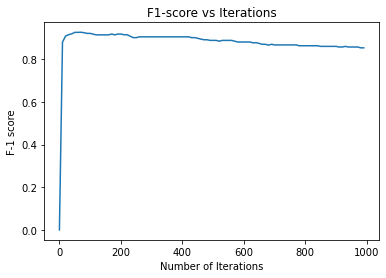

In [17]:
# get the indicies with categorical variables
cat_indices = [i for i, col in enumerate(X) if X[col].dtypes=='category']

def get_prediction(n_estimators):
    """returns an f-1 score for a model with a given number of iterations"""
    
    # train the lgb model
    lgbm = lgb.LGBMClassifier(random_state=42, n_estimators=n_estimators)
    lgbm.fit(X_train, y_train, eval_set=(X_valid, y_valid), feature_name='auto', categorical_feature = cat_indices)

    # generate predictions
    y_pred = lgbm.predict(X_test)
    
    # return the f-1 score
    f1 = f1_score(y_test, y_pred, average='binary')
    return f1

# plot the f-1 scores against the number of iterations
f1_scores = []
for i in range(1,1000, 10):
    f1_scores.append(get_prediction(n_estimators=i)) 
plt.plot(range(1,1000, 10), f1_scores)
plt.title('F1-score vs Iterations')
plt.xlabel('Number of Iterations')
plt.ylabel('F-1 score')
plt.show()

In [15]:
# train the lgb model
lgbm = lgb.LGBMClassifier(random_state=42, n_estimators=1000)
lgbm.fit(X_train, 
         y_train, 
         categorical_feature = cat_indices,
         eval_metric='binary_logloss', 
         verbose=False, 
         eval_set=[(X_valid, y_valid)],
         early_stopping_rounds=20)

# generate predictions
y_pred = lgbm.predict(X_test)

# get the f-1 score
f1 = f1_score(y_test, y_pred, average='binary')
print(f'F1-score: {f1}')

F1-score: 0.9230769230769231


In [16]:
%%timeit
# train the lgb model
lgbm = lgb.LGBMClassifier(random_state=42, n_estimators=1000)
lgbm.fit(X_train, 
         y_train, 
         categorical_feature = cat_indices,
         eval_metric='binary_logloss', 
         verbose=False, 
         eval_set=[(X_valid, y_valid)],
         early_stopping_rounds=20)

# generate predictions
y_pred = lgbm.predict(X_test)

# get the f-1 score
f1 = f1_score(y_test, y_pred, average='binary')
print(f'F1-score: {f1}')

F1-score: 0.9230769230769231
F1-score: 0.9230769230769231
F1-score: 0.9230769230769231
F1-score: 0.9230769230769231
F1-score: 0.9230769230769231
F1-score: 0.9230769230769231
F1-score: 0.9230769230769231
F1-score: 0.9230769230769231
F1-score: 0.9230769230769231
F1-score: 0.9230769230769231
F1-score: 0.9230769230769231
F1-score: 0.9230769230769231
F1-score: 0.9230769230769231
F1-score: 0.9230769230769231
F1-score: 0.9230769230769231
F1-score: 0.9230769230769231
F1-score: 0.9230769230769231
F1-score: 0.9230769230769231
F1-score: 0.9230769230769231
F1-score: 0.9230769230769231
F1-score: 0.9230769230769231
F1-score: 0.9230769230769231
F1-score: 0.9230769230769231
F1-score: 0.9230769230769231
F1-score: 0.9230769230769231
F1-score: 0.9230769230769231
F1-score: 0.9230769230769231
F1-score: 0.9230769230769231
F1-score: 0.9230769230769231
F1-score: 0.9230769230769231
F1-score: 0.9230769230769231
F1-score: 0.9230769230769231
F1-score: 0.9230769230769231
F1-score: 0.9230769230769231
F1-score: 0.92